<a href="https://colab.research.google.com/github/denizyennerr/Beijing-PM2.5-Air-Quality-Prediction/blob/main/ML_project_China_Air_Pollution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **BEIJING AIR QUALITY ANALYSIS – A MACHINE LEARNING PROJECT**
---
This project is developed as part of the *Topics on Machine Learning and its Applications* course in the **Artificial Intelligence for Sustainable Societies (AISS) Masters' program.**

> **Contributors**: Deniz Yener & Mohsen Hassan Nejad

> [DATASET](https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data)

---

## Problem Definition and Motivation

Coming from highly polluted cities like Tehran and Izmir, we’ve seen firsthand how hard it can be for people, especially families with children, the elderly, and those with health conditions, to know whether it’s safe to go about their lives. In winter particularly, this uncertainty can have serious health consequences.

Our project is driven by the idea of making pollution information more accessible and visual. The aim is simple: **to let users check upcoming air quality in their city through a vatagorized graph that shows whether it's safe or not to be outside**. Behind that simple interface, we use machine learning to predict PM2.5 levels based on historical weather and pollution data, as well as featured engineered variables.


## Dataset Selection and Justification

We chose the UCI Beijing PM2.5 dataset, which includes **hourly air quality and weather data from Beijing (2010–2014)**. It’s a strong fit for our goals because:

- It gives us several years of continuous, hourly data—ideal for training and testing time-based models.
- It combines both pollution and meteorological features, which are essential for predicting PM2.5.


## Our main objectives are to:

- **Forcasting:** Building and evaluating multiple ML models to predict hourly PM2.5 levels in search of a top performing model.
- **Feature Importance:** Identify key features affecting pollution (wind direction, temperature, time of day).
- **Web-App:** Employ our top model to provide real users with air quality forecasts, classified as Good, Moderate, or Unhealthy, using the Air Quality Index. [GitHub Repository](https://github.com/TechNejad/ml-project_beijing-air-quality/blob/main/THE_REAL_ML_project_China_Air_Pollution_.ipynb)

## This Notebook includes the following sections:

1. Exploratory Data Analysis (EDA)
2. Feature Engineering
3. Modeling Experiments
4. Weather & Time Modeling
5. Conclusion & Future Work

---


---

# **1. EPLORATORY DATA ANALYSIS**   ⚙
---
This section contains:
- 1.1 Initial Setup and  Exploration
- 1.2 Target Variable [PM2.5] Characteristics
- 1.3 Air Quality Index (AQI) Comparison
- 1.4 Seasonalities In The Data
- 1.5 Handling Missing Values in PM2.5
- 1.6 Relationship Between Numerical Features


##Data Dictionary


| Variable | Type              | Domain                                  |
|----------|-------------------|-----------------------------------------|
| No       | Discrete Numerical| 1 to 43,824 (Index of the data points)  |
| year     | Discrete Numerical| 2010 to 2014                            |
| month    | Discrete Numerical| 1 to 12                                 |
| day      | Discrete Numerical| 1 to 31                                 |
| hour     | Discrete Numerical| 0 to 23                                 |
| pm2.5    | Continuous Numerical | 0 to 1000+ (PM2.5 concentration in the air) |
| DEWP     | Continuous Numerical| Temperature scale (varied, Dew point temperature) |
| TEMP     | Continuous Numerical| Temperature in Celsius                 |
| PRES     | Continuous Numerical| Atmospheric pressure                    |
| cbwd     | Categorical       | Wind directions (e.g., NW, NE)         |
| Iws      | Continuous Numerical| Wind speed                              |
| Is       | Binary (Categorical)| 0 (No Snow) / 1 (Snow)                  |
| Ir       | Binary (Categorical)| 0 (No Rain) / 1 (Rain)                 |

---

##Loading the Dataset

We use the `ucimlrepo` library to fetch the Beijing PM2.5 dataset directly from the **UCI Machine Learning Repository**.

We separate the **features (`X`)**—such as temperature, wind speed, and pressure—from the **target variable (`y`)**, which is the PM2.5 concentration. This prepares the data for future modeling steps.

We display metadata and variable descriptions to review the structure and content of the dataset.



In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

beijing_pm2_5 = fetch_ucirepo(id=381)

X = beijing_pm2_5.data.features
y = beijing_pm2_5.data.targets

beijing_pm2_5.metadata
beijing_pm2_5.variables

name     role         type demographic description units missing_values
0      No       ID      Integer        None        None  None             no
1    year  Feature      Integer        None        None  None             no
2   month  Feature      Integer        None        None  None             no
3     day  Feature      Integer        None        None  None             no
4    hour  Feature      Integer        None        None  None             no
5   pm2.5   Target      Integer        None        None  None            yes
6    DEWP  Feature      Integer        None        None  None             no
7    TEMP  Feature      Integer        None        None  None             no
8    PRES  Feature      Integer        None        None  None             no
9    cbwd  Feature  Categorical        None        None  None             no
10    Iws  Feature   Continuous        None        None  None             no
11     Is  Feature      Integer        None        None  None             no
12     Ir  Feature      Integer        None        None  None             no

##**1.1 Initial Setup and  Exploration**

> We begin by importing the libraries needed for numerical operations, data manipulation, visualization, and basic machine learning used as EDA.











In [ ]:
# Core numerical computing and data structures
import numpy as np
import pandas as pd

# Visualization libraries for creating plots and charts
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec

# Tools for counting and basic statistical operations
from collections import Counter
import statistics
from scipy.stats.mstats import winsorize
from scipy.stats import median_abs_deviation

# Diagnostic modeling tools for exploratory analysis (preliminary evaluation)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Jupyter notebook-specific functionality
from IPython import get_ipython
from IPython.display import display
import glob

# System configuration and warning suppression
import warnings
warnings.filterwarnings("ignore")

> After loading the dataset, we combine the features (`X`) and the target variable (`y`, representing PM2.5 concentration) into a single DataFrame for easier inspection and manipulation in the next steps.


In [ ]:
data = pd.concat([X, y], axis=1)
data.head()

year  month  day  hour  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  pm2.5
0  2010      1    1     0   -21 -11.0  1021.0   NW   1.79   0   0    NaN
1  2010      1    1     1   -21 -12.0  1020.0   NW   4.92   0   0    NaN
2  2010      1    1     2   -21 -11.0  1019.0   NW   6.71   0   0    NaN
3  2010      1    1     3   -21 -14.0  1019.0   NW   9.84   0   0    NaN
4  2010      1    1     4   -20 -12.0  1018.0   NW  12.97   0   0    NaN

In [ ]:
data.tail()

year  month  day  hour  DEWP  TEMP    PRES cbwd     Iws  Is  Ir  pm2.5
43819  2014     12   31    19   -23  -2.0  1034.0   NW  231.97   0   0    8.0
43820  2014     12   31    20   -22  -3.0  1034.0   NW  237.78   0   0   10.0
43821  2014     12   31    21   -22  -3.0  1034.0   NW  242.70   0   0   10.0
43822  2014     12   31    22   -22  -4.0  1034.0   NW  246.72   0   0    8.0
43823  2014     12   31    23   -21  -3.0  1034.0   NW  249.85   0   0   12.0

---
###**Column Renaming**

> We rename the columns to more descriptive and readable labels. This step improves clarity and consistency for analysis and visualization.


In [ ]:
# Rename columns for better readability
data.rename(columns = {
    'year': 'Year',
    'month': 'Month',
    'day': "Day",
    'hour': 'Hour',
    'pm2.5': 'PM2.5',
    'DEWP': 'DewP',
    'TEMP': 'Temp',
    'PRES': 'Press',
    'cbwd': 'WinDir',
    'Iws': 'WindSpeed',
    'Is': 'HoursOfSnow',
    'Ir': 'HoursOfRain'
}, inplace=True)

# Display the first 5 rows of the DataFrame with the new column names
data.head()

Year  Month  Day  Hour  DewP  Temp   Press WinDir  WindSpeed  HoursOfSnow  \
0  2010      1    1     0   -21 -11.0  1021.0     NW       1.79            0   
1  2010      1    1     1   -21 -12.0  1020.0     NW       4.92            0   
2  2010      1    1     2   -21 -11.0  1019.0     NW       6.71            0   
3  2010      1    1     3   -21 -14.0  1019.0     NW       9.84            0   
4  2010      1    1     4   -20 -12.0  1018.0     NW      12.97            0   

   HoursOfRain  PM2.5  
0            0    NaN  
1            0    NaN  
2            0    NaN  
3            0    NaN  
4            0    NaN

 We also check for any duplicate datetime columns and remove them if needed.

In [ ]:
# Check if 'datetime' column already exists and drop it
if 'datetime' in data.columns:
    data.drop(columns=['datetime'], inplace=True)

---
###**Creating a Time Index**
> To prepare the dataset for time-series analysis, we create a new `datetime` column by combining the year, month, day, and hour values. We then set this column as the DataFrame index. This allows us to resample, filter, and analyze the data in a time-aware way going forward.*


In [ ]:
data['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])
data.reset_index(drop=True, inplace=True)
data.set_index('datetime', inplace=True)

data.head()

Year  Month  Day  Hour  DewP  Temp   Press WinDir  \
datetime                                                                 
2010-01-01 00:00:00  2010      1    1     0   -21 -11.0  1021.0     NW   
2010-01-01 01:00:00  2010      1    1     1   -21 -12.0  1020.0     NW   
2010-01-01 02:00:00  2010      1    1     2   -21 -11.0  1019.0     NW   
2010-01-01 03:00:00  2010      1    1     3   -21 -14.0  1019.0     NW   
2010-01-01 04:00:00  2010      1    1     4   -20 -12.0  1018.0     NW   

                     WindSpeed  HoursOfSnow  HoursOfRain  PM2.5  
datetime                                                         
2010-01-01 00:00:00       1.79            0            0    NaN  
2010-01-01 01:00:00       4.92            0            0    NaN  
2010-01-01 02:00:00       6.71            0            0    NaN  
2010-01-01 03:00:00       9.84            0            0    NaN  
2010-01-01 04:00:00      12.97            0            0    NaN

---
###**Missing Data Count**
> *We begin our exploratory data analysis by checking for missing values in the dataset.*


In [ ]:
data.isnull().sum()

Year              0
Month             0
Day               0
Hour              0
DewP              0
Temp              0
Press             0
WinDir            0
WindSpeed         0
HoursOfSnow       0
HoursOfRain       0
PM2.5          2067
dtype: int64

---
###**Descriptive Statistics**
> We investigate the summary statistics for all numerical variables. This gives us a sense of the distributions, central tendencies, and potential outliers—particularly for PM2.5, which shows high variability and some extreme values.


In [ ]:
data.describe()

Year         Month           Day          Hour          DewP  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean    2012.000000      6.523549     15.727820     11.500000      1.817246   
std        1.413842      3.448572      8.799425      6.922266     14.433440   
min     2010.000000      1.000000      1.000000      0.000000    -40.000000   
25%     2011.000000      4.000000      8.000000      5.750000    -10.000000   
50%     2012.000000      7.000000     16.000000     11.500000      2.000000   
75%     2013.000000     10.000000     23.000000     17.250000     15.000000   
max     2014.000000     12.000000     31.000000     23.000000     28.000000   

               Temp         Press     WindSpeed   HoursOfSnow   HoursOfRain  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      12.448521   1016.447654     23.889140      0.052734      0.194916   
std       12.198613     10.268698     50.010635      0.760375      1.415867   
min      -19.000000    991.000000      0.450000      0.000000      0.000000   
25%        2.000000   1008.000000      1.790000      0.000000      0.000000   
50%       14.000000   1016.000000      5.370000      0.000000      0.000000   
75%       23.000000   1025.000000     21.910000      0.000000      0.000000   
max       42.000000   1046.000000    585.600000     27.000000     36.000000   

              PM2.5  
count  41757.000000  
mean      98.613215  
std       92.050387  
min        0.000000  
25%       29.000000  
50%       72.000000  
75%      137.000000  
max      994.000000

---
#####🔑 **Key Insights:**

**Air Quality Variable (PM2.5):**
- **Mean:** 98.61, **Std:** 92.05 → indicates high variability.
- **Min:** 0.0, **Max:** 994.0 → presence of extreme values likely representing extraordinary pollution episodes or outliers.
- **Missing Values:** 2,067 (~4.72%) → will need imputation or handling before modeling.

**Meteorological Variables:**
- **Temperature (Temp):** Ranges from -19°C to 42°C → likely strong seasonal patterns.
- **Dew Point (DewP):** Broad range from -19 to 42°C, generally tracks with Temp.
- **WindSpeed:** Ranges from 0.45 to 585.6 m/s → extremely high values suggesting **the need for outlier inspection or removal.**
- **Pressure (Press):** Relatively stable around 1016 hPa, less likely to vary meaningfully.


---

##**1.2   Target Variable [PM2.5] Characteristics**

---

### **PM2.5 Distribution Overview – Histogram with KDE & Boxen Plot**

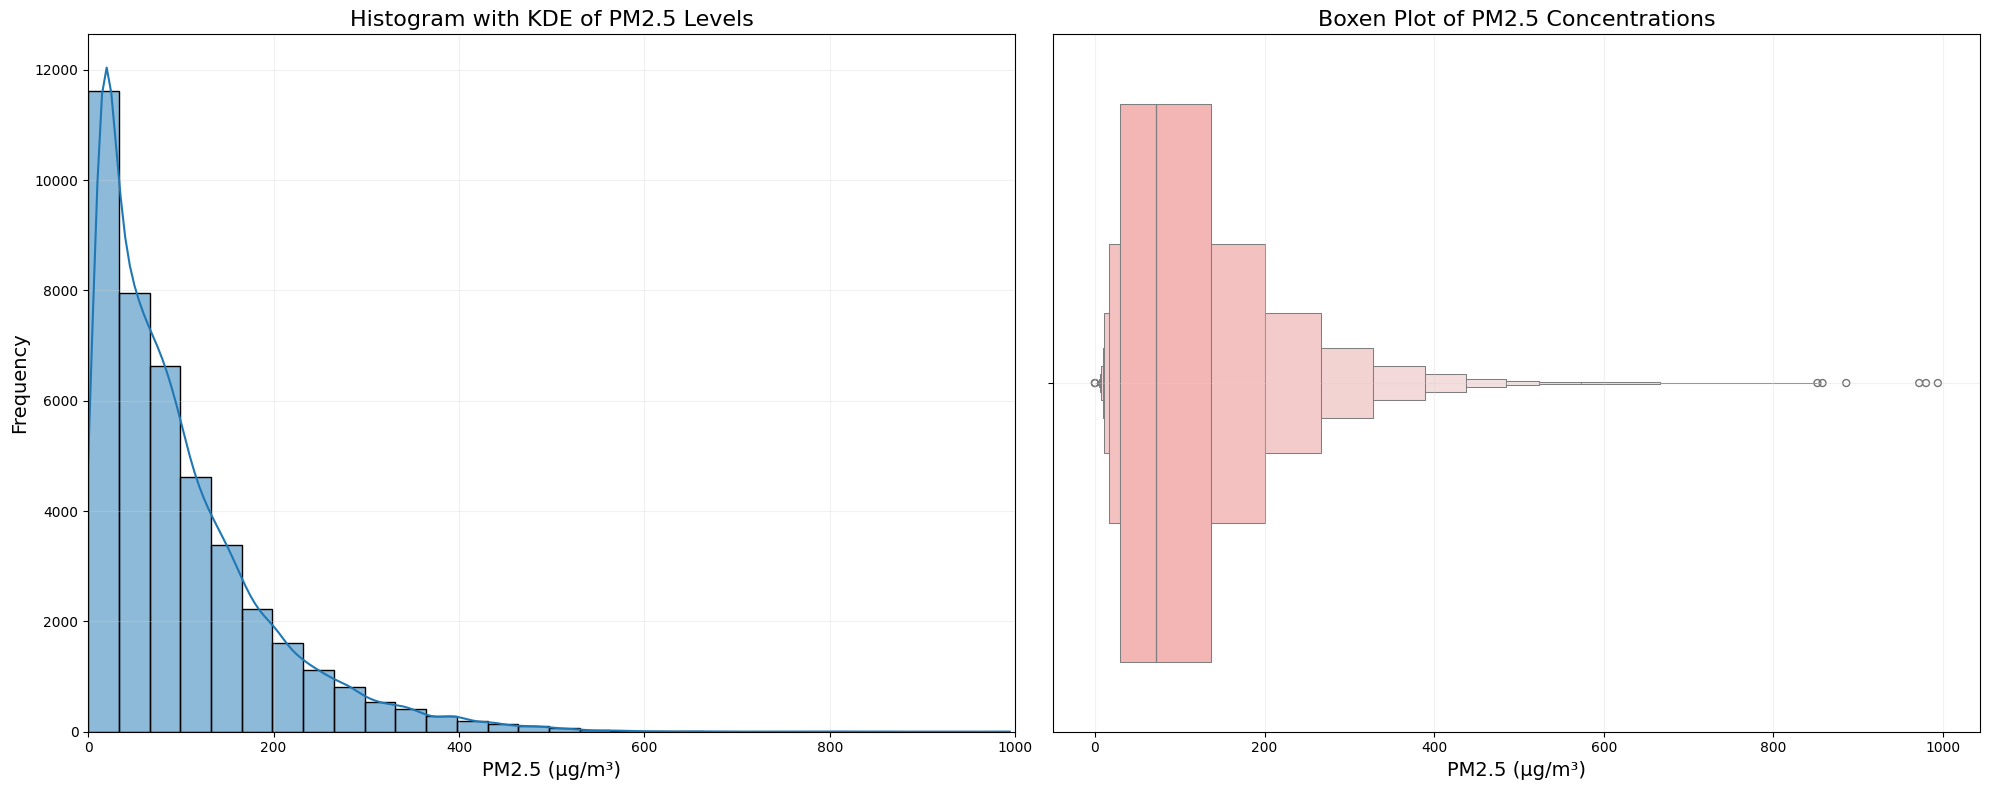

PM2.5 Range Percentage
0       0-200    83.224%
1     200-400    10.798%
2     400-600     1.189%
3     600-800     0.048%
4    800-1000     0.025%

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # Create figure and subplots for visualization

# Plot histogram with KDE for PM2.5 distribution
sns.histplot(data['PM2.5'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram with KDE of PM2.5 Levels", fontsize=16)
axes[0].set_xlabel("PM2.5 (µg/m³)", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].set_xlim(0, 1000)
axes[0].grid(True, color='lightgrey', alpha=0.3)


# Plot boxen plot for PM2.5 distribution
sns.boxenplot(x=data['PM2.5'], ax=axes[1], color='#FFAAAA')
axes[1].set_title("Boxen Plot of PM2.5 Concentrations", fontsize=16)
axes[1].set_xlabel("PM2.5 (µg/m³)", fontsize=14)
axes[1].grid(True, color='lightgrey', alpha=0.3)

# Define ranges and labels for PM2.5 concentration levels
ranges = [(0, 200), (200, 400), (400, 600), (600, 800), (800, 1000)]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000']
percentage_data = []
total_data = len(data['PM2.5']) # Get total number of data points

# Calculate percentage of data within each defined range
for i, (lower, upper) in enumerate(ranges):
    count = len(data[(data['PM2.5'] >= lower) & (data['PM2.5'] < upper)])
    percentage = (count / total_data) * 100
    percentage_data.append([labels[i], f'{percentage:.3f}%'])

# Create and display a table with the percentage breakdown
percentage_table = pd.DataFrame(percentage_data, columns=['PM2.5 Range', 'Percentage'])

plt.tight_layout()
plt.show()
display(percentage_table)

---
##### 🔑 **Key Insights:**
- PM2.5 values are **highly right-skewed**, with 83.2% below 200 µg/m³.
- Extreme values above 600 µg/m³ are **very rare** (~0.05%) but impactful.
- The **boxen plot** reveals multiple layers of severity in high pollution levels — not just rare spikes, but **structured extremes**.
- This complexity suggests the need for **special treatment** of outliers and possibly **log transformation** for modeling.




---
##**1.3 Air Quality Index (AQI) and Pollution Patterns**
---

**The AQI comparisons below follow official air quality standards from:**
 - **US EPA** (Environmental Protection Agency), which defines PM2.5 thresholds for AQI categories based on health impacts [EPA AQI Factsheet, 2012].
- **Chinese HJ 633-2012**, issued by China's Ministry of Ecology and Environment, outlining PM2.5 breakpoints and pollution severity categories [HJ 633-2012 official regulation].
- **World Health Organization (WHO)** guidelines, revised in 2021, which recommend a daily average PM2.5 limit of 15 µg/m³ and an annual average of 5 µg/m³, based solely on health risk evidence.

**Refrences:**
- A comparison of worldwide Air-Quality Scales (aqicn.org)
- Chinese standard HJ 633-2012 (mee.gov.cn)
- U.S. EPA AQI break-points (aqs.epa.gov)
- PurpleAir forum threads on calculating the EPA PM2.5 AQI (community.purpleair.com, id 87 & 877)



###**I. Annual PM2.5 Levels Framed In AQI Standards (2011–2015)**

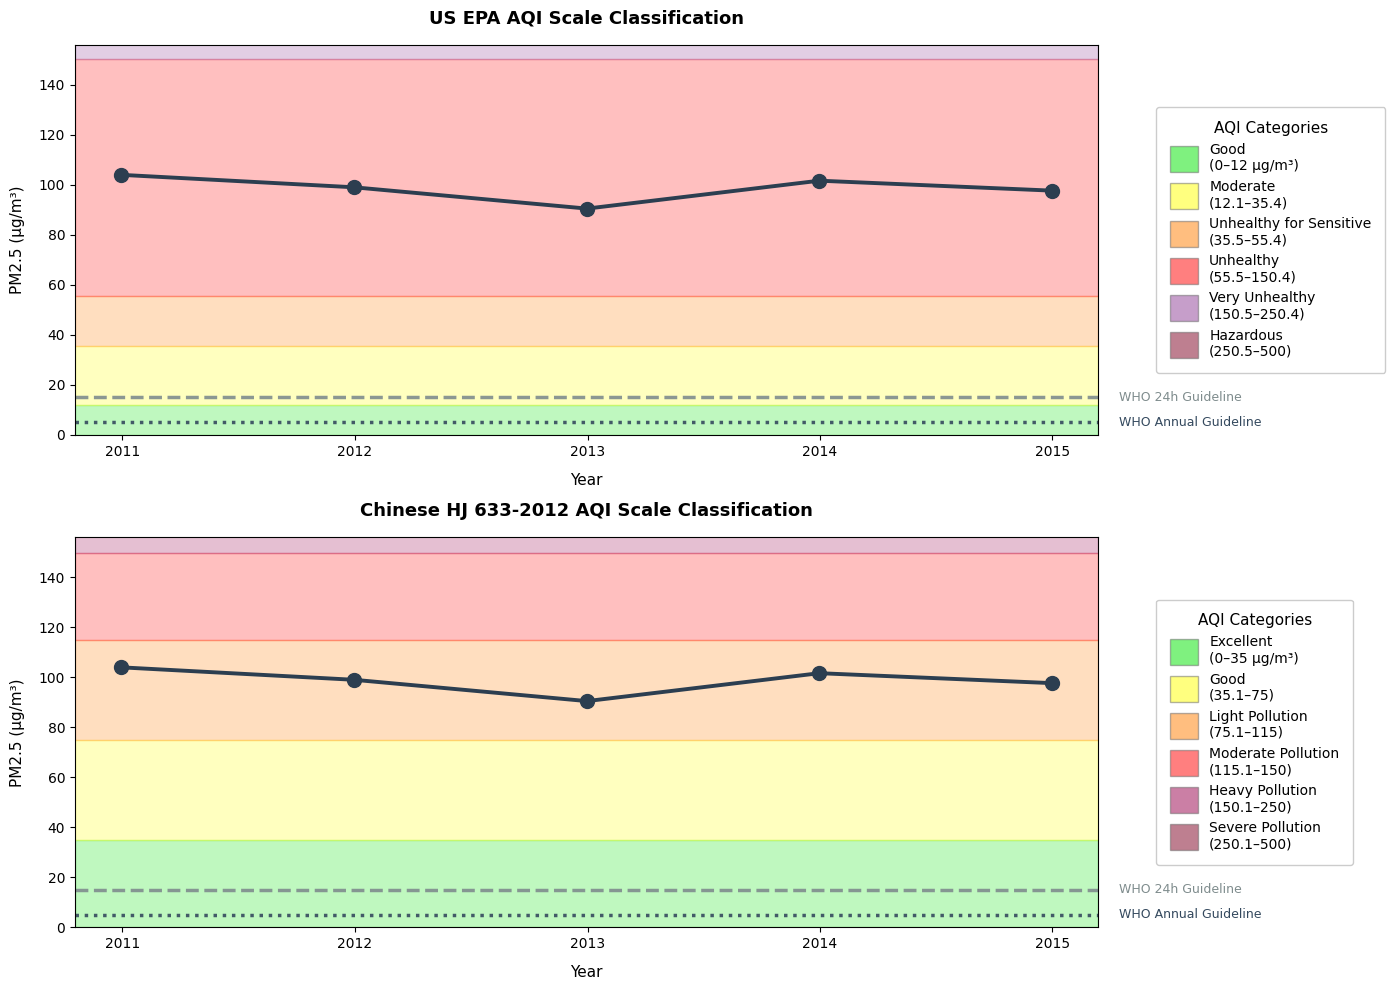

In [ ]:
# Calculate annual average PM2.5 levels
annual_avg = data['PM2.5'].resample('Y').mean()

# WHO air quality guidelines (µg/m³)
who_annual = 5
who_daily = 15

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.6, right=0.78)

# Set y-axis maximum (with upper limit of 500)
y_max = min(annual_avg.max() * 1.5, 500)

# Common line style for PM2.5 trend line
line_args = {'marker':'o', 'linestyle':'-', 'color':'#2c3e50',
             'linewidth':2.8, 'markersize':10, 'zorder':5}

# US EPA AQI breakpoints and categories
epa_breaks = [0, 12, 35.4, 55.4, 150.4, 250.4, 500]
epa_categories = ['Good\n(0–12 µg/m³)', 'Moderate\n(12.1–35.4)',
                 'Unhealthy for Sensitive\n(35.5–55.4)', 'Unhealthy\n(55.5–150.4)',
                 'Very Unhealthy\n(150.5–250.4)', 'Hazardous\n(250.5–500)']
epa_colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']

# Chinese AQI breakpoints and categories
chn_breaks = [0, 35, 75, 115, 150, 250, 500]
chn_categories = ['Excellent\n(0–35 µg/m³)', 'Good\n(35.1–75)',
                 'Light Pollution\n(75.1–115)', 'Moderate Pollution\n(115.1–150)',
                 'Heavy Pollution\n(150.1–250)', 'Severe Pollution\n(250.1–500)']
chn_colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#99004c', '#7e0023']

def create_aqi_plot(ax, breaks, colors, categories, title):
    """Create AQI plot with colored bands, guidelines, and PM2.5 trend line"""
    # Create colored AQI bands
    for i in range(len(breaks)-1):
        ax.axhspan(breaks[i], breaks[i+1], alpha=0.25,
                  color=colors[i], zorder=0, edgecolor='#ffffff')

    # Plot PM2.5 annual average line
    ax.plot(annual_avg.index, annual_avg.values, **line_args)

    # Add WHO guideline lines and annotations
    ax.axhline(who_annual, color='#34495e', linestyle=':', linewidth=2.5, alpha=0.9)
    ax.annotate('WHO Annual Guideline',
               xy=(1.02, who_annual), xycoords=('axes fraction', 'data'),
               color='#34495e', fontsize=9, va='center')

    ax.axhline(who_daily, color='#7f8c8d', linestyle='--', linewidth=2.5, alpha=0.9)
    ax.annotate('WHO 24h Guideline',
               xy=(1.02, who_daily), xycoords=('axes fraction', 'data'),
               color='#7f8c8d', fontsize=9, va='center')

    # Configure plot appearance
    ax.set_title(title, fontsize=13, pad=15, fontweight='semibold')
    ax.set_ylim(0, y_max)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xlabel('Year', fontsize=11, labelpad=10)
    ax.set_ylabel('PM2.5 (µg/m³)', fontsize=11, labelpad=10)

# Create plots for both standards
create_aqi_plot(ax1, epa_breaks, epa_colors, epa_categories,
               'US EPA AQI Scale Classification')
create_aqi_plot(ax2, chn_breaks, chn_colors, chn_categories,
               'Chinese HJ 633-2012 AQI Scale Classification')

def create_legend(ax, colors, categories):
    """Create AQI category legend positioned to the right of the plot"""
    patches = [Patch(facecolor=c, alpha=0.5, edgecolor='#666666',
                    label=l) for c,l in zip(colors, categories)]
    legend = ax.legend(handles=patches, loc='center left',
                      bbox_to_anchor=(1.05, 0.5),
                      fontsize=10,
                      title="AQI Categories",
                      title_fontsize=11,
                      framealpha=1,
                      borderpad=1,
                      handleheight=2.5)
    return legend

# Add legends to both plots
create_legend(ax1, epa_colors, epa_categories)
create_legend(ax2, chn_colors, chn_categories)
plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**

- PM2.5 annual averages consistently exceeded 90 µg/m³, peaking above 105 µg/m³.
- According to the **US EPA AQI**, these values are categorized as **Unhealthy** (55.5–150.4 µg/m³).
- The **Chinese HJ 633-2012 AQI** scale classifies them as **Light to Moderate Pollution**, showing a more lenient categorization.
- **WHO air quality guidelines** (5 µg/m³ annual, 15 µg/m³ daily) are far exceeded, with real-world values being ~10x higher.
- A noticeable drop in PM2.5 is seen in 2013, but the trend is not consistently improving over time.
- **The comparison highlights how AQI interpretation can vary dramatically based on the adopted national standard.**


---
###**II. Monthly PM2.5 Levels Framed In AQI Scales**


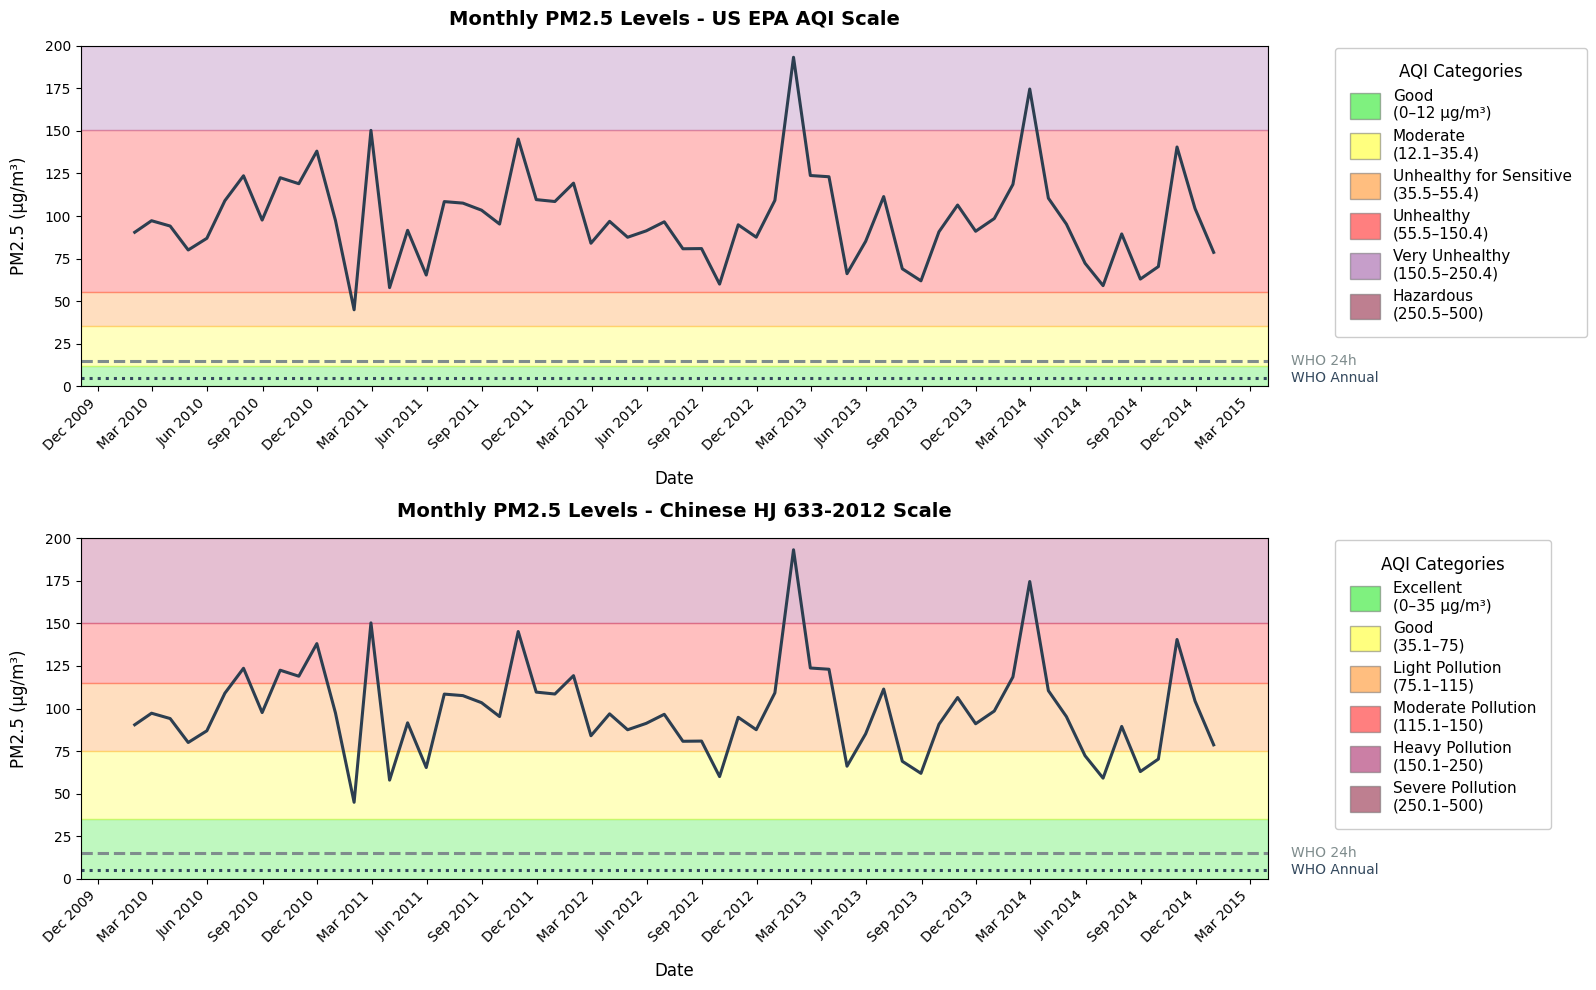

In [ ]:
# Calculate monthly average PM2.5 levels
monthly_avg = data['PM2.5'].resample('M').mean()

# WHO air quality guidelines (µg/m³)
who_annual = 5
who_daily = 15

# Create figure with two subplots for monthly visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
plt.subplots_adjust(hspace=0.6, right=0.78)  # Adjust spacing for legends

# Set fixed y-axis maximum for better comparison
y_max = 200

# Style for the PM2.5 trend line
line_args = {'linestyle':'-', 'color':'#2c3e50', 'linewidth':2.2, 'zorder':5}

def create_aqi_plot(ax, breaks, colors, categories, title):
    """Create monthly PM2.5 plot with AQI bands and guidelines"""
    # Create colored AQI bands (only up to y_max)
    for i in range(len(breaks)-1):
        lower = breaks[i]
        upper = breaks[i+1]
        if lower >= y_max:
            continue  # Skip bands above our y-axis limit
        effective_upper = min(upper, y_max)
        ax.axhspan(lower, effective_upper, alpha=0.25,
                  color=colors[i], zorder=0, edgecolor='#ffffff')

    # Plot monthly PM2.5 data
    ax.plot(monthly_avg.index, monthly_avg.values, **line_args)

    # Add WHO guideline lines and labels
    ax.axhline(who_annual, color='#34495e', linestyle=':', linewidth=2.2)
    ax.annotate('WHO Annual',
               xy=(1.02, who_annual), xycoords=('axes fraction', 'data'),
               color='#34495e', fontsize=10, va='center')

    ax.axhline(who_daily, color='#7f8c8d', linestyle='--', linewidth=2.2)
    ax.annotate('WHO 24h',
               xy=(1.02, who_daily), xycoords=('axes fraction', 'data'),
               color='#7f8c8d', fontsize=10, va='center')

    # Configure plot appearance
    ax.set_title(title, fontsize=14, pad=15, fontweight='semibold')
    ax.set_ylim(0, y_max)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Quarterly ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Month-Year format
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xlabel('Date', fontsize=12, labelpad=12)
    ax.set_ylabel('PM2.5 (µg/m³)', fontsize=12, labelpad=12)

# Generate plots for both standards
create_aqi_plot(ax1, epa_breaks, epa_colors, epa_categories,
               'Monthly PM2.5 Levels - US EPA AQI Scale')
create_aqi_plot(ax2, chn_breaks, chn_colors, chn_categories,
               'Monthly PM2.5 Levels - Chinese HJ 633-2012 Scale')

def create_legend(ax, colors, categories):
    """Create AQI category legend positioned to the right"""
    patches = [Patch(facecolor=c, alpha=0.5, edgecolor='#666666',
                    label=l) for c, l in zip(colors, categories)]
    legend = ax.legend(handles=patches, loc='center left',
                      bbox_to_anchor=(1.05, 0.57),
                      fontsize=11,
                      title="AQI Categories",
                      title_fontsize=12,
                      framealpha=1,
                      borderpad=1,
                      handleheight=2.2)
    return legend

# Add legends to both plots
create_legend(ax1, epa_colors, epa_categories)
create_legend(ax2, chn_colors, chn_categories)
plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights**

- PM2.5 shows clear **seasonal peaks**, especially during winter months (e.g., early 2013, early 2014), likely due to heating-related emissions and atmospheric stagnation.
- Even in the cleanest months, levels consistently **exceed WHO limits** for both daily (15 µg/m³) and annual exposure (5 µg/m³).
- These plots emphasize both the **severity and persistence of PM2.5 pollution**, and how **standards shape interpretation** of air quality data.


---

##**1.4 Temporal And Seasonal Patterns**
---

*To explore how pollution and meteorological variables behave over time, we analyze **hourly and monthly** patterns. This helps us identify cyclical behaviors, which can guide feature engineering for better model performance.*

---


### **I. Hourly Average PM2.5 and Weather Variables**

> We compute the average **hourly trends** for the following variables, including confidence intervals:

> We selected the following **four variables; PM2.5 concentration, temperature, dew point, and wind speed** because they significantly influence air quality and pollution dynamics, capturing key meteorological interactions that drive hourly fluctuations in pollutant dispersion and concentration.


- **PM2.5 Concentration**
- **Temperature (°C)**
- **Dew Point (°C)**
- **Wind Speed (m/s)**

This helps reveal short-term cyclical patterns over a typical day.


In [ ]:
def seasonal_mean(data, season_var, con_var):
    """
    Calculates seasonal statistics with confidence intervals.

    Args:
        data: DataFrame containing the data
        season_var: Seasonal grouping variable (e.g., hour, month)
        con_var: Continuous variable to analyze (e.g., PM2.5 concentration)

    Returns:
        DataFrame with seasonal means and 95% confidence intervals
    """
    # Calculate mean for each seasonal period
    mean_dict = dict(data.groupby(season_var)[con_var].mean())

    # Get average count per group (assumes balanced groups)
    n = data.groupby(season_var)[con_var].count().mean()

    # Calculate 95% CI upper bound (mean + 1.96*SE)
    upper_dict = dict(data.groupby(season_var)[con_var].mean() +
                    1.96 * (data.groupby(season_var)[con_var].std() / ((n - 1) ** 0.5)))

    # Calculate 95% CI lower bound (mean - 1.96*SE)
    lower_dict = dict(data.groupby(season_var)[con_var].mean() -
                    1.96 * (data.groupby(season_var)[con_var].std() / ((n - 1) ** 0.5)))

    # Combine results into DataFrame
    mean_data = pd.DataFrame([mean_dict, upper_dict, lower_dict]).transpose()
    mean_data.columns = ['mean', 'upper_CI', 'lower_CI']

    return mean_data

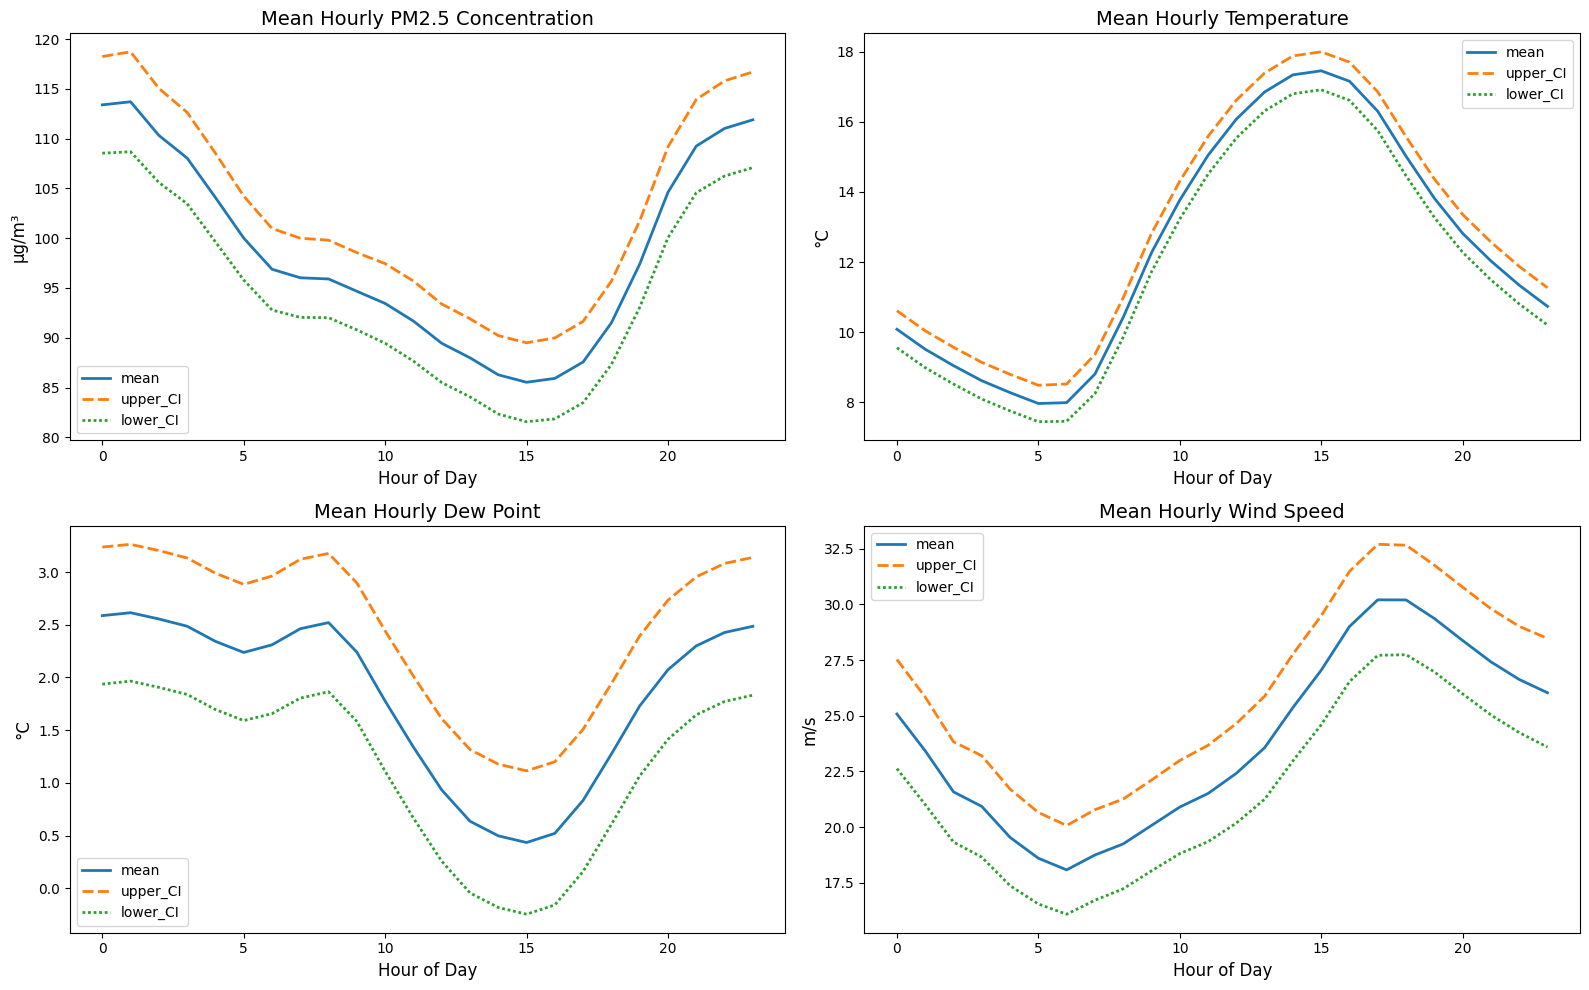

In [ ]:
def plot_hourly_avg(data, variable, title, ylabel, ax):
    """Plots hourly averages with confidence intervals for a given variable.

    Args:
        data: DataFrame containing time series data
        variable: Column name to analyze (e.g., 'PM2.5')
        title: Plot title
        ylabel: Y-axis label with units
        ax: Matplotlib axis object to plot on
    """
    # Calculate hourly statistics using seasonal_mean function
    hourly_avg = seasonal_mean(data, 'Hour', variable)

    # Create line plot with confidence intervals (automatically uses 'mean', 'upper_CI', 'lower_CI' from the previous block)
    sns.lineplot(data=hourly_avg, linewidth=2, ax=ax)

    # Configure plot appearance
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Hour of Day', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

# Create 2x2 grid of subplots for different atmospheric variables
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot four key air quality metrics
plot_hourly_avg(data, 'PM2.5', 'Mean Hourly PM2.5 Concentration', 'µg/m³', axes[0, 0])
plot_hourly_avg(data, 'Temp', 'Mean Hourly Temperature', '°C', axes[0, 1])
plot_hourly_avg(data, 'DewP', 'Mean Hourly Dew Point', '°C', axes[1, 0])
plot_hourly_avg(data, 'WindSpeed', 'Mean Hourly Wind Speed', 'm/s', axes[1, 1])

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights**
- **PM2.5:** Highest late at night and again after 6 pm; lowest around noon.  
  *Why?* At mid-day, sunlight warms the surface, and light winds stir the air, helping spread pollution upward. After sunset, the air calms, and evening traffic + cooking add fresh emissions.

- **Temperature:** Classic daily swing — coldest just before sunrise, warmest mid-afternoon.  
  Warmer air enhances vertical air mixing, which "dilutes" PM2.5 near the ground.

- **Dew Point:** Lowest around noon, highest overnight.  
  Dry daytime air slows the growth of new particles; humid night air allows fine particles to grow.

- **Wind Speed:** Lowest at night, highest in the afternoon — nearly the mirror image of PM2.5.  
  Stronger daytime winds help carry pollution away from ground level.

- **Overall Insight:** Mid-day creates a short “clean-up window,” where warmth and wind work together to reduce pollution. But without action, PM2.5 builds up again by nightfall. We use these daily insights later when handling missing data.


**Sources**

1. Zhao X.J. et al. *Seasonal and diurnal variations of ambient PM₂.₅ concentration in urban and rural environments in Beijing.* **Atmos. Environ.** 43, 2893–2900 (2009).  
2. Wang L. et al. *Vertical observations of the atmospheric boundary layer structure over Beijing during air-pollution episodes.* **Atmos. Chem. Phys.** 19, 6949–6967 (2019).  
3. Miao Y. et al. *Impacts of the atmospheric boundary layer on regional haze in the North China Plain.* **NPJ Clim. Atmos. Sci.** 4, 3 (2021).

---
### **II. Monthly Average PM2.5 and Weather Variables**

Similar anaylsis as the previous section but now for **monthly averages**.



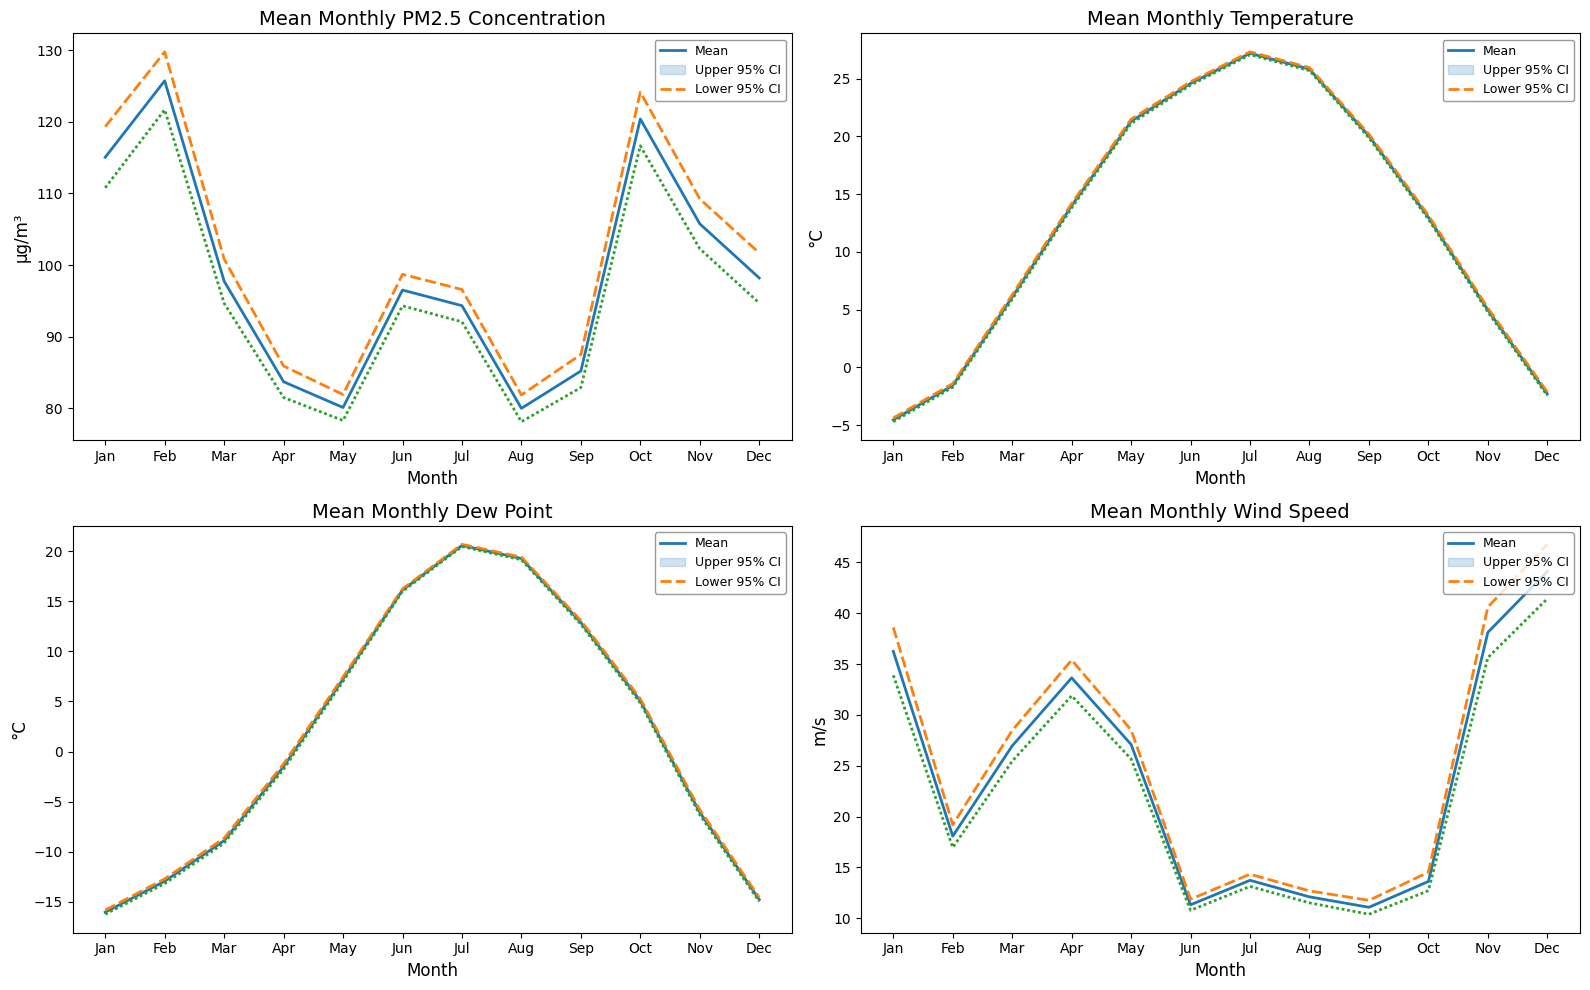

In [ ]:
# Calculate monthly averages with confidence intervals
Month_avg_PM25 = seasonal_mean(data, 'Month', 'PM2.5')
Month_avg_temp = seasonal_mean(data, 'Month', 'Temp')
Month_avg_dewp = seasonal_mean(data, 'Month', 'DewP')
Month_avg_iws = seasonal_mean(data, 'Month', 'WindSpeed')

# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

def plot_monthly_avg(data, variable, title, ylabel, ax):
    """Plot monthly averages with confidence intervals"""
    # Plot the data with Seaborn (automatically uses mean/upper_CI/lower_CI columns)
    sns.lineplot(data=data, linewidth=2, ax=ax)

    # Configure legend in upper right corner with improved styling
    ax.legend(loc='upper right', fontsize=9,
             labels=['Mean', 'Upper 95% CI', 'Lower 95% CI'],
             frameon=True, framealpha=0.8, edgecolor='gray')

    # Set plot titles and labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    # Configure x-axis with month abbreviations
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot all four variables
plot_monthly_avg(Month_avg_PM25, 'PM2.5',
                'Mean Monthly PM2.5 Concentration', 'µg/m³', axes[0, 0])
plot_monthly_avg(Month_avg_temp, 'Temp',
                'Mean Monthly Temperature', '°C', axes[0, 1])
plot_monthly_avg(Month_avg_dewp, 'DewP',
                'Mean Monthly Dew Point', '°C', axes[1, 0])
plot_monthly_avg(Month_avg_iws, 'WindSpeed',
                'Mean Monthly Wind Speed', 'm/s', axes[1, 1])

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**

- **PM2.5:** Peaks in **Jan–Feb** (winter heating + stagnant air) and again in **Oct–Nov** (heating start-up, dust storms).  
  Lowest in **Jun–Aug**, when rain and vertical mixing help disperse pollution.

- **Temperature & Dew Point:** Rise together toward **July**, then fall — following a clear seasonal rhythm.  
  Warm, humid summer air supports particle formation but also improves mixing and rainfall, which reduces pollution. Cold, dry winter air traps pollution near the surface.

- **Wind Speed:** Strongest in **late winter and spring**, weakest in **mid-summer**.  

- **Modeling Tip:** We later use these insights to create features that help the model capture these seasonal cycles.



---
##**1.5 Handling Missing Values in PM2.5**
---


Accurate imputation of missing data is critical for producing reliable models. In this section:

- **I. Identification:** Spotting missing data patterns, especially before 2012.
- **II. Processing:** Our multi-staged strategy for processing the missing data.
- **III. Validation:** Visual and statistical comparison of original and imputed distributions.



---

### **I. Identifying Missing PM2.5 Data**

We begin by visualizing the percentage of missing PM2.5 values per month from 2010–2015. A major portion of the missing data occurs prior to 2012, as revealed in both line and bar plots.

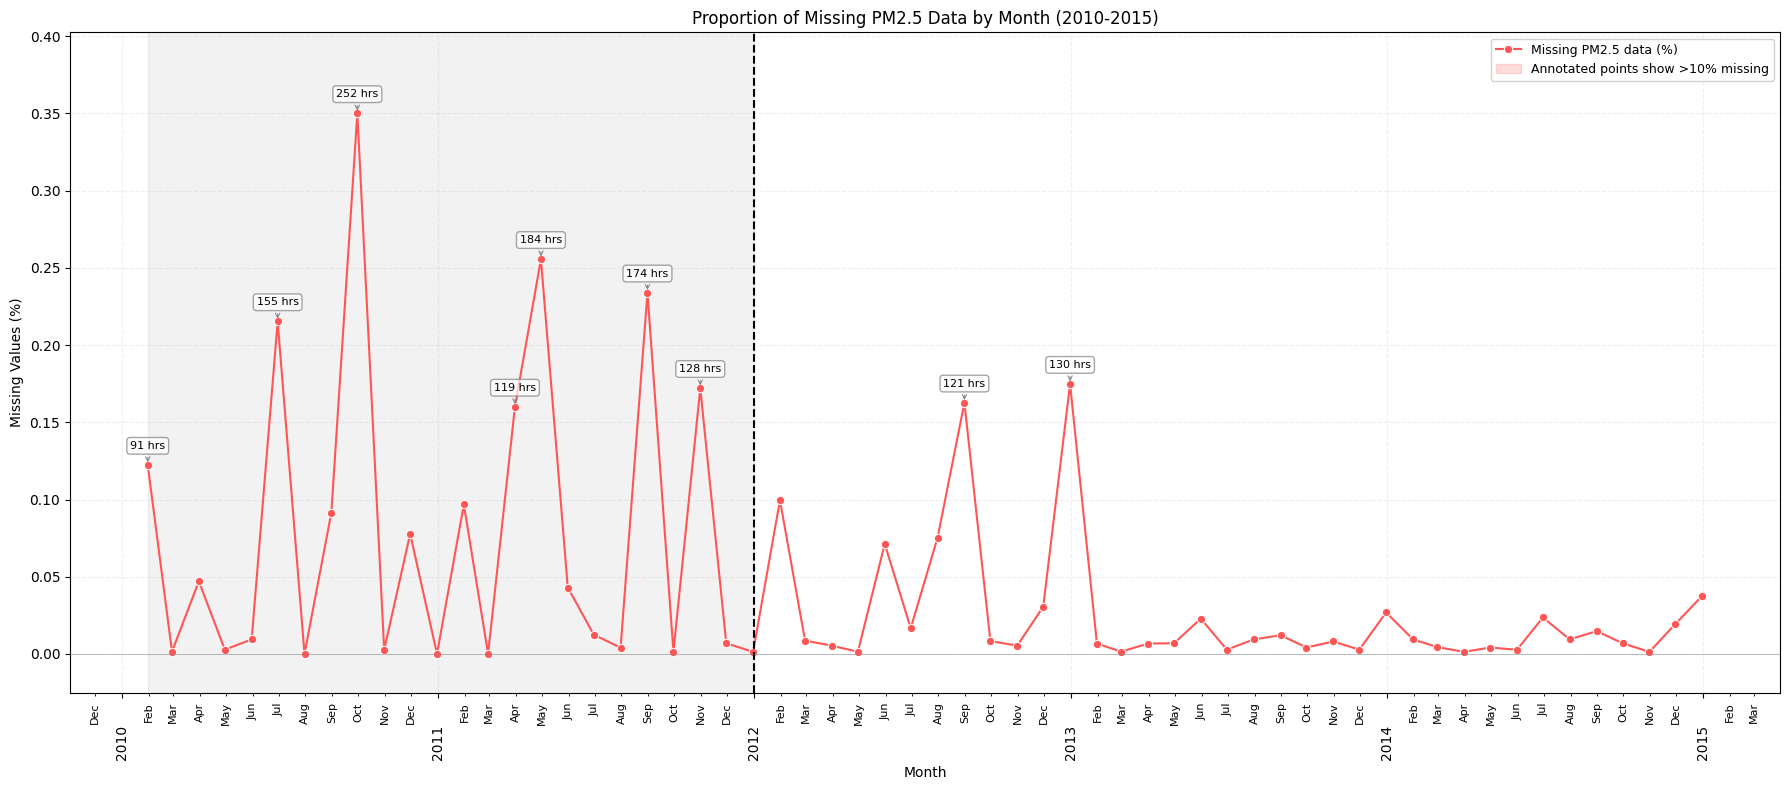

In [ ]:
# Calculate missing data stats
missing_pct = data['PM2.5'].isnull().resample('ME').mean()
missing_hrs = data['PM2.5'].isnull().resample('ME').sum()

# Create figure - Increased figsize for a larger plot
fig, ax = plt.subplots(figsize=(18, 8)) # Increased width to 18 and height to 8

# Plot the data
sns.lineplot(x=missing_pct.index, y=missing_pct, marker='o',
            markersize=6, color='#FF5555', linewidth=1.5, ax=ax)

# Format plot
ax.set(title='Proportion of Missing PM2.5 Data by Month (2010-2015)',
      xlabel='Month', ylabel='Missing Values (%)',
      ylim=(-0.025, missing_pct.max() * 1.15))

# Add reference elements
cutoff = pd.to_datetime("2012-01-01")
ax.axvline(cutoff, color='k', ls='--', lw=1.5)
ax.axvspan(missing_pct.index[0], cutoff, alpha=0.1, color='gray')
ax.axhline(0, color='gray', ls='-', alpha=0.7, lw=0.5)

# Annotations
# Recreate missing_pct and missing_hrs just in case they were modified
missing_pct_annot = data['PM2.5'].isnull().resample('ME').mean()
missing_hrs_annot = data['PM2.5'].isnull().resample('ME').sum()
for date, pct, hrs in zip(missing_pct_annot.index, missing_pct_annot, missing_hrs_annot):
    if pct > 0.1:
        ax.annotate(f"{int(hrs)} hrs", (date, pct),
                  (date, pct + missing_pct_annot.max() * 0.03),
                  ha='center', fontsize=8,
                  arrowprops=dict(arrowstyle="->", color='gray', lw=0.7),
                  bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.7))


# X-axis Formatting:
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add minor ticks for every month
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Configure the major and minor ticks and labels
# Rotate major tick labels (years)
plt.setp(ax.get_xticklabels(which='major'), rotation=90, ha='center')

ax.tick_params(axis='x', which='minor', labelsize=8, labelrotation=90, pad=5)
ax.tick_params(axis='x', which='major', pad=20)


# Update grid - maybe only major grid lines
ax.grid(True, which='major', ls='--', alpha=0.2)
ax.grid(False, which='minor')

# Update legend (basic for this example)
ax.legend(['Missing PM2.5 data (%)', 'Annotated points show >10% missing'],
          loc='upper right',
          framealpha=0.9,
          fontsize=9)

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**

- Significant data gaps exist **before 2012**, with over **1300 missing hours**.
- After 2013, missing values are rare and well-distributed.
---

### **Keep or drop the data before 2012?**

Our first reaction was to drop pre 2012 data because it contains noticeable gaps. After several discussions and audit we realised that total hours before 2012: 17520 and Missing PM2.5 hours before 2012: 1397. Percentage of missing data: 7.97%


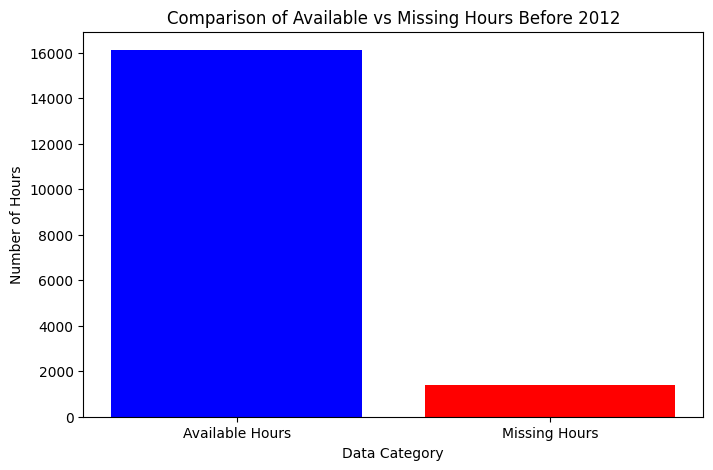

Total hours before 2012: 17520
Missing PM2.5 hours before 2012: 1397
Percentage of missing data: 7.97%


In [ ]:
# Filter data for pre-2012 records
df_before_2012 = data[data['Year'] < 2012]

# Calculate missing data metrics
total_hours_before_2012 = df_before_2012.shape[0]
missing_hours_before_2012 = df_before_2012['PM2.5'].isnull().sum()
missing_percentage_before_2012 = (missing_hours_before_2012 / total_hours_before_2012) * 100

# Create availability comparison plot
plt.figure(figsize=(8, 5))
plt.bar(['Available Hours', 'Missing Hours'],
        [total_hours_before_2012 - missing_hours_before_2012, missing_hours_before_2012],
        color=['blue', 'red'])
plt.xlabel('Data Category')
plt.ylabel('Number of Hours')
plt.title('Comparison of Available vs Missing Hours Before 2012')
plt.show()

# Display missing data statistics
print(f"Total hours before 2012: {total_hours_before_2012}")
print(f"Missing PM2.5 hours before 2012: {missing_hours_before_2012}")
print(f"Percentage of missing data: {missing_percentage_before_2012:.2f}%")

---

#### 🔑 **Key Insights:**

- Despite the large number of missing data, the overall gaps pre 2012 amount to **≈ 1.4 k missing hours out of 17.5 k total (≈ 8 %)**.  In other words, **more than 92 % of the early data are still usable**.
- **This informed our decision to retain the pre-2012 data and develop a tailored interpolation strategy to preserve valuable information.**



---

###**II. Processing**

---

To recover the missing data gaps meaningfully, we applied a **multi-step strategy** balancing temporal structure and data availability:

- **Drop fully-missing segments** (e.g., the first 24 hours of 2010).
- **Interpolate missing values within each day**, separately for morning and evening periods.
- **Fallback to median imputation per month/hour/year** where interpolation wasn’t possible.
- **Preserve the original values** and construct a unified `PM2.5_filled` variable for downstream modeling.

These steps aim to maximize data coverage while respecting diurnal and seasonal patterns in PM₂.₅ levels.

---

###**Dropping Fully Missing Day (January 1st, 2010)**


In [ ]:
data.loc[(data.index.month==1) & (data.index.year==2010)].isnull().sum()

Year            0
Month           0
Day             0
Hour            0
DewP            0
Temp            0
Press           0
WinDir          0
WindSpeed       0
HoursOfSnow     0
HoursOfRain     0
PM2.5          91
dtype: int64

In [ ]:
data = data.iloc[24:]

The first day of the dataset (January 1, 2010) contains **no valid observations** for the PM₂.₅ variable. Since this block provides no usable information, we dropped it entirely to clean the dataset before interpolation.


---
### **Interpolation Within Each Day (Morning and Evening Split)**

To maintain the natural daily patterns and prevent errors from interpolating across different days, we split the PM₂.₅ data into two parts for interpolation:

- **Morning hours**: From 00:00 to 14:00
- **Evening hours**: From 15:00 to 23:00

This approach helps maintain the structure within each day and avoids incorrect trends that might arise from interpolating across day boundaries.



In [ ]:
# Split data into daytime (00:00-14:00) and nighttime (15:00-23:00)
data_down = data.between_time("00:00", "14:00")
data_up = data.between_time("15:00", "23:00")

# Interpolate missing PM2.5 values within each day's daytime period
data_down['PM2.5_updown'] = data_down.groupby(['Year', 'Month', 'Day'])['PM2.5'].transform(
    lambda x: x.interpolate(method='linear', limit_area='inside'))

# Interpolate missing PM2.5 values within each day's nighttime period
data_up['PM2.5_updown'] = data_up.groupby(['Year', 'Month', 'Day'])['PM2.5'].transform(
    lambda x: x.interpolate(method='linear', limit_area='inside'))

# Combine both periods back into complete dataset
data = pd.concat([data_down, data_up])
data.sort_index(inplace=True)

# Create final column with interpolated values where available
data['PM2.5_daily_interpol'] = data['PM2.5_updown'].combine_first(data['PM2.5'])

In [ ]:
data.isnull().sum()

Year                       0
Month                      0
Day                        0
Hour                       0
DewP                       0
Temp                       0
Press                      0
WinDir                     0
WindSpeed                  0
HoursOfSnow                0
HoursOfRain                0
PM2.5                   2043
PM2.5_updown            1821
PM2.5_daily_interpol    1821
dtype: int64


---
###**Final Imputation: Median by Year-Month-Hour**

For any remaining missing values after interpolation, we perform **median imputation** grouped by:
- **Year**
- **Month**
- **Hour**

This preserves seasonal and temporal patterns specific to each year.


In [ ]:
data['PM2.5_imp_10'] = data[data.index.year==2010].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_11'] = data[data.index.year==2011].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_12'] = data[data.index.year==2012].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_13'] = data[data.index.year==2013].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_14'] = data[data.index.year==2014].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

---

###**Finalizing & Cleaning Temporary Columns**

After applying both **interpolation** (day-level) and **groupwise median imputation** (year/month/hour), we created a single unified column:  
`PM2.5_filled`, which merges all valid estimates while preserving the original values where available.

- This column serves as the final, fully populated target variable for modeling and analysis.
- All intermediate columns used for the imputation process (`PM2.5_daily_interp`, `PM2.5_updown`, yearly imputation columns, etc.) were dropped to simplify the dataset.

We confirmed there are **no remaining missing values** in the cleaned dataset.


In [ ]:
data['PM2.5_filled'] = (
    data['PM2.5_imp_10']
    .combine_first(data['PM2.5_imp_11'])
    .combine_first(data['PM2.5_imp_12'])
    .combine_first(data['PM2.5_imp_13'])
    .combine_first(data['PM2.5_imp_14'])
)

In [ ]:
data.isnull().sum()

Year                        0
Month                       0
Day                         0
Hour                        0
DewP                        0
Temp                        0
Press                       0
WinDir                      0
WindSpeed                   0
HoursOfSnow                 0
HoursOfRain                 0
PM2.5                    2043
PM2.5_updown             1821
PM2.5_daily_interpol     1821
PM2.5_imp_10            35064
PM2.5_imp_11            35040
PM2.5_imp_12            35016
PM2.5_imp_13            35040
PM2.5_imp_14            35040
PM2.5_filled                0
dtype: int64

In [ ]:
cols_to_drop = [col for col in data.columns if 'PM2.5_imp_' in col or 'PM2.5_daily_' in col or 'PM2.5_updown' in col]

data.drop(columns=cols_to_drop, inplace=True)
print(data.columns)

Index(['Year', 'Month', 'Day', 'Hour', 'DewP', 'Temp', 'Press', 'WinDir',
       'WindSpeed', 'HoursOfSnow', 'HoursOfRain', 'PM2.5', 'PM2.5_filled'],
      dtype='object')


---

###**III. Validation: Imputed vs. Original Data**
---

We validate the nature of the restored data using:

- **Distribution comparisons** (full dataset + zoom in on 2010 subset)
- **Violin plots by year** + **Descriptive statistics** (mean, median, IQR)




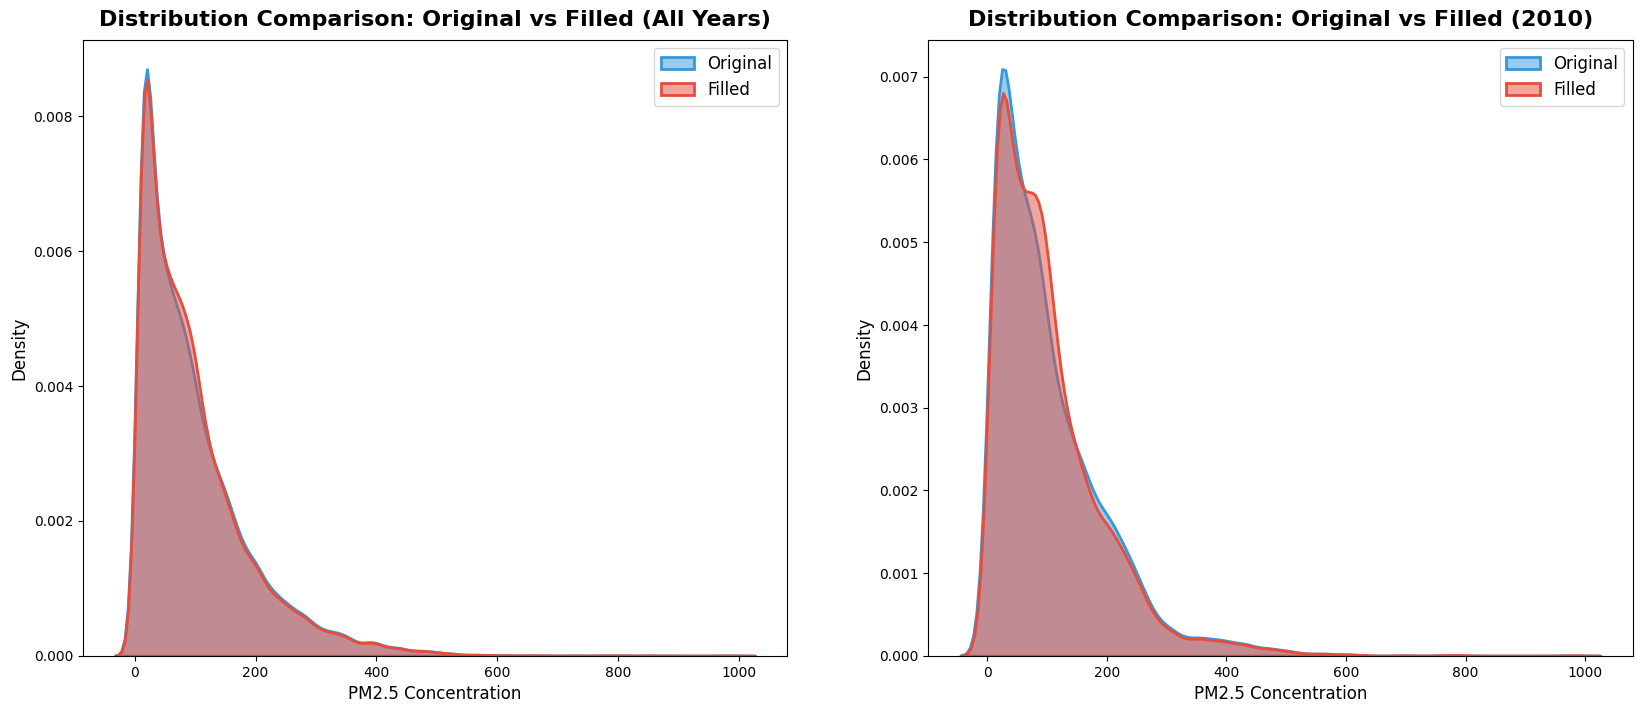

In [ ]:
# Define visualization colors
color_original = '#3498db'
color_filled = '#e74c3c'

# Create figure with two subplots
fig = plt.figure(figsize=(20, 8))
gs = GridSpec(1, 2, figure=fig)

# Left plot: Full dataset comparison
ax1 = fig.add_subplot(gs[0, 0])
sns.kdeplot(data=data, x='PM2.5', color=color_original, label='Original',
            fill=True, alpha=0.5, linewidth=2, ax=ax1)
sns.kdeplot(data=data, x='PM2.5_filled', color=color_filled, label='Filled',
            fill=True, alpha=0.5, linewidth=2, ax=ax1)
ax1.set_title('Distribution Comparison: Original vs Filled (All Years)',
              fontsize=16, fontweight='bold', pad=10)
ax1.set_xlabel('PM2.5 Concentration', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.tick_params(labelsize=10)
ax1.legend(fontsize=12)

# Right plot: Single year comparison (2010)
ax2 = fig.add_subplot(gs[0, 1])
year_to_plot = 2010
data_year = data[data.index.year == year_to_plot]
sns.kdeplot(data=data_year, x='PM2.5', color=color_original, label='Original',
                fill=True, alpha=0.5, linewidth=2, ax=ax2)
sns.kdeplot(data=data_year, x='PM2.5_filled', color=color_filled, label='Filled', fill=True, alpha=0.5, linewidth=2, ax=ax2)
ax2.set_title(f'Distribution Comparison: Original vs Filled ({year_to_plot})',
                  fontsize=16, fontweight='bold', pad=10)
ax2.set_xlabel('PM2.5 Concentration', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.tick_params(labelsize=10)
ax2.legend(fontsize=12)
plt.show()

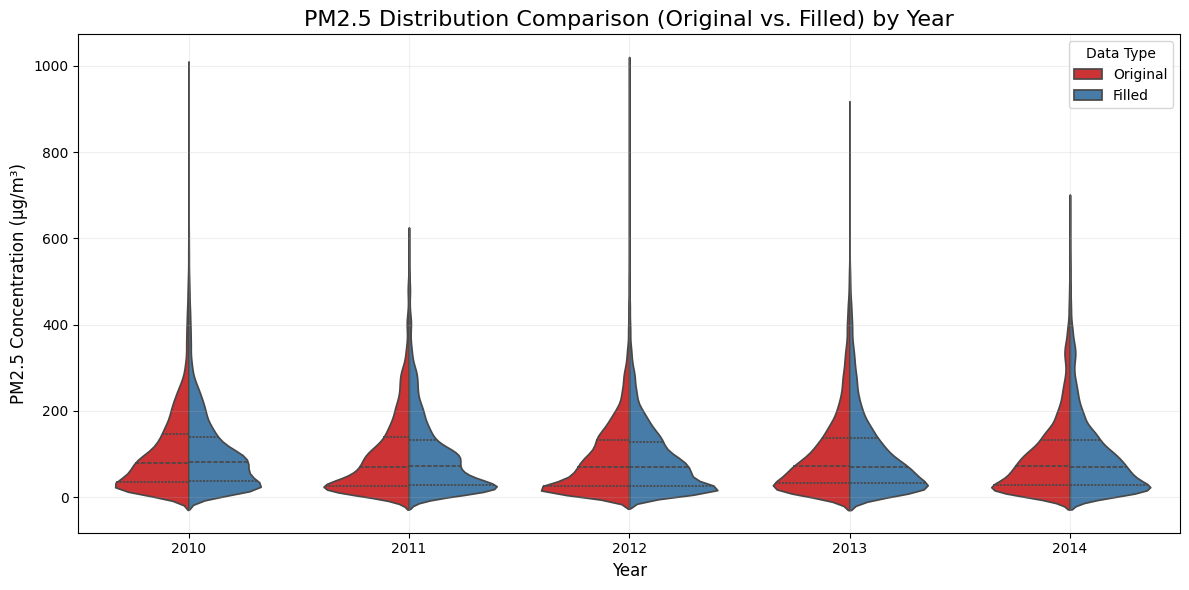


Correlation between PM2.5 and PM2.5_filled: 1.00


In [ ]:
# Prepare data for visualization by melting into long format
data['Year'] = data.index.year
df_melted = data.melt(id_vars=['Year'],
                     value_vars=['PM2.5', 'PM2.5_filled'],
                     var_name='Type',
                     value_name='PM25_value')
df_melted['Type'] = df_melted['Type'].map({'PM2.5': 'Original', 'PM2.5_filled': 'Filled'})

# Create violin plot comparing distributions by year
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set1")
sns.violinplot(x='Year', y='PM25_value', hue='Type', data=df_melted,
               split=True, palette=colors, inner='quartile')
plt.title('PM2.5 Distribution Comparison (Original vs. Filled) by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)
plt.legend(title='Data Type', fontsize=10)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.savefig('yearly_distribution_comparison_violin.png')
plt.show()

# Calculate and display descriptive statistics
pm25_stats = data[['PM2.5', 'PM2.5_filled']].describe().T
pm25_stats.index = ['Original PM2.5', 'Filled PM2.5']
pm25_styled = pm25_stats.style.format("{:.3f}").set_caption(
    "<b><font size='4'>Descriptive Statistics for PM2.5 (Original vs. Filled)</font></b>")
display(pm25_styled)

# Show correlation between original and filled values
correlation = data['PM2.5'].corr(data['PM2.5_filled'])
print(f"\n\033[1mCorrelation between PM2.5 and PM2.5_filled: {correlation:.2f}\033[0m")

---

#### 🔑 **Key Insights:**

- The **filled distribution closely follows** the original one, with near-identical statistical properties.
- Violin plots confirm that yearly distributional characteristics are preserved post-imputation.
- The **correlation between original and filled PM₂.₅** values is **1.00**, confirming fidelity.
- The strategy blends **temporal awareness** (daily cycles) with **robustness** (medians), ensuring reliable reconstruction without distortion.


---
##**1.6 Relationship Between Numerical Features**
---



Before begining the feature engineering process, we explore the pairwise relationships between key numerical variables using pair plots and correlation matrices. This helps us assess potential feature importance, detect redundancies, and uncover non-linear or seasonal patterns.

We focus on the following variables:

- `PM2.5` and `PM2.5_filled`: Target variable (original and imputed)  
- `Temp`: Temperature  
- `Press`: Atmospheric Pressure  
- `WindSpeed`: Wind Speed  
- `DewP`: Dew Point  

These visual tools allow us to validate environmental dependencies and later inform our modeling and feature selection steps.


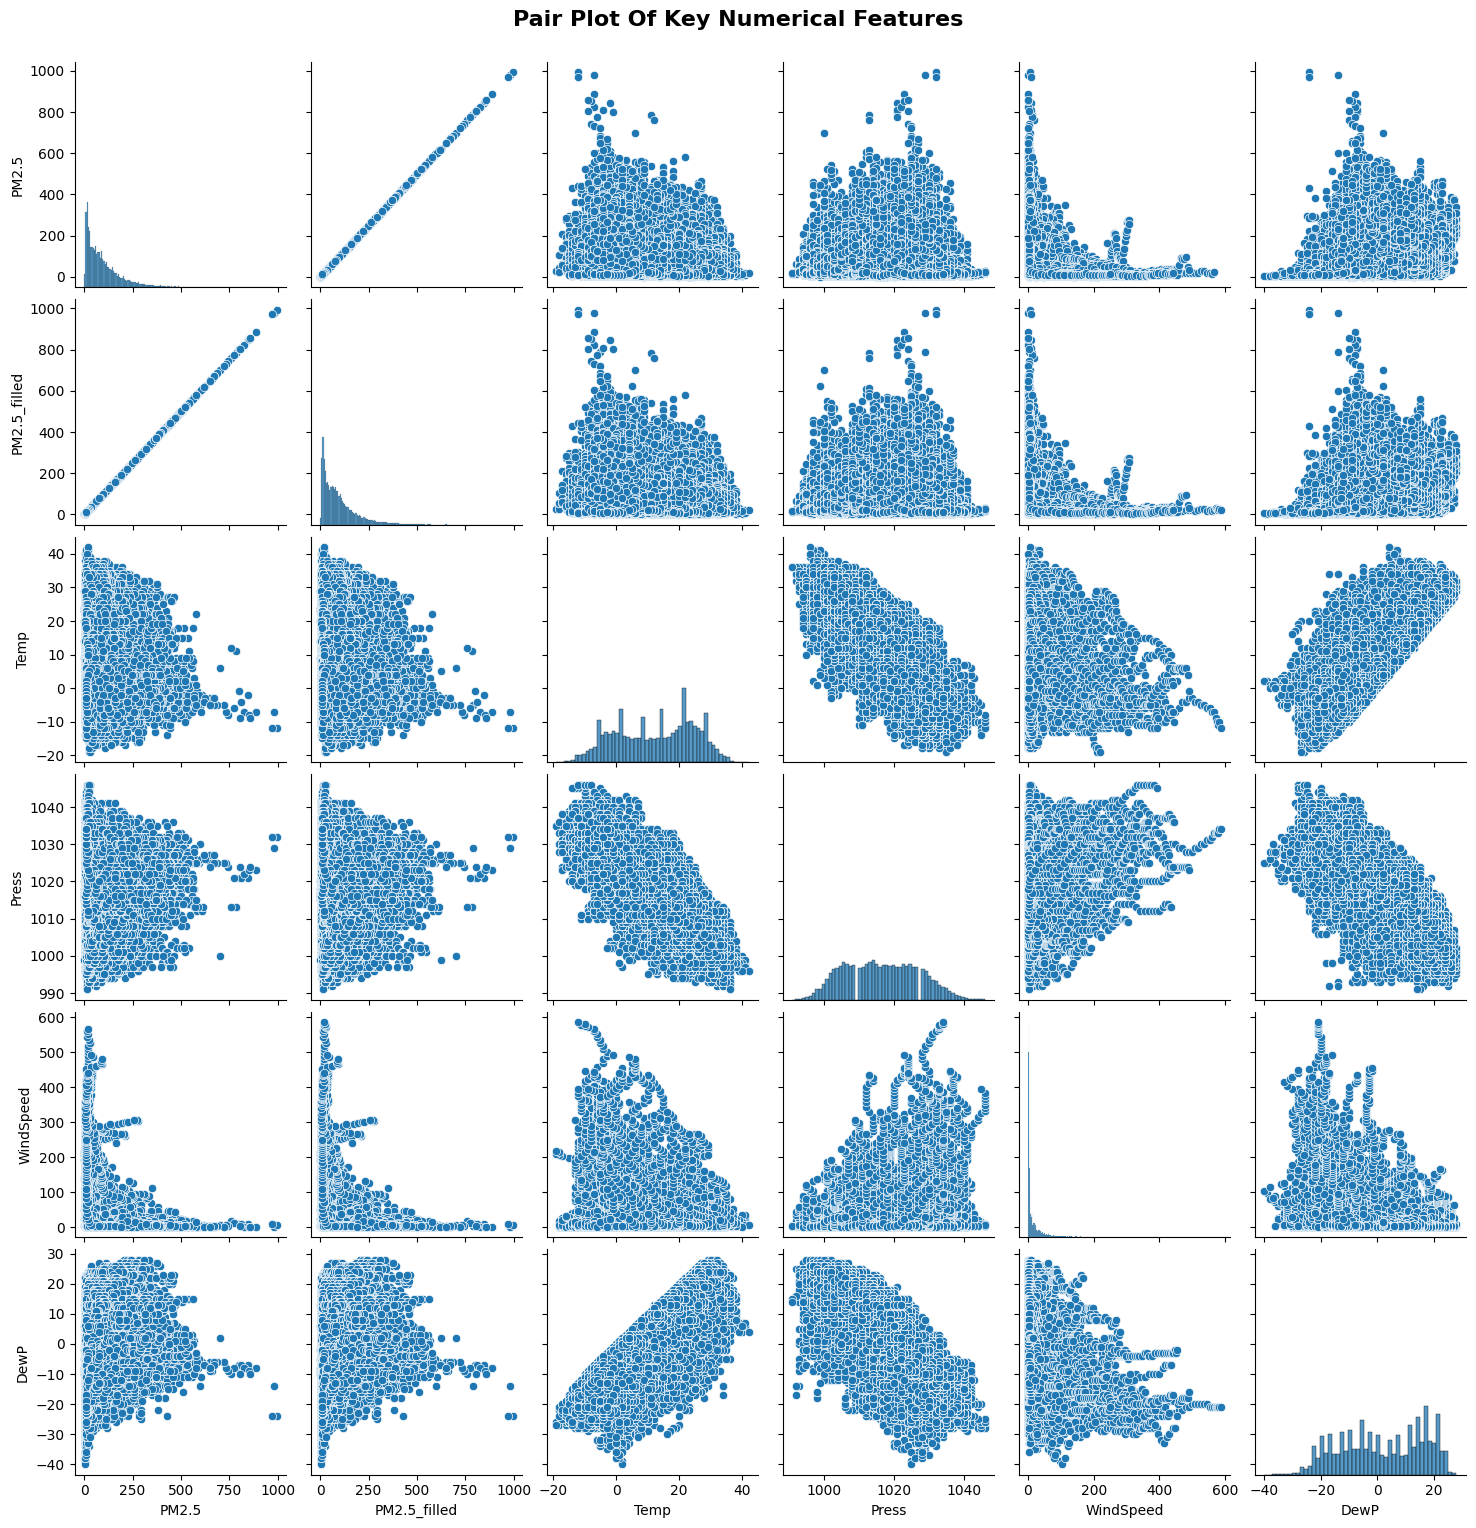

In [ ]:
numerical_variables = ['PM2.5', 'PM2.5_filled', 'Temp', 'Press', 'WindSpeed', 'DewP']
g = sns.pairplot(data[numerical_variables])
g.fig.suptitle("Pair Plot Of Key Numerical Features", fontsize=16, fontweight='bold', y=1.02)
plt.show()

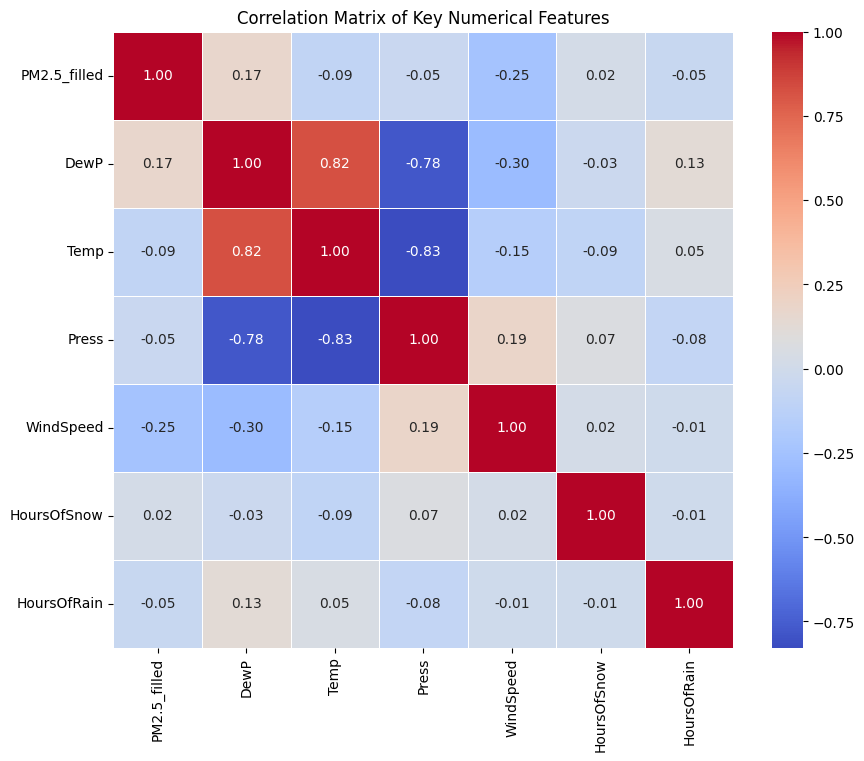

In [ ]:
numerical_features = ['PM2.5_filled', 'DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow', 'HoursOfRain']
categorical_features=['WinDir']

plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Features')
plt.show()

---
#### 🔑 **Key Insights:**

- **PM2.5 vs Temperature**  
  - High **PM₂.₅** at **lower temperatures (<10°C)**, confirming winter pollution peaks.  
  - Likely linked to **coal burning** and **temperature inversions trapping pollutants**.  
  - **Non-linear trend**, suggesting other influencing factors.

- **PM2.5 vs Wind Speed**  
  - **Strong negative correlation**: High pollution occurs when **wind speeds are low (<5 m/s)**.  
  - **Extreme pollution spikes** appear near **0 m/s**, showing accumulation during stagnant conditions.

- **PM2.5 vs Atmospheric Pressure**  
  - **PM₂.₅ increases** with pressure up to ~**1025 hPa**, then **declines**.  
  - Indicates that **high-pressure systems** may trap pollutants, a typical winter pattern.

- **PM2.5 vs PM2.5_filled**  
  - Very **strong agreement** between original and imputed values.  
  - Confirms that our imputation process preserved the underlying distribution.


---
###**Other Sources Used In This Section**

1. Mahmud S. et al. *Implementing Machine Learning Algorithms to Predict Particulate Matter (PM₂.₅): A Case Study in the Paso del Norte Region.* **Atmosphere** 13 (12), 2100 (2022).  
2. Tan A. *Forecasting_Air_Pollution – Beijing_PM_EDA notebook.* **GitHub** repository (2022).  
3. Zhang X. *time_series_forecasting_pytorch – models directory.* **GitHub** repository (2019).  
4. Bulut A. *Predict Pollution of Beijing with Regression Model.* **Kaggle** notebook (2022).


---

# **2.  FEATURE ENGINEERING** ##

---

This section contains:
- 2.1. Outlier Detection And Temporal Trends
- 2.2. Wind Speed Outlier Winsorization
- 2.3 PM2.5 Outlier Detection And Flagging
- 2.4 Categorical & Temporal Feature Engineering
- 2.5 Final Preparations: Temporal Signals, Lags & VMD shift


---
##**2.1 Outlier Detection And Temporal Trends**

---


In this section, we apply **two outlier detection techniques**—IQR and Z-score—on key environmental variables such as `PM2.5`, `Dew Point`, `Temperature`, `Pressure`, and `Wind Speed`. This helps us **identify anomalies** in the dataset and understand the overall distribution shape before feature normalization or modeling.

- **IQR Method**: Flags extreme values that fall outside 1.5× the interquartile range.
- **Z-score Method**: Detects statistical outliers based on deviation from the mean.

We then visualize the **daily trends and distributions** for each of these features using:
- **Scatter plots with 30-day rolling averages** (to reveal smoothed seasonal cycles),
- **Histograms + KDE curves** (to highlight skewness, modality, and value density).

**Source**

1. Esri. *Understanding Outliers in Time-Series Analysis.* **ArcGIS Pro Documentation** (accessed 2025).



In [ ]:
def detect_outliers(data, features):
    """Identifies outliers using IQR (2x threshold) and Z-score (3σ) methods"""
    outlier_info = []

    for feature in features:
        if pd.api.types.is_numeric_dtype(data[feature]):
            # IQR method detection (2x IQR threshold)
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound_iqr = Q1 - 2 * IQR
            upper_bound_iqr = Q3 + 2 * IQR
            outliers_iqr_count = len(data[(data[feature] < lower_bound_iqr) | (data[feature] > upper_bound_iqr)])

            # Z-score method detection (3σ threshold)
            z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
            outliers_zscore_count = len(data[z_scores > 3])

            outlier_info.append([feature, outliers_iqr_count, outliers_zscore_count])

    return pd.DataFrame(outlier_info, columns=["Feature", "IQR Outliers", "Z-score Outliers"])

# Detect and display outliers for key air quality metrics
relevant_features = ['PM2.5', 'DewP', 'Temp', 'Press', 'WindSpeed']
outlier_results = detect_outliers(data, relevant_features)
display(outlier_results)

Feature  IQR Outliers  Z-score Outliers
0      PM2.5           959               769
1       DewP             0                 0
2       Temp             0                 0
3      Press             0                 0
4  WindSpeed          4224              1163

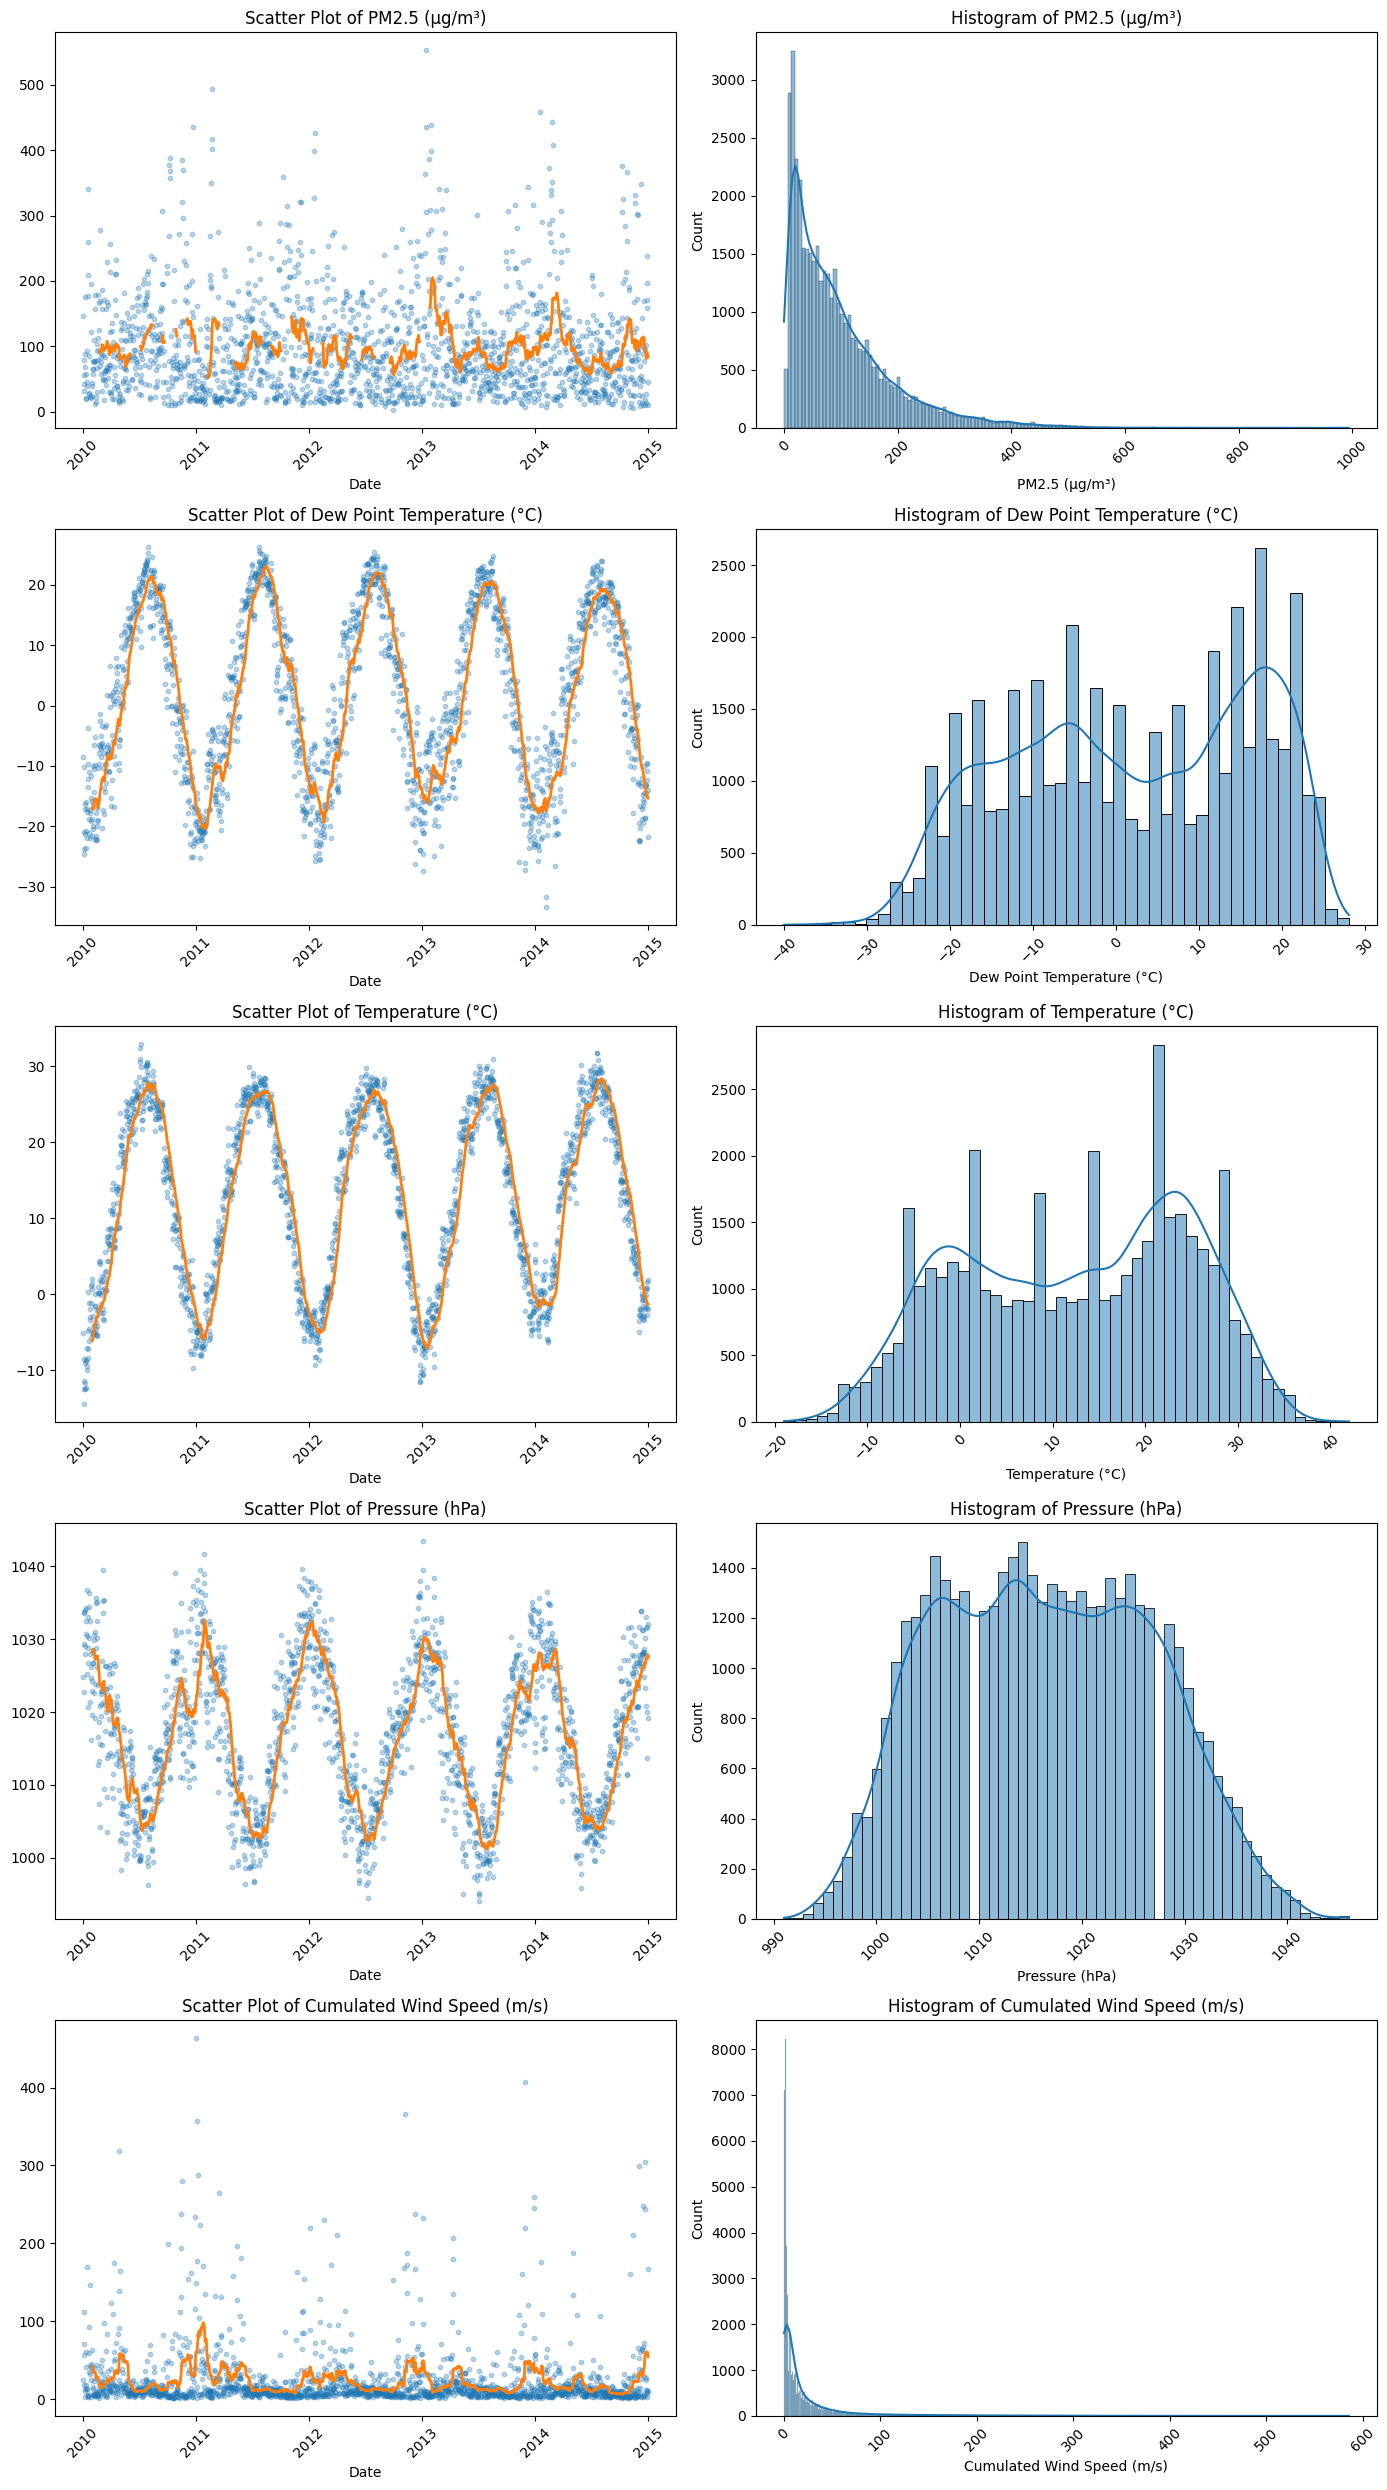

In [ ]:
# Define features to analyze with display labels
features = ['PM2.5', 'DewP', 'Temp', 'Press', 'WindSpeed']
feature_labels = {
    'PM2.5': 'PM2.5 (µg/m³)',
    'DewP': 'Dew Point Temperature (°C)',
    'Temp': 'Temperature (°C)',
    'Press': 'Pressure (hPa)',
    'WindSpeed': 'Cumulated Wind Speed (m/s)'
}

# Create daily averages for time series analysis
data_daily = data[features].resample('D').mean()

# Initialize figure with subplots (scatter+histogram for each feature)
fig, axes = plt.subplots(len(features), 2, figsize=(14, 5 * len(features)))

# Visualization colors
scatter_color = '#1f77b4'  # Blue for scatter points
rolling_color = '#ff7f0e'   # Orange for rolling mean

for i, feature in enumerate(features):
    # Left plot: Time series with rolling mean
    axes[i, 0].scatter(data_daily.index, data_daily[feature],
                      color=scatter_color, alpha=0.3, s=10)
    axes[i, 0].plot(data_daily.index,
                   data_daily[feature].rolling(30).mean(),
                   color=rolling_color, linewidth=2)

    # Right plot: Distribution histogram
    sns.histplot(data[feature], kde=True, ax=axes[i, 1])

    # Formatting both plots
    for j, plot_type in enumerate(['Scatter Plot', 'Histogram']):
        axes[i, j].set_title(f'{plot_type} of {feature_labels[feature]}')
        axes[i, j].set_xlabel(feature_labels[feature] if j == 1 else 'Date')
        axes[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('feature_scatter_hist_plots.png')
plt.show()

---

#### 🔑 **Key Insights:**

- **PM₂.₅**:
  - Shows a right-skewed distribution, with a **significant number of extreme pollution events**.
  - IQR flags ~950 outliers, while Z-score detects over 750—these are crucial for air quality alerts.

- **WindSpeed**:
  - Most extreme in terms of outliers: over **4200 (IQR)** and **1100 (Z-score)**.
  - Many values are clustered near 0, but some spikes go above 400 m/s, which are likely **sensor errors or invalid data entries**. Requires cleaning.

- **Temperature, Pressure, Dew Point**:
  - Exhibit **strong seasonal sinusoidal patterns** over the 5-year timeline, confirmed by the **smooth rolling mean lines**.
  - Their histograms are generally symmetric, indicating well-behaved features with relatively **low outlier counts**.

>We proceed by dealing with handling the outliers for ```PM2.5``` and ```WindSpeed```.



---
##**2.2 Wind Speed Outlier Winsorization**
---

In this section, we address **extreme WindSpeed values** using the **99th percentile** as a threshold for outliers, followed by **winsorization** to cap unrealistic spikes. We also explore how these outliers relate to other weather variables.

**Sources**

1. GeeksforGeeks. *Winsorization.* **GeeksforGeeks** (accessed 2025).  
2. DataCamp. *Winsorized Mean Tutorial.* **DataCamp** (accessed 2025).

---

###**Visualizing Extreme WindSpeed Outliers**


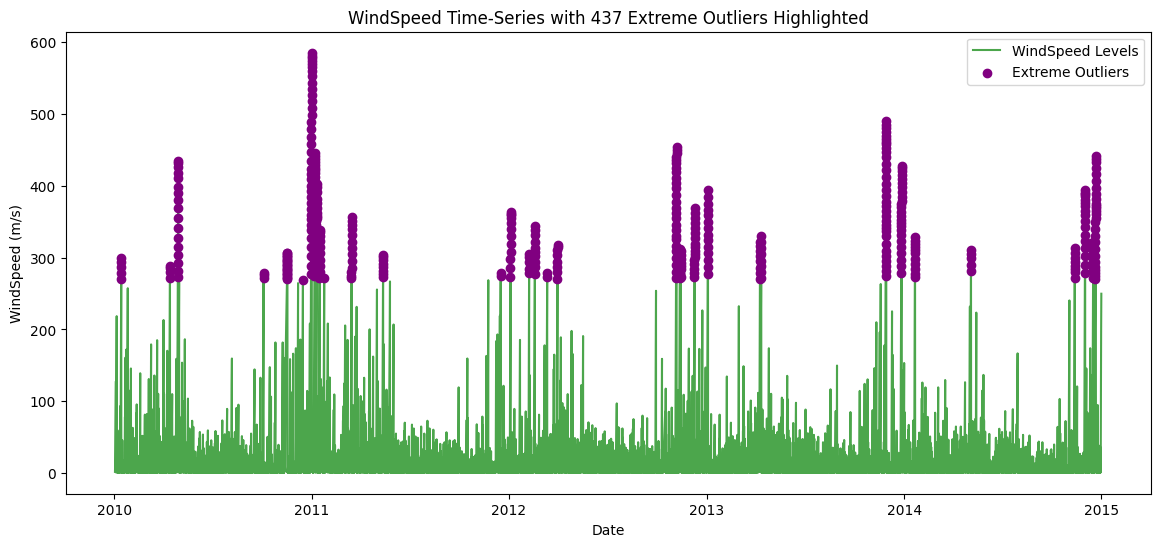

Threshold for extreme wind speeds (99th percentile): 269.12
Number of Extreme WindSpeed Outliers (WindSpeed > 269.12): 437
Proportion of extreme wind speeds: 1.00%


In [ ]:
# Calculate 99th percentile threshold for wind speed
threshold = data['WindSpeed'].quantile(0.99)

# Identify extreme wind speed outliers
extreme_outliers_ws = data[data["WindSpeed"] > threshold]
outlier_weather_stats_ws = extreme_outliers_ws[["WindSpeed", "Temp", "DewP", "PM2.5"]]
extreme_outliers_ws_count = len(extreme_outliers_ws)

# Plot wind speed time series with outliers highlighted
plt.figure(figsize=(14, 6))
plt.plot(data.index, data["WindSpeed"], label="WindSpeed Levels", alpha=0.7, color='green')
plt.scatter(extreme_outliers_ws.index, extreme_outliers_ws["WindSpeed"],
           color="purple", label="Extreme Outliers", zorder=2)
plt.xlabel("Date")
plt.ylabel("WindSpeed (m/s)")
plt.title(f"WindSpeed Time-Series with {extreme_outliers_ws_count} Extreme Outliers Highlighted")
plt.legend()
plt.show()

# Display outlier statistics
proportion_extreme = (extreme_outliers_ws_count / len(data)) * 100
print(f"Threshold for extreme wind speeds (99th percentile): {threshold:.2f}")
print(f"Number of Extreme WindSpeed Outliers (WindSpeed > {threshold:.2f}): {extreme_outliers_ws_count}")
print(f"Proportion of extreme wind speeds: {proportion_extreme:.2f}%")

---
#### 🔑 **Key Insights:**
- **437 records** flagged as extreme.
- Most are **isolated spikes** reaching above **400–500 m/s**, that are highly implausible.
- For context, even the strongest tornadoes reach no more than 135 m/s, and hurricane-force winds typically remain under 70 m/s.

- These values likely result from sensor malfunctions or recording errors, not actual weather events.

---
####**Winsorization of WindSpeed Values**

To handle extreme WindSpeed values, we apply a **winsorization technique** by capping all values above the **99th percentile (269.12 m/s)**.

- A new column `WindSpeed_Winsorized` is created.
- All values above the threshold are replaced with **269.12**, maintaining the structure while dampening extreme distortions.

**Purpose**: To reduce the influence of implausible spikes on downstream analysis while keeping the time-series structure intact.


In [ ]:
# Winsorize wind speed at 99th percentile
winsor_limit_ws = data['WindSpeed'].quantile(0.99)
print(f"WindSpeed Winsorization threshold (99th percentile): {winsor_limit_ws:.2f}")

# Cap values above threshold
data['WindSpeed_Winsorized'] = np.where(
    data['WindSpeed'] > winsor_limit_ws,
    winsor_limit_ws,
    data['WindSpeed']
)

WindSpeed Winsorization threshold (99th percentile): 269.12


---
####**Visual Comparison: Original vs Winsorized WindSpeed**


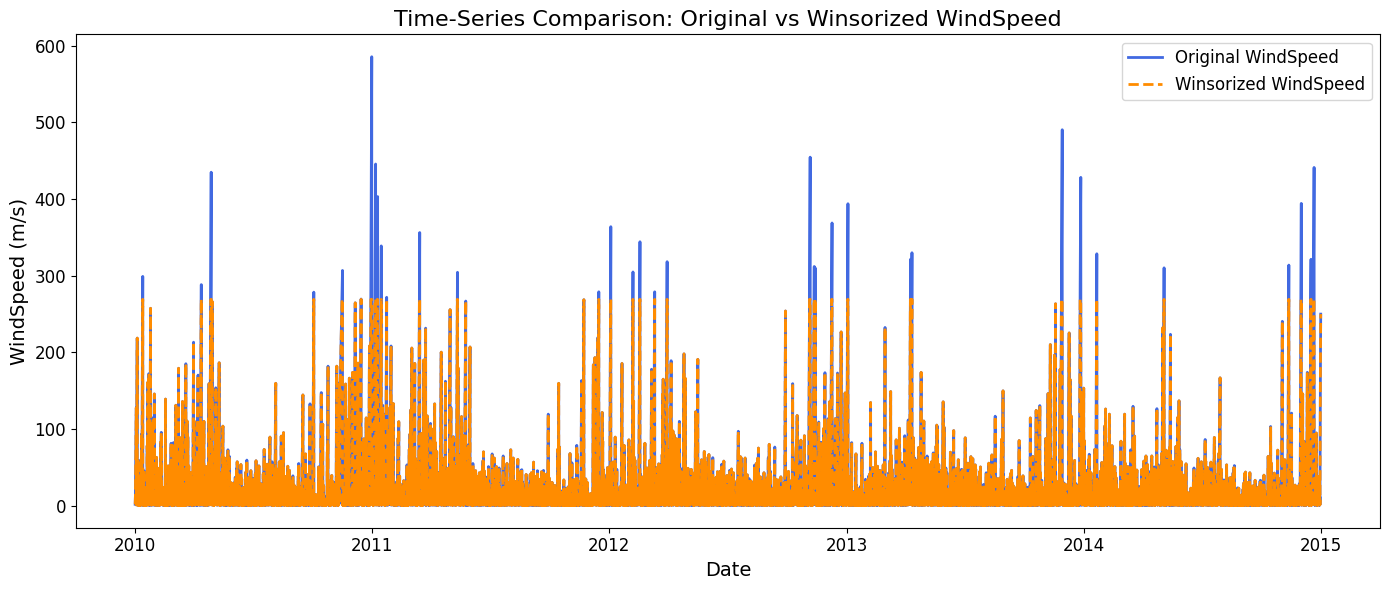

In [ ]:
# Create comparison plot of original vs winsorized wind speeds
plt.figure(figsize=(14, 6))

# Plot original wind speed data
plt.plot(data.index, data["WindSpeed"],
        label="Original WindSpeed",
        color='royalblue',
        linewidth=2)

# Plot winsorized version (capped at 99th percentile)
plt.plot(data.index, data["WindSpeed_Winsorized"],
        label="Winsorized WindSpeed",
        color='darkorange',
        linewidth=2,
        linestyle='--')

# Format plot appearance
plt.xlabel("Date", fontsize=14)
plt.ylabel("WindSpeed (m/s)", fontsize=14)
plt.title("Time-Series Comparison: Original vs Winsorized WindSpeed", fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**
- **Original WindSpeed** (blue solid line): Preserves all raw values, including extreme spikes.
- **Winsorized WindSpeed** (orange dashed line): Caps extreme values at 269.12 m/s.
- **Temporal structure remains unchanged**, but volatility due to extreme events is reduced.
- Winsorization has allowed us to preserve **overall seasonal trends** and data continuity while curbing outlier influence a practical approach for modeling and visualization.


---
##**2.3 PM₂.₅ Outlier Detection And Flagging**
---

In this section we:
- Identify unusually high PM₂.₅ concentrations.
- Understand their distribution over time.
- Flag them for modeling, or otherwise deal with them.
- Use signal decomposition (VMD) to detect and structure hidden patterns.


---
###**Year-wise Distribution of PM2.5 Levels**

We start by visualizing how PM₂.₅ concentrations vary across years using boxplots. This helps revealPersistent presence of high outliers across all years.


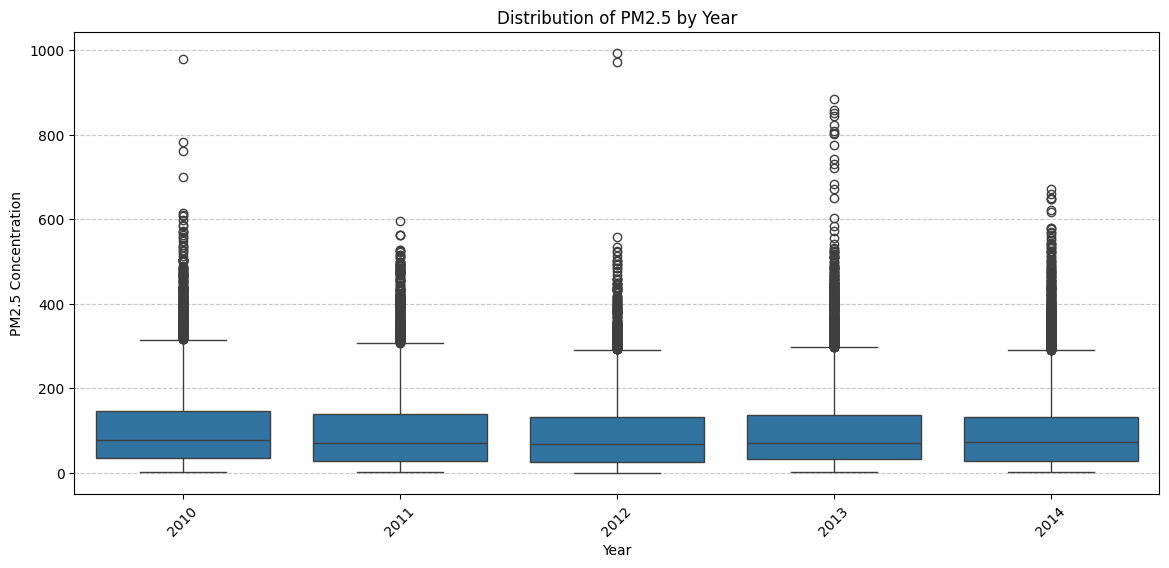

In [ ]:
# Add year column for grouping
data['Year'] = data.index.year

# Create boxplot of PM2.5 distribution by year
plt.figure(figsize=(14, 6))
sns.boxplot(x=data['Year'], y=data['PM2.5'])
plt.xlabel("Year")
plt.ylabel("PM2.5 Concentration")
plt.title("Distribution of PM2.5 by Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### 🔑 **Key Insights:**

* **Numerous outliers** across all years → values above 400 μg/m³ are frequent and represent significant pollution events.
* **2013 has the most extreme pollution events**, with some values exceeding 900 μg/m³.
* **IQR is stable**, indicating consistent baseline pollution patterns across years despite outliers.

---
###**Cumulative Distribution of PM₂.₅ Levels**

Here, we plot the Cumulative Distribution Function (CDF) of PM₂.₅ values to quantify the rarity of extreme events.


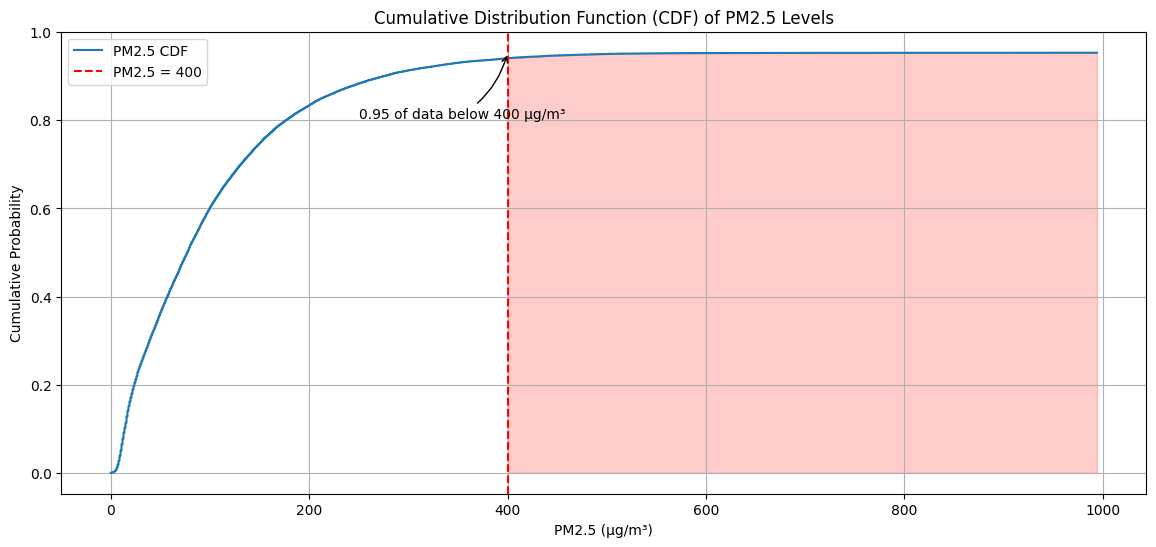

PM2.5 Range Percentage
0       0-200    83.224%
1     200-400    10.798%
2     400-600     1.189%
3     600-800     0.048%
4    800-1000     0.025%

In [ ]:
sorted_data = np.sort(data['PM2.5'])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)

plt.figure(figsize=(14, 6))
plt.plot(sorted_data, cdf, label='PM2.5 CDF')
plt.axvline(x=400, color='red', linestyle='--', label='PM2.5 = 400')
plt.fill_between(sorted_data, cdf, where=(sorted_data >= 400), color='red', alpha=0.2)
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF) of PM2.5 Levels")
plt.legend()
plt.grid(True)

cdf_value_at_400 = cdf[np.abs(sorted_data - 400).argmin()]
plt.annotate(f'{cdf_value_at_400:.2f} of data below 400 µg/m³',
             xy=(400, cdf_value_at_400),
             xytext=(250, cdf_value_at_400 - 0.15),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
plt.show()

percentage_table = pd.DataFrame(percentage_data, columns=['PM2.5 Range', 'Percentage'])
display(percentage_table)

 ---
#### 🔑 **Key Insights:**
- 95% of PM₂.₅ values fall below 400 μg/m³.
- The remaining ~5% are the tail events.
- This gives us a principled reference point for distinguishing between typical and extreme pollution.

---
###**Flagging Extreme PM2.5 Outliers (> 700 μg/m³)**

Using a strict threshold of 700 μg/m³, we mark data points representing extreme pollution events.


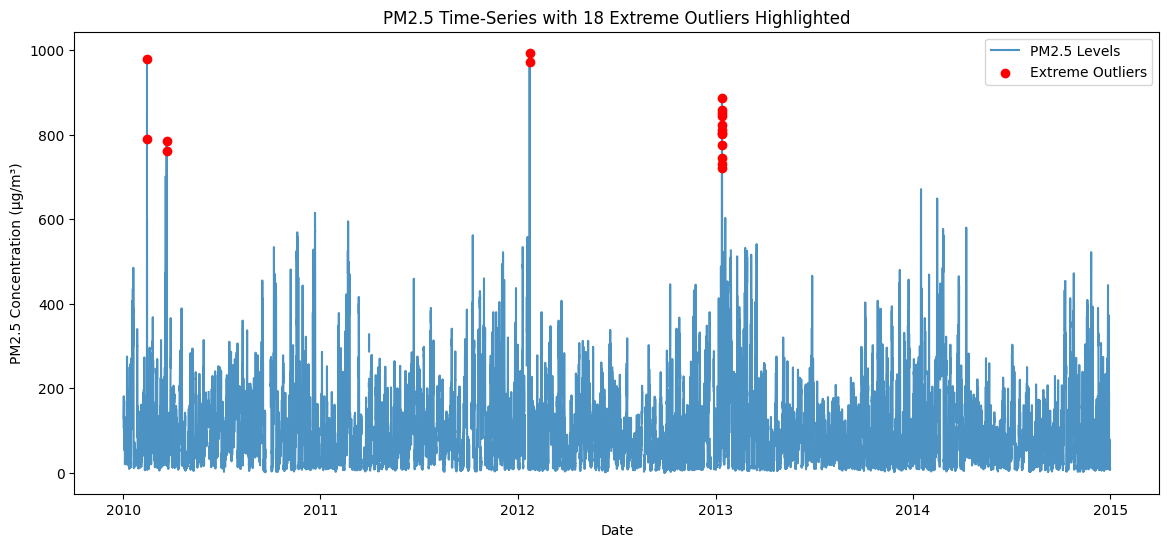

Number of Extreme Outliers (PM2.5_filled > 700 μg/m³): 18


In [ ]:
# Identify extreme PM2.5 outliers (>700 μg/m³)
extreme_outliers = data[data["PM2.5_filled"] > 700]
outlier_weather_stats = extreme_outliers[["PM2.5_filled", "Temp", "DewP", "WindSpeed"]]
extreme_outliers_count = len(extreme_outliers)

# Plot time series with outliers highlighted
plt.figure(figsize=(14, 6))
plt.plot(data.index, data["PM2.5"], label="PM2.5 Levels", alpha=0.8)
plt.scatter(extreme_outliers.index, extreme_outliers["PM2.5_filled"],
           color="red", label="Extreme Outliers", zorder=2)
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration (μg/m³)")
plt.title(f"PM2.5 Time-Series with {extreme_outliers_count} Extreme Outliers Highlighted")
plt.legend()
plt.show()

# Print outlier count
print(f"Number of Extreme Outliers (PM2.5_filled > 700 μg/m³): {extreme_outliers_count}")

---
#### 🔑 **Key Insights:**

* 18 extreme outliers identified (PM₂.₅ > 700 μg/m³).
* Highest recorded spike (~1000 μg/m³) in early 2012.
* Clusters of outliers around January in multiple years → potential seasonal impact.
* Outliers become less frequent after 2013, but occasional peaks persist.
* **These extreme events could provide valuable training examples** for our ML models to recognize severe pollution conditions.

###**Decision — Keep the Extremes**  
> Research shows that festival fireworks, winter mega-haze (the 2015 Beijing episode spiked to **≈ 1 000 µg m⁻³**) and wildfire smoke all drive short-lived but *real* PM₂.₅ surges, and that models trained with these out-liers outperform those that discard them.  

*Reference*  
Yin, P-Y. (2025). *A Review on PM₂.₅ Sources, Mass Prediction, and Association Analysis: Research Opportunities and Challenges*. *Sustainability, 17*(3), 1101. https://doi.org/10.3390/su17031101

> We therefore choose to **preserve** these records and **flag them** for modeling, as they might represent critical edge cases:


In [ ]:
# Create flag for extreme PM2.5 values (>700 μg/m³)
data['Extreme_PM2.5'] = data['PM2.5'] > 700


Aside from the simple `Extreme_PM2.5` falg we created above, there is a more sophisticated method used to caputre the temporal strcuture of the extreme values which you will see in the next section.

---
##**Variational Mode Decomposition (VMD)– Decomposing & Flagging Extreme PM2.5 Signals**

To better understand the temporal structure of pollution spikes, we apply **Variational Mode Decomposition (VMD)**.

VMD is a signal processing technique that decomposes a complex time series into a set of **oscillatory components (modes)**, each representing different frequency patterns.

VMD helps us:
- Isolate high-frequency spikes (e.g. sudden smog events).
- Separate baseline seasonal patterns from volatile behavior.
- Identify structurally distinct "pollution regimes" in the data.

Here, we decompose the PM₂.₅ time series into **four intrinsic modes** using the `vmdpy` package.




---
###**Step 1: Installation**



In [ ]:
!pip install vmdpy


---
###**Step 2: Extracting the PM2.5 Signal**

We extract the PM₂.₅ values as a single long 1-D array:

In [ ]:
# Extract filled PM2.5 values as numpy array and check shape
signal = data['PM2.5_filled'].values
print(signal.shape)

(43800,)


---
###**Step 3: Defining the VMD Function**

We define a helper function to apply VMD clearly and concisely:

In [ ]:
from vmdpy import VMD

def apply_vmd(signal, alpha=2000, tau=0, K=4, DC=0, init=1, tol=1e-7):
    """Decomposes signal into K intrinsic mode functions using VMD"""
    # Execute Variational Mode Decomposition
    u, u_hat, omega = VMD(signal, alpha, tau, K, DC, init, tol)
    return u

# Decompose PM2.5 signal into 3 modes
modes = apply_vmd(signal, K=4)
print(modes.shape)

(4, 43800)


---
###**Step 4: Visualizing the Modes**

Each mode isolates unique temporal scales:

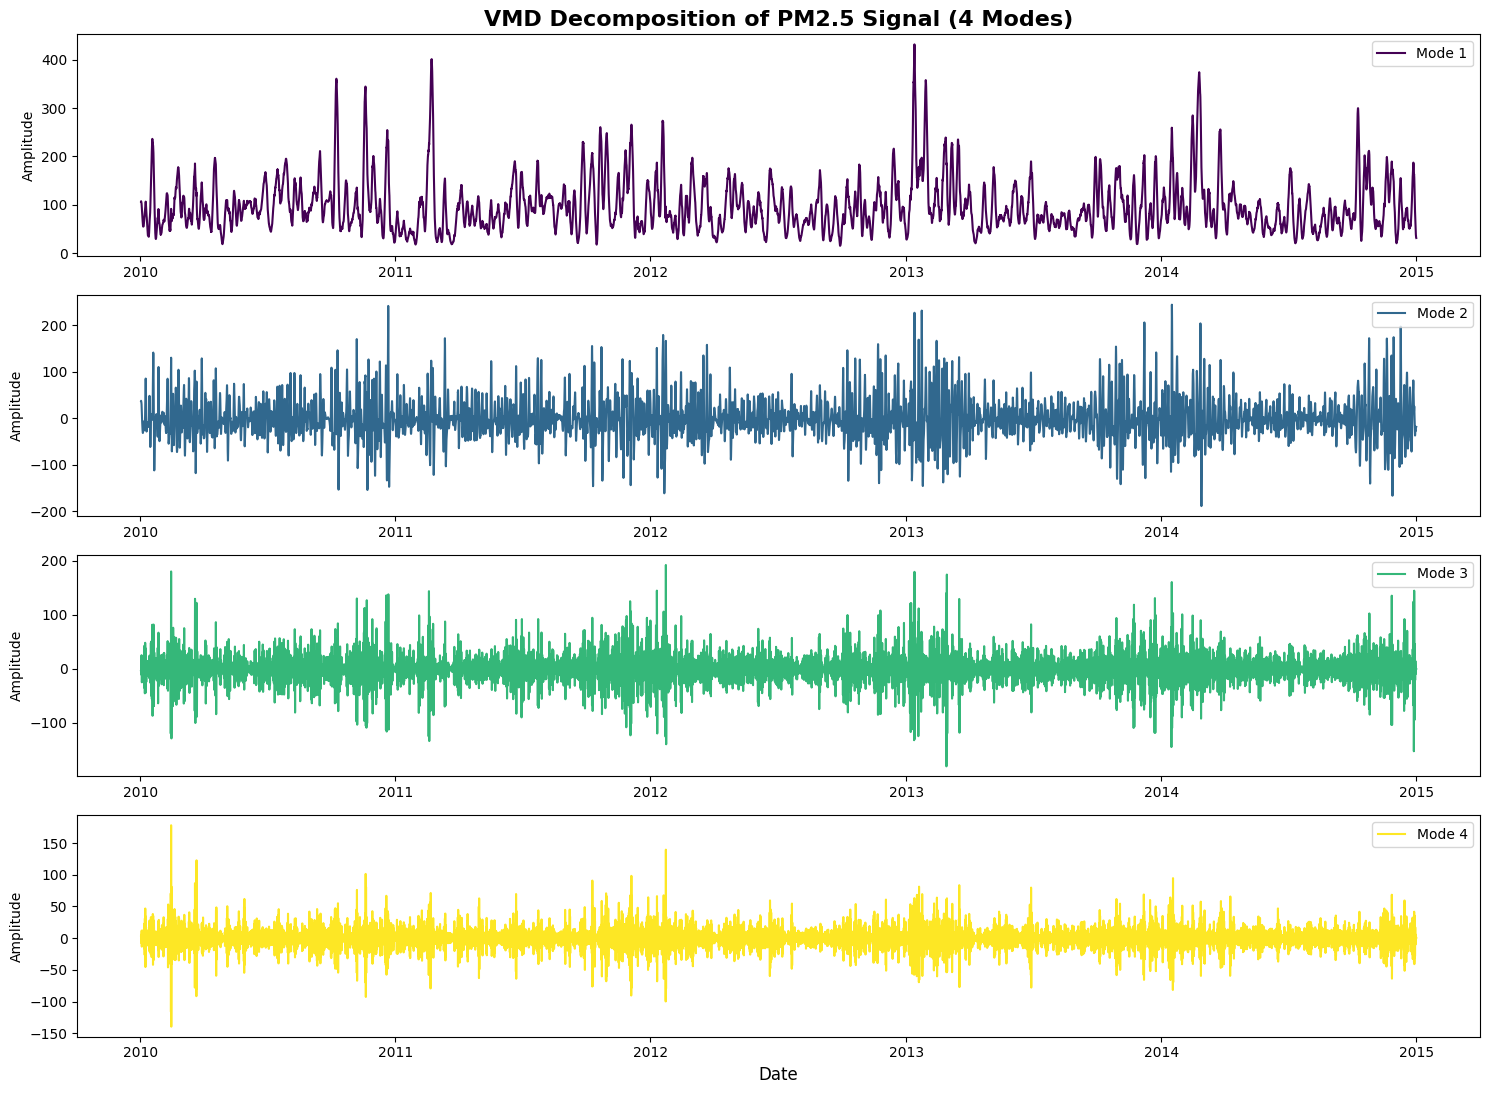

In [ ]:
# Plot each VMD mode in separate subplots
plt.figure(figsize=(15, 12))

# Define a subtle color palette
colors = plt.cm.viridis(np.linspace(0, 1, modes.shape[0]))

for i in range(modes.shape[0]):
    plt.subplot(modes.shape[0], 1, i+1)
    # Plot with the color from the defined palette
    plt.plot(data.index, modes[i, :], label=f'Mode {i+1}', color=colors[i], linewidth=1.5) # Added linewidth for clarity

    plt.legend(loc='upper right')
    plt.ylabel('Amplitude')

    # Add title to top subplot only
    if i == 0:
        plt.title('VMD Decomposition of PM2.5 Signal (4 Modes)', fontsize=16, fontweight='bold')

    # Add x-label to bottom subplot only
    if i == modes.shape[0]-1:
        plt.xlabel('Date', fontsize=12) # Increased font size


# Improve overall layout and appearance
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---
#### 🔑 **Key Insights:**

| Mode | Frequency Band | Interpretation (PM2.5 Context) |
|------|----------------|--------------------------------|
| **Mode 1** | High-frequency (hours) | Sudden spikes: short-term events like firecrackers or traffic bursts |
| **Mode 2** | Higher-mid frequency (daily) | Daily cycles: rush-hour traffic or daily industrial emissions |
| **Mode 3** | Lower-mid frequency (days–weeks) | Weather patterns: weekly cycles, short weather episodes |
| **Mode 4** | Low-frequency (seasonal–annual) | Seasonal baseline, long-term policy effects, slow trends |

---
**Mode 1** captures high-frequency bursts and sharp spikes: our primary interest for extreme event detection.

**Modes 2–4** reflect mid- and low-frequency variations such as seasonal cycles and background fluctuation.

This process helps us distinguish between noise and meaningful patterns, and **isolate spikes as separate signal components**.

---
###**Exploring Spike Thresholds in VMD Mode 1**

We visualize `Mode 1` from VMD with proposed thresholds at 95th percentile (around 200) and 300. This helps assess:

- At what amplitude we consider a fluctuation to be “spike-worthy.”
- Whether the 95th percentile or fixed visual thresholds are more interpretable.

This threshold selection enables us to flag meaningful pollution bursts, even when the raw PM₂.₅ doesn’t exceed 700.


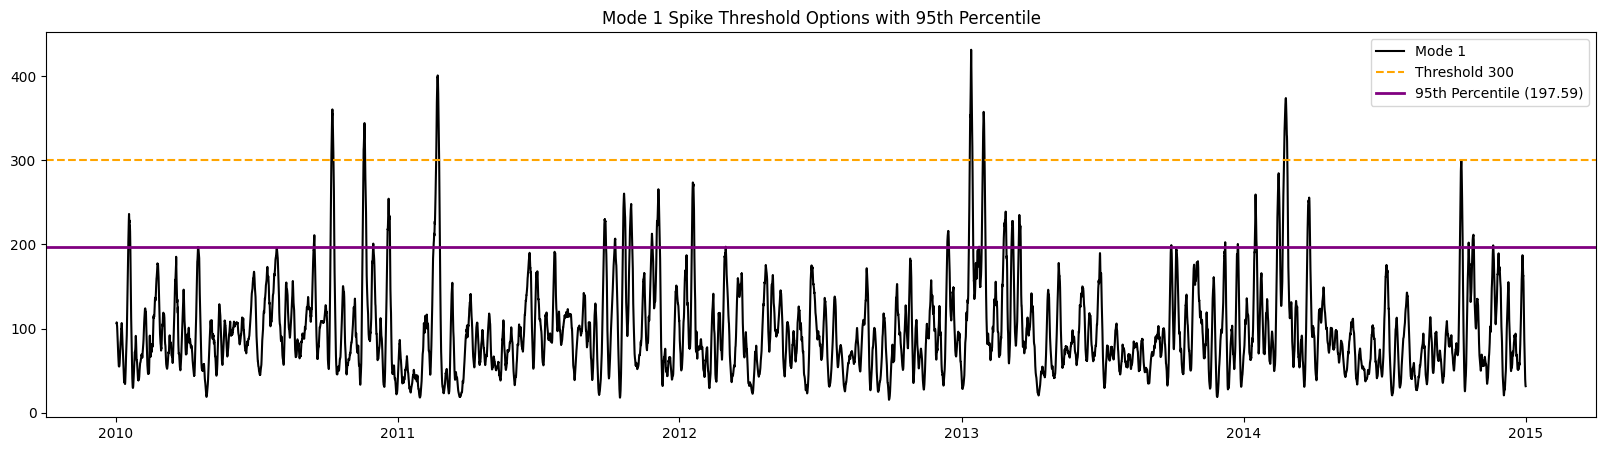

In [ ]:
# Extract Mode 1 from VMD decomposition
mode_1 = modes[0]

# Calculate the 95th percentile of Mode 1
vmd_threshold = np.quantile(mode_1, 0.95)

# Create a flag for values in Mode 1 exceeding the 95th percentile
data['Extreme_Event_VMD'] = mode_1 > vmd_threshold

# Plot Mode 1 with threshold options and the 95th percentile line
plt.figure(figsize=(20, 5))
plt.plot(data.index, mode_1, label="Mode 1", color='black')
plt.axhline(300, color='orange', linestyle='--', label='Threshold 300')
plt.axhline(vmd_threshold, color='purple', linestyle='-', linewidth=2, label=f'95th Percentile ({vmd_threshold:.2f})') # Add the 95th percentile line
plt.title("Mode 1 Spike Threshold Options with 95th Percentile")
plt.legend()
plt.show()

---
###**Creating The extreme events feature**

To translate the insights from our VMD analysis into a usable modeling signal, we generate a new binary flag: `Extreme_Event_VMD`.



In [ ]:
# Flag extreme events in Mode 1 (high-frequency component)
mode_1 = modes[0]  # First component from 4-mode VMD
data['Extreme_Event_VMD'] = mode_1 > vmd_threshold  # Boolean flag

- This flag identifies points where **Mode 1** exceeds the 95th percentile threshold.
- These represent **intense short-term volatility events**, distinct from gradual pollution build-ups.

This flag complements our earlier value-based flag (`Extreme_PM2.5`) and allows us to capture structurally significant events that may not always involve extreme PM₂.₅ levels.

---
###**Final Outcome: Two Outlier Flags**

We now have **two distinct ways of representing pollution extremes** in the data:

1. **`Extreme_PM2.5`** — a value-based flag (e.g., PM₂.₅ > 700 µg/m³)
2. **`Extreme_Event_VMD`** — a structure-based flag derived from VMD Mode 1 dynamics

Each captures a different kind of signal, one based on pollutant level, the other on pattern behavior.

This layered experimentation helps assess whether temporal structure (captured by VMD) can enhance prediction beyond raw concentration spikes. Which we will test in the feature importance section.



---

##**2.4 Categorical & Temporal Feature Engineering**

---
 In this section:

- **I. Exploring Rare Weather Events: HoursOfRain and HoursOfSnow**
- **II. Wind Direction: Transformation**


---
###**I. Exploring Rare Weather Events: HoursOfRain and HoursOfSnow**

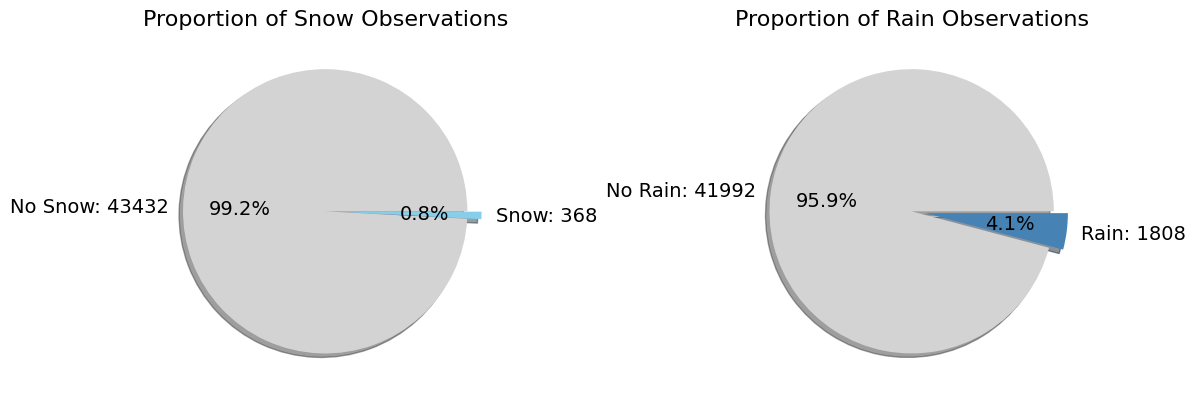

Correlation between HoursOfSnow and PM2.5: 0.019
Correlation between HoursOfRain and PM2.5: -0.051


In [ ]:
# Create figure for snow/rain distribution plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Snow occurrence pie chart
snow_zeros = (data['HoursOfSnow'] == 0).sum()
snow_non_zeros = (data['HoursOfSnow'] > 0).sum()
axes[0].pie([snow_zeros, snow_non_zeros],
            labels=[f'No Snow: {snow_zeros}', f'Snow: {snow_non_zeros}'],
            autopct='%1.1f%%', colors=['lightgray', 'skyblue'],
            explode=(0, 0.1), shadow=True, textprops={'fontsize': 14})
axes[0].set_title('Proportion of Snow Observations', fontsize=16)

# Rain occurrence pie chart
rain_zeros = (data['HoursOfRain'] == 0).sum()
rain_non_zeros = (data['HoursOfRain'] > 0).sum()
axes[1].pie([rain_zeros, rain_non_zeros],
            labels=[f'No Rain: {rain_zeros}', f'Rain: {rain_non_zeros}'],
            autopct='%1.1f%%', colors=['lightgray', 'steelblue'],
            explode=(0, 0.1), shadow=True, textprops={'fontsize': 14})
axes[1].set_title('Proportion of Rain Observations', fontsize=16)

# Save and display plots
plt.tight_layout()
plt.savefig('weather_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate PM2.5 correlations
correlation_snow = data['HoursOfSnow'].corr(data['PM2.5'])
correlation_rain = data['HoursOfRain'].corr(data['PM2.5'])
print(f"Correlation between HoursOfSnow and PM2.5: {correlation_snow:.3f}")
print(f"Correlation between HoursOfRain and PM2.5: {correlation_rain:.3f}")

---
#### 🔑 **Key Insights:**

- Both of these catagorical features are **imbalanced** and have **very weak correlation with PM2.5.**

At first glance, both features appear **too sparse** and **weakly correlated** to justify inclusion. However, we test this assumption more rigorously in the next steps using **rolling hours** logic.



---

### **Can These Features Still Be Useful?** – Experimenting with Rolling Hours of Snow and Rain:

To assess whether these features offer any **predictive signal**, we trained three seperate **Random Forest Regression models** and compared them. The three models:

- One with the **raw categorical variable** (HoursOfRain / HoursOfSnow)
- One with a **24-hour rolling sum**, capturing recent accumulation
- One **without the feature** at all (baseline)

> The rolling feature captures **how much rain/snow occurred over the past day**, not just in a single hour.

> This provides a **short-term memory** of recent rainfall, which may affect PM₂.₅ by clearing particles from the air or altering atmospheric conditions.

> In contrast, a single-hour rain reading may miss these cumulative effects entirely.

This should help us answer:
**Can a rolling version of these features help improve predictive modelling?**

---

###**Testing Rolling Hours of Rain**



Model  Mean Absolute Error (MAE)  \
0          With HoursOfRain                  49.784574   
1  With Rolling HoursOfRain                  46.245804   
2       Without HoursOfRain                  50.166820   

   Root Mean Squared Error (RMSE)  R-Squared (R²)  
0                       75.055294        0.338639  
1                       71.384547        0.401748  
2                       75.633285        0.328413

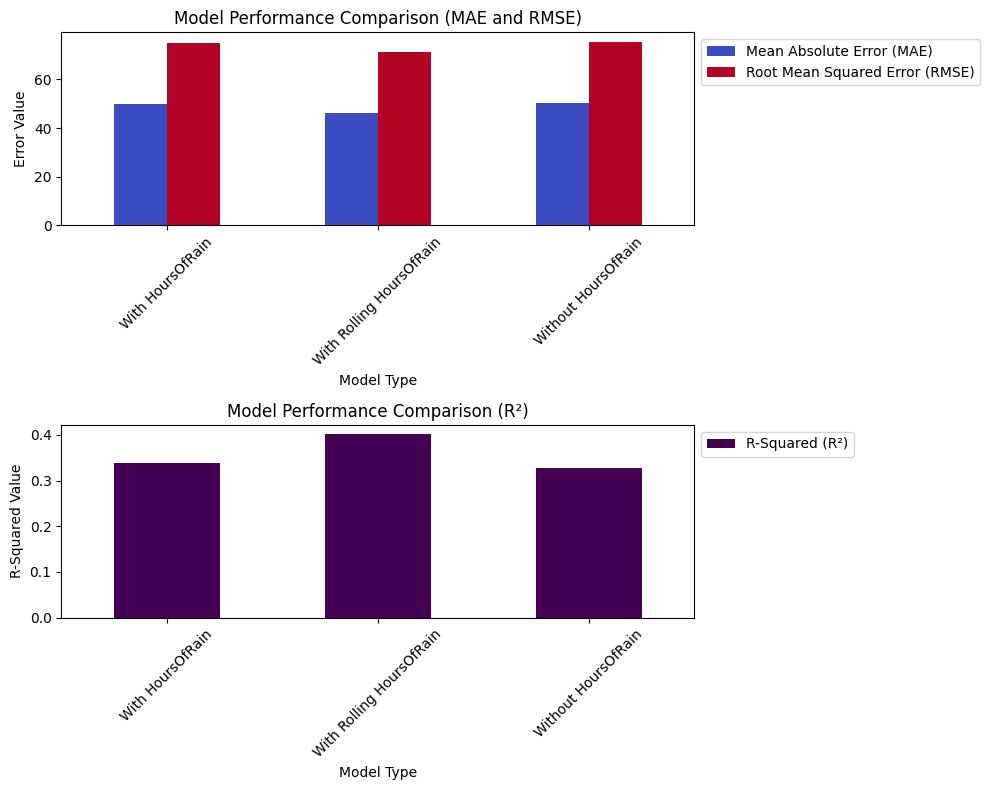

In [ ]:
## Testing Rolling Hours of Rain

# Calculate a 24-hour rolling sum of the 'HoursOfRain' feature to capture cumulative rainfall.
data['HoursOfRain_rolling'] = data['HoursOfRain'].rolling(window=24, min_periods=1).sum()

## Defining Feature Sets and Target Variable

# Define three different sets of features for comparison.
features_with_rain = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfRain']
features_with_rolling_rain = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfRain_rolling']
features_without_rain = ['DewP', 'Temp', 'Press', 'WindSpeed']
target = 'PM2.5_filled'

## Splitting Data (80/20) for Model Training and Testing
# The random_state ensures reproducible splits.
X_train_rain, X_test_rain, y_train, y_test = train_test_split(
    data[features_with_rain], data[target], test_size=0.2, random_state=42
)
X_train_rolling_rain, X_test_rolling_rain, _, _ = train_test_split(
    data[features_with_rolling_rain], data[target], test_size=0.2, random_state=42
)
X_train_no_rain, X_test_no_rain, _, _ = train_test_split(
    data[features_without_rain], data[target], test_size=0.2, random_state=42
)

## Initializing and Training Random Forest Models

# Initialize three Random Forest Regressor models, one for each feature set.
model_with_rain = RandomForestRegressor(n_estimators=100, random_state=42)
model_with_rolling_rain = RandomForestRegressor(n_estimators=100, random_state=42)
model_without_rain = RandomForestRegressor(n_estimators=100, random_state=42)

model_with_rain.fit(X_train_rain, y_train)
model_with_rolling_rain.fit(X_train_rolling_rain, y_train)
model_without_rain.fit(X_train_no_rain, y_train)

## Making Predictions

# Use the trained models to make predictions on their respective testing sets.
y_pred_with_rain = model_with_rain.predict(X_test_rain)
y_pred_with_rolling_rain = model_with_rolling_rain.predict(X_test_rolling_rain)
y_pred_without_rain = model_without_rain.predict(X_test_no_rain)

## Evaluating Model Performance

# Define a function to calculate key regression evaluation metrics (MAE, RMSE, R²).
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_with_rain, rmse_with_rain, r2_with_rain = evaluate_model(y_test, y_pred_with_rain)
mae_with_rolling_rain, rmse_with_rolling_rain, r2_with_rolling_rain = evaluate_model(y_test, y_pred_with_rolling_rain)
mae_without_rain, rmse_without_rain, r2_without_rain = evaluate_model(y_test, y_pred_without_rain)

## Comparing Results and Visualization

# Create a DataFrame to summarize the performance metrics of all models.
comparison_df = pd.DataFrame({
    "Model": ["With HoursOfRain", "With Rolling HoursOfRain", "Without HoursOfRain"],
    "Mean Absolute Error (MAE)": [mae_with_rain, mae_with_rolling_rain, mae_without_rain],
    "Root Mean Squared Error (RMSE)": [rmse_with_rain, rmse_with_rolling_rain, rmse_without_rain],
    "R-Squared (R²)": [r2_with_rain, r2_with_rolling_rain, r2_without_rain]
})

# Display the comparison table.
display(comparison_df)
print("\n\n")

# Generate bar plots to visualize the comparison of MAE, RMSE, and R² metrics.
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

# Plot MAE and RMSE
comparison_df[['Model', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)']].set_index("Model").plot(kind='bar', ax=axes[0], colormap="coolwarm")
axes[0].set_title("Model Performance Comparison (MAE and RMSE)")
axes[0].set_ylabel("Error Value")
axes[0].set_xlabel("Model Type")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot R²
comparison_df[['Model', 'R-Squared (R²)']].set_index("Model").plot(kind='bar', ax=axes[1], colormap="viridis")
axes[1].set_title("Model Performance Comparison (R²)")
axes[1].set_ylabel("R-Squared Value")
axes[1].set_xlabel("Model Type")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**

- The **raw `HoursOfRain`** variable had minimal impact on model performance.  
- However, the **rolling version (24-hour sum)** slightly improved all metrics:
  - Highest **R² (0.401)** and lowest **MAE/RMSE**
- The rolling feature captures **short-term rain accumulation**, which may affect air quality through atmospheric cleansing or changes in particle dispersion.

> Even though rain is rare, its **temporal context** captured by rolling features can provide meaningful short-term predictive value.

---

### **Testing Rolling Hours of Snow**


Model  Mean Absolute Error (MAE)  \
0          With HoursOfSnow                  50.204024   
1  With Rolling HoursOfSnow                  49.270035   
2       Without HoursOfSnow                  50.166820   

   Root Mean Squared Error (RMSE)  R-Squared (R²)  
0                       75.543358        0.330010  
1                       74.040917        0.356395  
2                       75.633285        0.328413

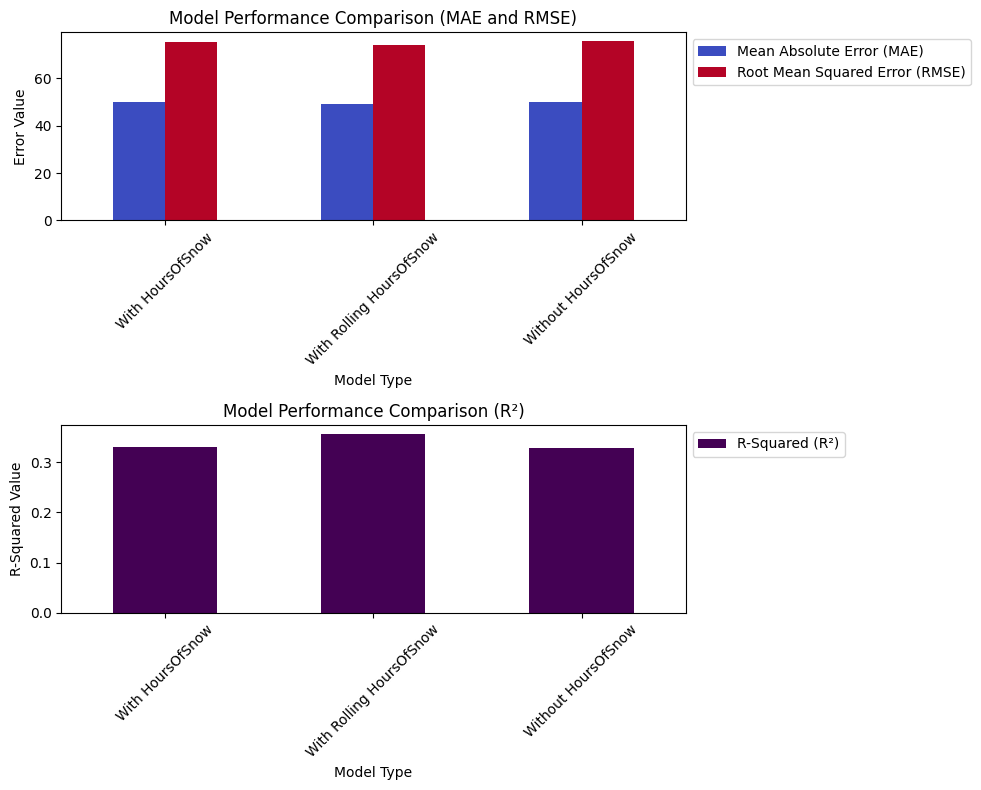

In [ ]:
## Testing Rolling Hours of Snow

# Calculate a 24-hour rolling sum of the 'HoursOfSnow' feature to capture cumulative snowfall over the past day.
data['HoursOfSnow_rolling'] = data['HoursOfSnow'].rolling(window=24, min_periods=1).sum()

## Defining Feature Sets and Target Variable

# Define three different sets of features for comparison: original features
features_with_snow = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow']
features_with_rolling_snow = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow_rolling']
features_without_snow = ['DewP', 'Temp', 'Press', 'WindSpeed']
target = 'PM2.5_filled'

## Splitting Data (80/20) for Model Training and Testing
# The random_state ensures reproducible splits.
X_train_snow, X_test_snow, y_train, y_test = train_test_split(
     data[features_with_snow], data[target], test_size=0.2, random_state=42
 )
X_train_rolling_snow, X_test_rolling_snow, _, _ = train_test_split(
     data[features_with_rolling_snow], data[target], test_size=0.2, random_state=42
 )
X_train_no_snow, X_test_no_snow, _, _ = train_test_split(
     data[features_without_snow], data[target], test_size=0.2, random_state=42
 )

## Initializing and Training Random Forest Models

# Initialize three Random Forest Regressor models, one for each feature set.
model_with_snow = RandomForestRegressor(n_estimators=100, random_state=42)
model_with_rolling_snow = RandomForestRegressor(n_estimators=100, random_state=42)
model_without_snow = RandomForestRegressor(n_estimators=100, random_state=42)

# Train each model using its respective training data.
model_with_snow.fit(X_train_snow, y_train)
model_with_rolling_snow.fit(X_train_rolling_snow, y_train)
model_without_snow.fit(X_train_no_snow, y_train)

## Making Predictions

# Use the trained models to make predictions on their respective testing sets.
y_pred_with_snow = model_with_snow.predict(X_test_snow)
y_pred_with_rolling_snow = model_with_rolling_snow.predict(X_test_rolling_snow)
y_pred_without_snow = model_without_snow.predict(X_test_no_snow)

## Evaluating Model Performance

# Define a function to calculate key regression evaluation metrics (MAE, RMSE, R²).
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate each model's performance using the evaluation function.
mae_with_snow, rmse_with_snow, r2_with_snow = evaluate_model(y_test, y_pred_with_snow)
mae_with_rolling_snow, rmse_with_rolling_snow, r2_with_rolling_snow = evaluate_model(y_test, y_pred_with_rolling_snow)
mae_without_snow, rmse_without_snow, r2_without_snow = evaluate_model(y_test, y_pred_without_snow)

## Comparing Results and Visualization

# Create a DataFrame to summarize the performance metrics of all models for easy comparison.
comparison_df = pd.DataFrame({
    "Model": ["With HoursOfSnow", "With Rolling HoursOfSnow", "Without HoursOfSnow"],
    "Mean Absolute Error (MAE)": [mae_with_snow, mae_with_rolling_snow, mae_without_snow],
    "Root Mean Squared Error (RMSE)": [rmse_with_snow, rmse_with_rolling_snow, rmse_without_snow],
    "R-Squared (R²)": [r2_with_snow, r2_with_rolling_snow, r2_without_snow]
})

# Display the comparison table in the notebook output.
display(comparison_df)
print("\n\n")

# Generate bar plots to visualize the comparison of MAE, RMSE, and R² metrics.
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

# Plot MAE and RMSE
comparison_df[['Model', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)']].set_index("Model").plot(kind='bar', ax=axes[0], colormap="coolwarm")
axes[0].set_title("Model Performance Comparison (MAE and RMSE)")
axes[0].set_ylabel("Error Value")
axes[0].set_xlabel("Model Type")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot R²
comparison_df[['Model', 'R-Squared (R²)',]].set_index("Model").plot(kind='bar', ax=axes[1], colormap="viridis")
axes[1].set_title("Model Performance Comparison (R²)")
axes[1].set_ylabel("R-Squared Value")
axes[1].set_xlabel("Model Type")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**

- Like rain, the **raw `HoursOfSnow`** was not useful on its own.  
- The **rolling sum** version performed slightly better than both the raw and excluded models.
- The effect was less pronounced than for rain, likely due to **even lower frequency** and possibly less direct impact on PM₂.₅ levels.

> Snow may contribute to pollution variation in specific conditions (e.g., winter stagnation), but its predictive value is limited to edge cases and is less consistent than rain.


---
### **Conclusion**


- A rolling feature transforms a **single-hour signal into a cumulative one**, tracking **recent conditions over time**.  

- This gives the model richer temporal context and can reveal **slow-building effects** that isolated hourly values may miss.


Although `HoursOfRain` and `HoursOfSnow` appear weak based on distribution and correlation, **exploratory modeling** shows that rolling versions can add subtle but **real predictive value**.



---
###**II. Wind direction: Transformation**

* Wind direction is a crucial factor in air pollution, as it determines where pollutants are transported. Understanding the distribution and how to represent this cyclical feature is important for effective modeling.

* First, we examine the frequency of each wind direction category in the dataset.

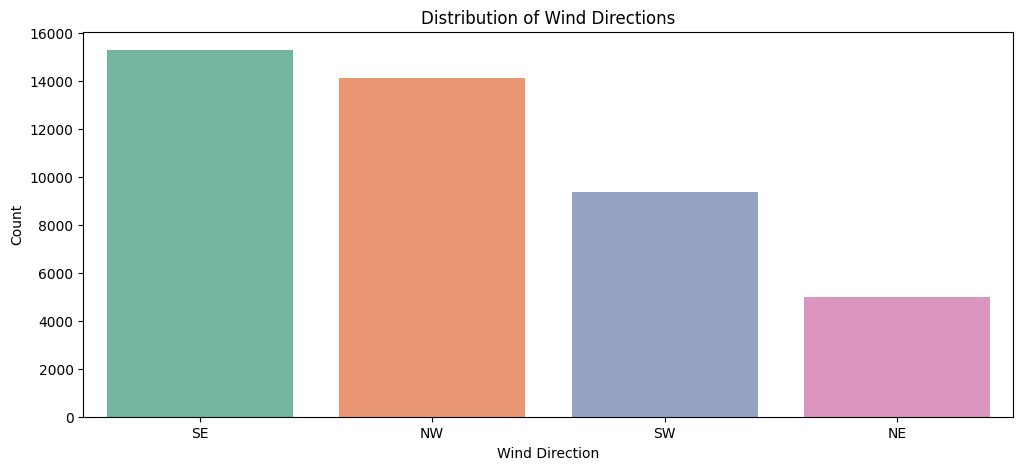

In [ ]:
data.loc[:, 'WinDir'] = data['WinDir'].astype(str).str.upper()

colors = sns.color_palette('Set2')

plt.figure(figsize=(12, 5))
sns.countplot(x='WinDir', data=data, palette=colors, order=data['WinDir'].value_counts().index)
plt.title('Distribution of Wind Directions')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.show()

---
#### 🔑 **Key Insights:**

* **Uneven Distribution**: The analysis reveals that wind directions are not evenly distributed throughout the dataset, indicating potential class imbalance.

* **Dominant Directions**: SE (35.5%) and NW (30.2%) are the most frequent wind directions, accounting for a significant majority of the records.

* **Least Frequent Direction**: NE is the least frequent (11.8%).
Potential Impact of Imbalance: The low occurrence of NE might make models less effective at capturing its potential influence on PM₂.₅ compared to more frequent directions.

* **Resampling Methods**: If wind direction is found to be a significant predictor for PM₂.₅, employing resampling techniques (like oversampling the minority class 'NE' or undersampling the majority classes 'SE' and 'NW') might be needed to address this imbalance.

---
### **Transforming Wind Direction into Continuous Features using Sine and Cosine:**


Wind direction initially appears as categorical labels,to accurately represent wind direction, we can convert the directions into two continuous numbers using sine and cosine functions. This method **preserves the circular nature of wind direction** and shows how different directions relate to each other. Here is how it works:

---
### **Step1: Mapping Categorical Directions to Numerical Degrees**

Before applying sine and cosine transformations, we convert categorical wind directions to numerical degrees following the **Standard Meteorological Convention**.

| Compass Direction | Degrees (°)      |
|-------------------|------------------|
| N                 | 0                |
| NNE               | 22.5             |
| NE                | 45               |
| ENE               | 67.5             |
| E                 | 90               |
| ESE               | 112.5            |
| SE                | 135              |
| SSE               | 157.5            |
| S                 | 180              |
| SSW               | 202.5            |
| SW                | 225              |
| WSW               | 247.5            |
| W                 | 270              |
| WNW               | 292.5            |
| NW                | 315              |
| NNW               | 337.5            |
| cv                | 360              |





In [ ]:
wind_direction_mapping_comprehensive = {
    'n': 0,    'nne': 22.5, 'ne': 45,   'ene': 67.5,
    'e': 90,   'ese': 112.5,'se': 135,  'sse': 157.5,
    's': 180,  'ssw': 202.5,'sw': 225,  'wsw': 247.5,
    'w': 270,  'wnw': 292.5,'nw': 315,  'nnw': 337.5,
    'cv': 0
}

data.loc[:, 'WinDir_lower'] = data['WinDir'].str.lower()
data.loc[:, 'WinDir_degrees'] = data['WinDir_lower'].map(wind_direction_mapping_comprehensive)
nan_count_after_mapping = data['WinDir_degrees'].isna().sum()
print("NaNs in WinDir_degrees after mapping:", nan_count_after_mapping)
all_wind_dirs_in_data_lower = data['WinDir_lower'].unique()

NaNs in WinDir_degrees after mapping: 0


---
###**Step2: Converting Degrees**

**Convert Degrees to Radians**:
Most trigonometric functions in programming languages expect input in radians. We need to convert the wind direction from degrees to radians –––>
radians = degrees * (π / 180)

**Calculate Sine and Cosine**: For each wind direction value (in radians), we also need to calculate its sine and cosine values.
- sine_value = sin(radians)
- cosine_value = cos(radians)

In [ ]:
data['WinDir_U'] = np.sin(np.radians(data['WinDir_degrees'])) * data['WindSpeed']
data['WinDir_V'] = np.cos(np.radians(data['WinDir_degrees'])) * data['WindSpeed']

These transformations yield two continuous features, capturing directional data effectively:



```WindDir_sin:```captures East-West variations.

```WindDir_cos:```captures North-South variations.

Benefits of this Approach:

Preserves circular relationships between directions.
Avoids issues with directional wrap-around (e.g., 0° = 360°).
Facilitates improved performance in machine learning models by enabling better capture of directional effects on PM₂.₅.

---
###**Step3: Visual Check:**
Visualizing the distribution of Wind Direction Degrees to make sure the transformations above are capturing the corresponding frequencies of WindSpeed.


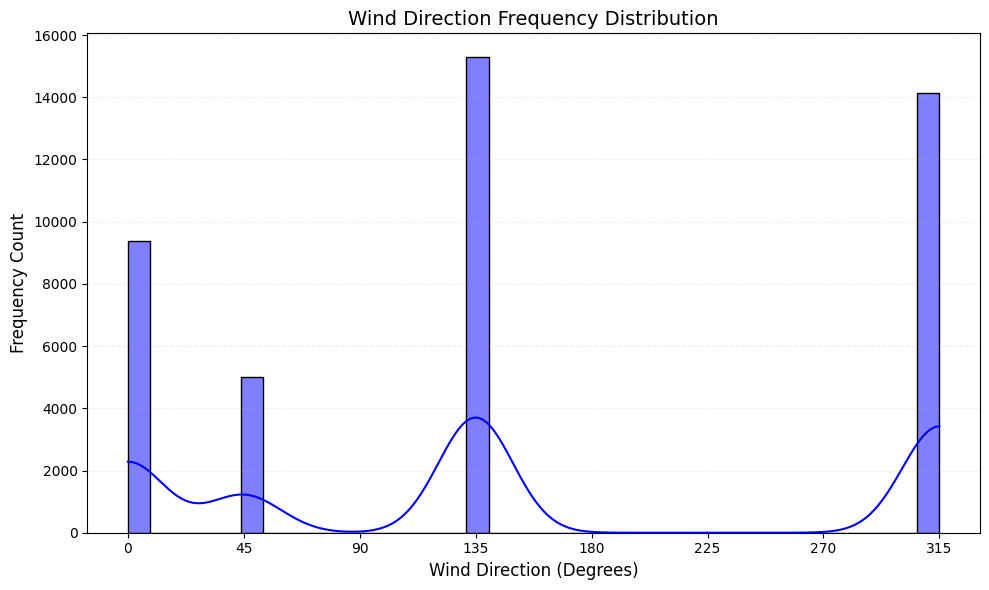

In [ ]:
# Plot wind direction distribution (36 bins = 10° per bin)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='WinDir_degrees', bins=36, kde=True, color="blue")

# Format plot appearance
plt.title('Wind Direction Frequency Distribution', fontsize=14)
plt.xlabel('Wind Direction (Degrees)', fontsize=12)
plt.ylabel('Frequency Count', fontsize=12)
plt.xticks(np.arange(0, 360, 45))  # Show ticks every 45°
plt.grid(axis='y', linestyle='--', alpha=0.2)  # Light horizontal grid

plt.tight_layout()
plt.show()

In [ ]:
data = data.drop(columns=[ 'WinDir_degrees'])

---
#### 🔑 **Key Insights:**

* **Conversion works:** We see four clear bars at **0 °, 45 °, 135 °, and 315 °**—the exact degree labels we gave the wind-direction categories.  
* **No extra noise:** Almost no values fall between those bars, so rounding or coding errors didn’t creep in.  
* **Same story as before:** The tallest bars (135 ° and 315 °) line up with the most common wind directions we found earlier, showing both versions of the data match.

---


##**2.5 Final Preparations: Temporal Signals, Lags & VMD shift**
---
 In this section:

- **I. Datetime-based and Additional Features**
- **II. Lag and Rolling Window Features for Time Series Forecasting**
- **III. Shifting the "Extreme_Event_VMD" — keep the model honest**


---
###**Preserving The Original Data**

Before starting the modelling section, we make a few final adjustments to finish off the Feature Engineering section and we also create a copy of the dataset that is cleaned and processed. This will ensure reproducibility and to facilitate any necessary comparisons later:


In [ ]:
data_processed = data.copy()

---
### **I. Datetime-based and Additional Features**
Extracts meaningful features from the datetime data to help models learn periodic trends and seasonal patterns:

In [ ]:
data_processed['day_of_week'] = data_processed.index.dayofweek
data_processed['day_of_year'] = data_processed.index.dayofyear
data_processed['month'] = data_processed.index.month
data_processed['hour'] = data_processed.index.hour
data_processed['is_weekend'] = (data_processed['day_of_week'] >= 5).astype(int)

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data_processed['Season'] = data_processed['month'].apply(get_season)

def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

data_processed['time_of_day'] = data_processed['hour'].apply(get_time_of_day)

print("Created temporal features: day_of_week, day_of_year, month, hour, is_weekend, Season, time_of_day")
display(data_processed[['day_of_week', 'is_weekend', 'Season', 'time_of_day']].head())

Created temporal features: day_of_week, day_of_year, month, hour, is_weekend, Season, time_of_day


day_of_week  is_weekend  Season time_of_day
datetime                                                        
2010-01-02 00:00:00            5           1  Winter       Night
2010-01-02 01:00:00            5           1  Winter       Night
2010-01-02 02:00:00            5           1  Winter       Night
2010-01-02 03:00:00            5           1  Winter       Night
2010-01-02 04:00:00            5           1  Winter       Night

---
###**II. Lag and Rolling Window Features for Time Series Forecasting**

**In time series forecasting, for environmental variables like PM₂.₅ concentration, it is crucial to account for temporal dependencies: the idea that the current time period is influenced by previous periods.**

**1. Lag Features:** These represent the PM₂.₅ value from previous time period as such: 1, 2, 3, 6, 12, 24 hours ago. Lag features help the model train on past values by introducing previous observations as new input variables.

**2. Rolling Features:** Such as rolling means and rolling standard deviations, summarize the recent history of the series, helping the model understand local trends or volatility.



In [ ]:
check_lag_col = 'pm2.5_lag1'
check_roll_col = 'pm2.5_roll24_mean'

if check_lag_col not in data_processed.columns or check_roll_col not in data_processed.columns:
    print("Creating lag and rolling window features...")

    for lag in [1, 2, 3, 6, 12, 24]:
        lag_col = f'pm2.5_lag{lag}'
        if lag_col not in data_processed.columns:
            data_processed[lag_col] = data_processed['PM2.5_filled'].shift(lag)
        else:
            print(f" - {lag_col} already exists, skipping.")

    if check_roll_col not in data_processed.columns:
        data_processed['pm2.5_roll24_mean'] = data_processed['PM2.5_filled'].rolling(24).mean()
    else:
        print(" - pm2.5_roll24_mean already exists, skipping.")

    if 'pm2.5_roll24_std' not in data_processed.columns:
        data_processed['pm2.5_roll24_std'] = data_processed['PM2.5_filled'].rolling(24).std()
    else:
        print(" - pm2.5_roll24_std already exists, skipping.")

lag_features = [col for col in data_processed.columns if 'pm2.5_lag' in col]
print("Lag Features:")

for feature in sorted(lag_features, key=lambda x: int(x.split('_lag')[1])):
  print(f" - {feature}")

rolling_features = [col for col in data_processed.columns if 'pm2.5_roll' in col]
print("\nRolling Features:")

for feature in sorted(rolling_features):
    print(f" - {feature}")

Creating lag and rolling window features...
Lag Features:
 - pm2.5_lag1
 - pm2.5_lag2
 - pm2.5_lag3
 - pm2.5_lag6
 - pm2.5_lag12
 - pm2.5_lag24

Rolling Features:
 - pm2.5_roll24_mean
 - pm2.5_roll24_std


---
#### 🔑 **Key Insights:**

- ```pm2.5_lag``` variable creates seperate columns that consider how the pollution levels were 1,2,3,6,12, and 24 hours before, to provide information about how pollution levels have evolved over time. We will test and compare their importance and use them later in our modeling stage.


- ```pm2.5_roll24_mean```variable enables the model to learn about the 24 hours trends, local fluctuations, and volatility in pollution levels.

- Together, `pm2.5_lag` and `pm2.5_roll24` window features enhance the model's ability to learn the temporal structures and dynamic behavior of PM2.5 concentrations, ultimately improving the robustness and accuracy of forecasts.

---
###**III. Shifting the "Extreme_Event_VMD" — keep the model honest**

* **What the flag is:** Our previously created “Extreme_Event_VMD" variable tags hours when PM₂.₅ jumps wildly using a true/false boolean.  
* **Why shift it:** The `Extreme_Event_VMD` flag reflects the **current** PM₂.₅ volatility, which is directly tied to the value we are trying to predict. This creates **data leakage**, where the model has access to "future" knowledge during training, leading to artificially high performance.
* **Solution:** Move the flag **one time-step into the past**. The model now sees only *yesterday’s* volatility when forecasting today, thus we preserve the real-world causality.



In [ ]:
data_processed['Extreme_Event_VMD_shift1']= data_processed['Extreme_Event_VMD'].shift(1)

###**Dropping the Original (Unshifted) VMD Flag**
Since the original Extreme_Event_VMD flag is now highly correlated with the target variable (PM₂.₅ at the same time),
keeping it would risk multicollinearity and data leakage.



In [ ]:
data_processed = data_processed.drop(columns=['Extreme_Event_VMD'])

In [ ]:
data_processed.columns

Index(['Year', 'Month', 'Day', 'Hour', 'DewP', 'Temp', 'Press', 'WinDir',
       'WindSpeed', 'HoursOfSnow', 'HoursOfRain', 'PM2.5', 'PM2.5_filled',
       'WindSpeed_Winsorized', 'Extreme_PM2.5', 'HoursOfRain_rolling',
       'HoursOfSnow_rolling', 'WinDir_lower', 'WinDir_U', 'WinDir_V',
       'day_of_week', 'day_of_year', 'month', 'hour', 'is_weekend', 'Season',
       'time_of_day', 'pm2.5_lag1', 'pm2.5_lag2', 'pm2.5_lag3', 'pm2.5_lag6',
       'pm2.5_lag12', 'pm2.5_lag24', 'pm2.5_roll24_mean', 'pm2.5_roll24_std',
       'Extreme_Event_VMD_shift1'],
      dtype='object')

---
# **3. EXPERIMENTING WITH MODELS**
---
This section contains:

- 3.1 Defining the Target Variable and Features
- 3.2 Time Series Data Splitting
- 3.3 Preprocessor Setup
- 3.4 Model Pipelines


---


In [ ]:
# Data Processing and Pipeline Tools
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Model Selection and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# Utilities
import joblib
import warnings
warnings.filterwarnings('ignore')


#### Reference for time series analysis: https://mlcourse.ai/book/topic09/topic9_part1_time_series_python.html

---
## **3.1 Defining the Target Variable and Features**
---
- Our initial step for building effective models is defining our target variable and predictor features.
- Our goal is to predict the concentration of PM₂.₅ particulate matter, which is our dependent variable.

**Sources**

- Kotenkov I. *bcdc_ds_takehome – Blockchain.com Data Scientist Take-Home (Feb 2022).* **GitHub** repository (2022).



In [ ]:
target_col = 'PM2.5_filled'

feature_cols = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow', 'HoursOfRain','WindSpeed_Winsorized', 'Extreme_PM2.5', 'HoursOfRain_rolling','HoursOfSnow_rolling', 'WinDir_U', 'WinDir_V','day_of_week', 'day_of_year', 'is_weekend','time_of_day','Season', 'pm2.5_lag1', 'pm2.5_lag2', 'pm2.5_lag3', 'pm2.5_lag6', 'pm2.5_lag12','pm2.5_lag24', 'pm2.5_roll24_mean','pm2.5_roll24_std',  'month', 'hour','Extreme_Event_VMD_shift1']

initial_feature_count = len(feature_cols)
feature_cols = [c for c in feature_cols if c in data_processed.columns and c != target_col]

if len(feature_cols) != initial_feature_count:
  print(f"\nWarning: Some intended feature columns were not found in the DataFrame or were the target column.")
  pass

X = data_processed[feature_cols]
y = data_processed[target_col]


print(f"Target variable: {target_col}")
print(f"Number of features: {len(X.columns)}")
print("Features selected:")
print(X.columns.tolist())

print("--- Shape of X and y ---")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if X.shape[0] != y.shape[0]:
    print("\nError: X and y do not have the same number of rows!")

Target variable: PM2.5_filled
Number of features: 28
Features selected:
['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow', 'HoursOfRain', 'WindSpeed_Winsorized', 'Extreme_PM2.5', 'HoursOfRain_rolling', 'HoursOfSnow_rolling', 'WinDir_U', 'WinDir_V', 'day_of_week', 'day_of_year', 'is_weekend', 'time_of_day', 'Season', 'pm2.5_lag1', 'pm2.5_lag2', 'pm2.5_lag3', 'pm2.5_lag6', 'pm2.5_lag12', 'pm2.5_lag24', 'pm2.5_roll24_mean', 'pm2.5_roll24_std', 'month', 'hour', 'Extreme_Event_VMD_shift1']
--- Shape of X and y ---
X shape: (43800, 28)
y shape: (43800,)


---
## **3.2 Time Series Data Splitting**
---

**In time series modeling, preserving chronological integrity is crucial for reliable and accurate predictions. Unlike conventional machine learning methods, random splits cannot be applied due to temporal dependencies.**

**1. Chronological Splitting:**
We partitioned the dataset sequentially into training and testing subsets based on chronological order. This approach prevents future information from accidentally influencing the model training phase. By doing so we are maintaining the integrity of our temporal data.

**2. Selection of Split Date:**
The split boundary is set at ``January 1, 2014``. This date provides a sufficiently large and recent test set. By having **a large and recent test set** we are able to evaluate seasonal patterns and trends much better. It allows us to have a robust evaluation of our model’s reliable performance.

**Source:**

- CrossValidated (Stack Exchange). *How can I generate a time series with autocorrelation at lags other than 1?* **CrossValidated Q&A** (accessed 2025).


--- Data Split --- 
Training set shape: X=(35040, 28), y=(35040,)
Test set shape: X=(8760, 28), y=(8760,)
Training period: 2010-01-02 00:00:00 to 2013-12-31 23:00:00
Test period: 2014-01-01 00:00:00 to 2014-12-31 23:00:00


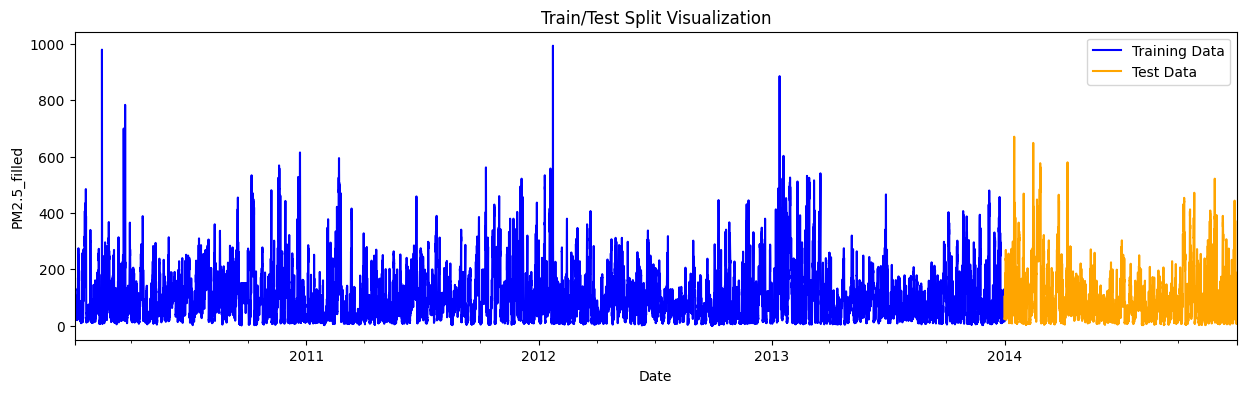

In [ ]:
split_date = '2014-01-01'

X_train = X[X.index < split_date]
y_train = y[y.index < split_date]
X_test = X[X.index >= split_date]
y_test = y[y.index >= split_date]

print("--- Data Split --- ")
print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test set shape: X={X_test.shape}, y={y_test.shape}")
print(f"Training period: {X_train.index.min()} to {X_train.index.max()}")
print(f"Test period: {X_test.index.min()} to {X_test.index.max()}")

plt.figure(figsize=(15, 4))
y_train.plot(label='Training Data', color='blue')
y_test.plot(label='Test Data', color='orange')
plt.title('Train/Test Split Visualization')
plt.xlabel('Date')
plt.ylabel(target)
plt.legend()
plt.show()

---
## **3.3 Preprocessing Setup**
---
- In this section we set up a **data preprocessing pipeline** to prepare our data for analysis. This pipeline applies specific transformations to each column, using a **ColumnTransformer** to ensure each type of data is processed appropriately for accurate model interpretation.


**Source**

1. nnjjpp. *Pipelines for Preprocessing: A Tutorial.* **Kaggle** notebook (2025).

As part of the preprocessing we also deal with missing values we have generated when Lagging, Rolling, and Shifting features in the feature engineering section.

In [ ]:
missing_counts = X_train.isnull().sum()
print("Missing values in X_train:")
print(missing_counts[missing_counts > 0])

Missing values in X_train:
pm2.5_lag1                   1
pm2.5_lag2                   2
pm2.5_lag3                   3
pm2.5_lag6                   6
pm2.5_lag12                 12
pm2.5_lag24                 24
pm2.5_roll24_mean           23
pm2.5_roll24_std            23
Extreme_Event_VMD_shift1     1
dtype: int64


- Our preprocessor acts as the smart kitchen and ColumnTransformer applies StandardScaling for every number, and applies One-Hot-Encoding for every label data.
- As a result, we will have a neat numeric table where the model handles apples with apples.

In [ ]:
# Identify feature types from training data
all_feature_cols_train = X_train.columns.tolist()

numerical_cols_train = X_train.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
categorical_cols_train = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical columns identified in X_train:", numerical_cols_train)
print("Categorical columns identified in X_train:", categorical_cols_train)

# Numerical feature pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical feature pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combined preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols_train),
        ('cat', categorical_transformer, categorical_cols_train)
    ],
    remainder='drop' # Drop unspecified columns
)

print("Preprocessor defined:")
print(preprocessor)

Numerical columns identified in X_train: ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow', 'HoursOfRain', 'WindSpeed_Winsorized', 'HoursOfRain_rolling', 'HoursOfSnow_rolling', 'WinDir_U', 'WinDir_V', 'day_of_week', 'day_of_year', 'is_weekend', 'pm2.5_lag1', 'pm2.5_lag2', 'pm2.5_lag3', 'pm2.5_lag6', 'pm2.5_lag12', 'pm2.5_lag24', 'pm2.5_roll24_mean', 'pm2.5_roll24_std', 'month', 'hour']
Categorical columns identified in X_train: ['Extreme_PM2.5', 'time_of_day', 'Season', 'Extreme_Event_VMD_shift1']
Preprocessor defined:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['DewP', 'Temp', 'Press', 'WindSpeed',
                                  'HoursOfSnow', 'HoursOfRain',
                                  'WindSpeed_Winsorized', 'HoursOfRai

---
####**Explanation:**
* **Numerical Features:** We are applying a standard scaling method to normalize the numerical features. This is a necessary step for model convergence and improving stability of our predictions.
* **Categorical Features:** We are encoding the categorical features to change them into numerical representations.This way the categorical features will be included in model training.

* The preprocessing pipeline learns transformations from the training dataset and applies these learned parameters to the test dataset. We are then able to create an unbiased model evaluation and preserve the temporality of the data and prevent data leakage.

---
## **3.4 Model Pipelines**
---
In this section, we combine our preprocessing steps from 3.3 and use them to create individual pipelines for each predictive model;

- preprocessor → **RandomFores**
- preprocessor → **XGBoost**
- preprocessor → **SVR**
- preprocessor → **KNN**

In [ ]:
# Initialize regression models with parallel processing
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])

xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

svr_model = SVR()
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', svr_model)
])

knn_model = KNeighborsRegressor(n_jobs=-1)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', knn_model)
])

pipelines = {
    'RandomForest': rf_pipeline,
    'XGBoost': xgb_pipeline,
    'SVR': svr_pipeline,
    'KNN': knn_pipeline
}

print("Model pipelines created:")
for name, pipe in pipelines.items():
    print(f" - {name}")

Model pipelines created:
 - RandomForest
 - XGBoost
 - SVR
 - KNN


---
## **3.5 Hyperparameter Tuning**
---
**Hyperparameter tuning in time series analysis** involves optimizing model parameters to improve forecasting accuracy.

In time series, the challenge is predicting future values without knowing the actual outcomes until they occur.

To address this, we used historical data for tuning, tweaking hyperparameters to increase predictive accuracy. We employed `GridSearchCV` and `TimeSeriesSplit`, tailored for temporal data to ensure robust model performance.

**Sources**

- Scikit-learn Developers. *Grid Search and Randomized Search (Model Selection).* **scikit-learn documentation** (accessed 2025).  
- Scikit-learn Developers. *sklearn.model_selection.TimeSeriesSplit.* **scikit-learn documentation** (accessed 2025).  
- DataScience Stack Exchange. *Time-series hyper-parameter tuning.* **DataScience SE Q&A** (accessed 2025).


In [ ]:
tscv = TimeSeriesSplit(n_splits=3)

import time
param_grids = {
    'RandomForest': {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [10, 20, None],
        'regressor__min_samples_split': [2, 5]
    },
    'XGBoost': {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.05, 0.1],
        'regressor__max_depth': [3, 5]
    },
    'SVR': {
        'regressor__C': [0.1, 1],
        'regressor__gamma': ['scale', 'auto'],
        'regressor__kernel': ['rbf']
    },
    'KNN': {
        'regressor__n_neighbors': [5, 10, 15],
        'regressor__weights': ['uniform', 'distance']
    }
}

best_models = {}

for name, pipeline in pipelines.items():
    print(f"Tuning {name}...")
    start_time = time.time()

    if name in param_grids:
        grid_search = GridSearchCV(pipeline,
                                   param_grid=param_grids[name],
                                   cv=tscv,
                                   scoring='neg_mean_absolute_error',
                                   n_jobs=-1,
                                   verbose=1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_

        end_time = time.time()
        print(f"Best {name} MAE: {-grid_search.best_score_:.4f}")
        print(f"Best {name} params: {grid_search.best_params_}")
        print(f"Tuning time for {name}: {end_time - start_time:.2f} seconds")
    else:
        print(f"No parameter grid defined for {name}. Skipping tuning.")
        pipeline.fit(X_train, y_train)
        best_models[name] = pipeline

print("Hyperparameter tuning complete.")

Tuning RandomForest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best RandomForest MAE: 12.6984
Best RandomForest params: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Tuning time for RandomForest: 1024.84 seconds
Tuning XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best XGBoost MAE: 12.5875
Best XGBoost params: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Tuning time for XGBoost: 14.36 seconds
Tuning SVR...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best SVR MAE: 19.7765
Best SVR params: {'regressor__C': 1, 'regressor__gamma': 'auto', 'regressor__kernel': 'rbf'}
Tuning time for SVR: 497.80 seconds
Tuning KNN...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best KNN MAE: 24.0409
Best KNN params: {'regressor__n_neighbors': 15, 'regressor__weights': 'distance'}
Tuning time for KNN: 24.45 seconds
Hyperparameter tuning

---
* The grid search provided by `GridSearchCV` exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. For instance, we utilized a search through a predefined set of hyperparameters for each model (Random Forest, XGBoost, SVR, and KNN). This approach allows us to have the optimal parameter which minimizes the Mean Absolute Error (MAE).

* To respect the sequential nature of time series data and avoid data leakage, we implemented `TimeSeriesSplit`. This cross-validation strategy helps with training splits to precede validation splits chronologically, using data prior to January 1, 2014, for training, and following observations for validation.

---
## **3.6 Model Evaluations**
---
We evaluated each of our tuned model **Random Forest**, **XGBoost**, **SVR**, and **KNN** against the test dataset (`X_test`, `y_test`) to have an unbiased estimate on future, unseen data.

We employed the standard metrics to evaluate our models performance:

* **Mean Absolute Error (MAE):** Quantifies average prediction error magnitude, irrespective of direction.
* **Mean Squared Error (MSE):** Emphasizes larger errors by squaring deviations, penalizing substantial mispredictions.
* **Root Mean Squared Error (RMSE):** Provides error magnitude in the original units, facilitating interpretability.
* **Coefficient of Determination (R²):** Indicates the proportion of variance explained by the model, reflecting how well the model captures underlying data patterns.

Systematic evaluation of machine learning models is super important for accurately predicting their future performance and having reliable and well interpretable predictions.

In [ ]:
# Initialize dictionary to store evaluation metrics
evaluation_results = {}

print("Evaluating models on the test set...")

# Evaluate each model in the best_models dictionary
for name, model in best_models.items():
    print(f"Evaluating {name}...")
    start_time = time.time()

    # Generate predictions and calculate metrics
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared score

    # Store metrics for current model
    evaluation_results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    end_time = time.time()
    print(f"Evaluation time for {name}: {end_time - start_time:.2f} seconds")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(evaluation_results).T

print("--- Model Evaluation Summary (Sorted by MAE) ---")
display(results_df)  # Show the results table

Evaluating models on the test set...
Evaluating RandomForest...
Evaluation time for RandomForest: 0.15 seconds
Evaluating XGBoost...
Evaluation time for XGBoost: 0.10 seconds
Evaluating SVR...
Evaluation time for SVR: 21.12 seconds
Evaluating KNN...
Evaluation time for KNN: 1.86 seconds
--- Model Evaluation Summary (Sorted by MAE) ---


MAE          MSE       RMSE        R2
RandomForest  11.763867   461.693612  21.487057  0.947060
XGBoost       11.540870   436.734335  20.898190  0.949922
SVR           15.196855  1013.092583  31.829115  0.883834
KNN           20.914984   988.964416  31.447805  0.886601

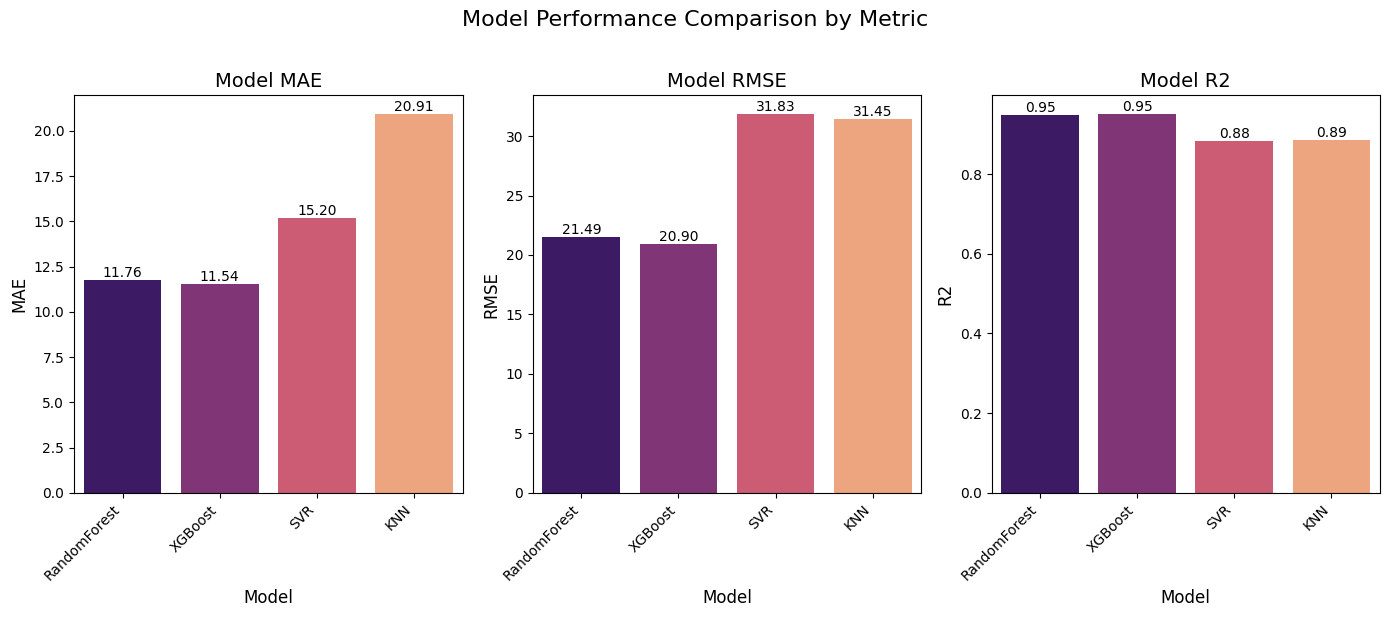

In [ ]:
# Plot evaluation metrics as bar plots
metrics = ['MAE', 'RMSE', 'R2']

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

# Define a color palette
model_colors = sns.color_palette("magma", len(results_df.index))

for i, metric in enumerate(metrics):
    # Create a bar plot for the current metric
    sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i], palette=model_colors)

    # Format plot
    axes[i].set_title(f'Model {metric}', fontsize=14)
    axes[i].set_xlabel('Model', fontsize=12)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

    # Add value labels on top of the bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f', label_type='edge')

# Title for the entire figure
fig.suptitle('Model Performance Comparison by Metric', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**

1. **RandomForest**

   * Lowest MAE and RMSE while matching XGBoost’s excellent R² (0.95).
   * Indicates slightly better average and worst-case error, with the same overall explanatory power.

2. **XGBoost**

   * Only \~0.2 µg/m³ behind on MAE and \~0.6 µg/m³ on RMSE—differences that may be negligible depending on project tolerance.
   * Ensemble’s robustness still makes it an attractive baseline.

3. **SVR and KNN**

   * Both have substantially higher errors (≈40–80 % worse MAE than top models).
   * R² values show they explain less variance, especially SVR (0.88).

4. **Overall ranking**

   1. **RandomForest** model best all-round metrics.
   2. **XGBoost** practically tied, simpler to tune.
   3. **KNN** marginally beats SVR on R² but still high error.
   4. **SVR** highest RMSE, lowest R².

We will be deploying **Random Forest** as our primary model as it has the lowest MAE and RMSE metric performance. However, we will still be deploying XGBoost, SVR & KNN models in our pipelines for testing them out for future weather and time modelling whether their scores improve or not.


---
## **3.7 Actual vs. Prediction Visualization**
---
* We visualized the predictions made by the best-performing model, **RandomForest**. It selects the model with the lowest Mean Absolute Error from the evaluation results and plots its predicted target values against the actual measured values over a sample period of 30 days from the test dataset.

* The visual evaluations complement numerical metrics to display the model's strengths and areas for improvement.

* In first glance, it might seem like an overfit however, after conducting the weather and time only modelling, we can see that the `pm2.5_lag`, `pm2.5_roll` features are actually exploiting the relationship of the target variable and taking a shortcut instead of focusing on the other weather variables.

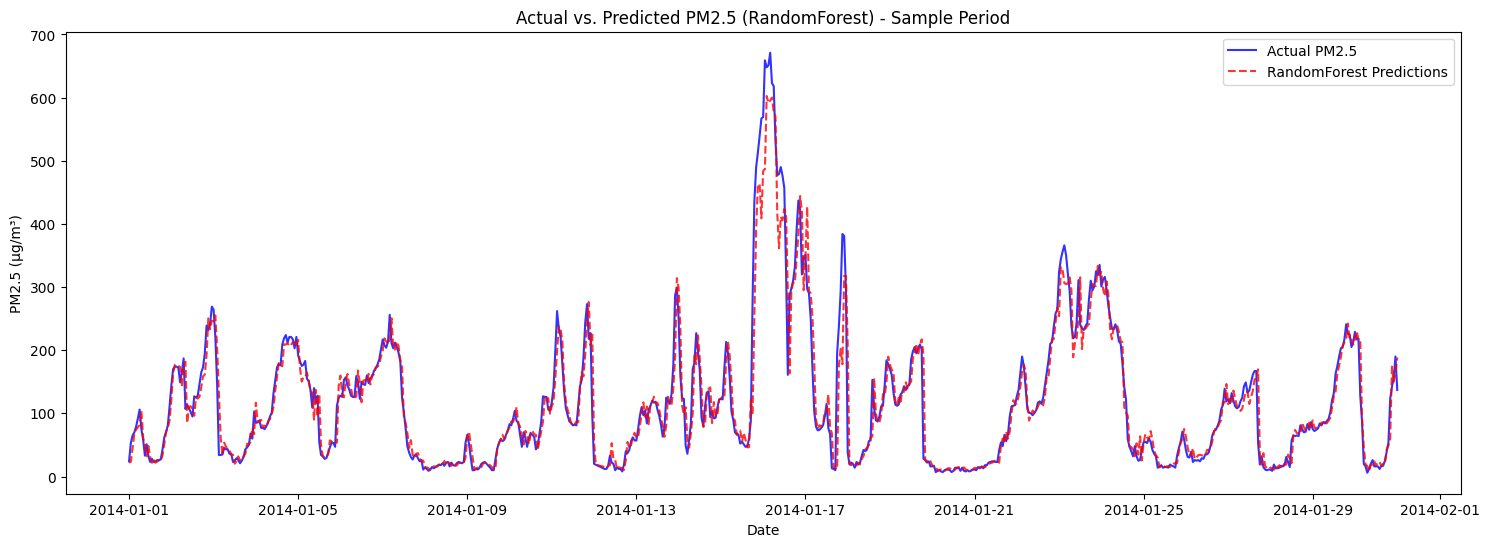

In [ ]:
# Get top-performing model name from results dataframe
best_model_name = results_df.index[0]
best_model_pipeline = best_models[best_model_name]

# Generate predictions on test set
y_pred_best = best_model_pipeline.predict(X_test)

# Set 30-day visualization window
sample_start = X_test.index.min()
sample_end = sample_start + pd.Timedelta(days=30)

# Slice actual and predicted values for visualization period
y_test_sample = y_test[sample_start:sample_end]
y_pred_sample = pd.Series(y_pred_best, index=X_test.index)[sample_start:sample_end]

# Create comparison plot
plt.figure(figsize=(18, 6))
plt.plot(y_test_sample.index, y_test_sample, label='Actual PM2.5', color='blue', alpha=0.8)
plt.plot(y_pred_sample.index, y_pred_sample, label=f'{best_model_name} Predictions', color='red', linestyle='--', alpha=0.8)

plt.title(f'Actual vs. Predicted PM2.5 ({best_model_name}) - Sample Period')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.show()

---
## **3.8 Feature Importances**
---
* Lastly, we analyzed feature importance after model evaluation for understanding the underlying drivers of predictions, and  areas for improvement in the forecasting process.

* We extracted feature names from the fitted preprocessing pipeline of the **RandomForest** model as post-evaluation. We retrieved the corresponding feature importance values from the trained **RandomForest** model, quantifying the relative contribution of each feature to prediction accuracy. Then we visualized the top 10 most influential features that influence our model predictions.

* We visualized the top 10 most influential features using a log scale to display their relationships and relative importance for our models.

---

**Source**

- mlcourse.ai. *Gradient Boosting.* **mlcourse.ai** tutorial (accessed 2025).


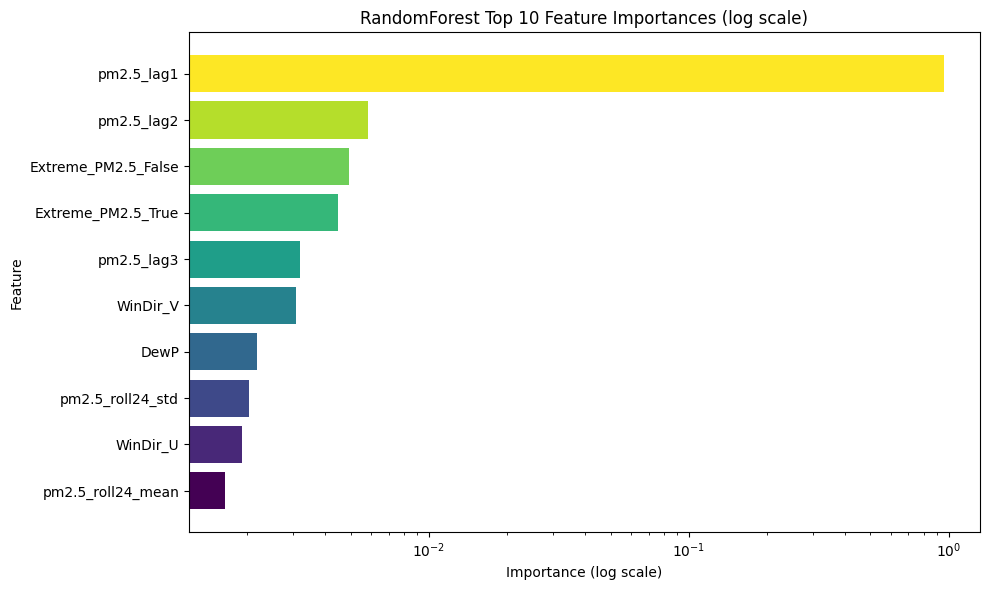

In [ ]:
model_name = 'RandomForest'
top_n_features = 10

fitted_preprocessor = best_model_pipeline.named_steps['preprocessor']
features_after_preprocessing = fitted_preprocessor.get_feature_names_out(input_features=X_train.columns)
xgb_model_trained = best_model_pipeline.named_steps['regressor']
importances = xgb_model_trained.feature_importances_

if len(features_after_preprocessing) != len(importances):
    print(f"Error: The number of feature names ({len(features_after_preprocessing)}) does not match the number of importances ({len(importances)}).")
else:
    cleaned_feature_names = []
    for name in features_after_preprocessing:
        if name.startswith('remainder__'):
             name = name[len('remainder__'):]
        elif name.startswith('cat__'):
             name = name[len('cat__'):]
        elif name.startswith('num__'):
             name = name[len('num__'):]


        cleaned_feature_names.append(name)

    feature_importance_df = pd.DataFrame({
        'Feature': cleaned_feature_names,
        'Importance': importances
    })

    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    top_features_df = feature_importance_df.head(top_n_features)
    model_name = 'RandomForest'
top_n_features = 10

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(top_features_df['Feature'][::-1],
        top_features_df['Importance'][::-1],
        color=plt.cm.viridis(np.linspace(0,1,len(top_features_df))))
ax.set_xscale('log')
ax.set_title(f'{model_name} Top {top_n_features} Feature Importances (log scale)')
ax.set_xlabel('Importance (log scale)')
ax.set_ylabel('Feature')
plt.tight_layout()
plt.show()

---
## **3.9 Feature Importance Interpretation**
---
* Feature importance is a crucial concept in machine learning, particularly in tree-based models. It refers to techniques that assign a score to input features based on their usefulness in predicting a target variable.

---

| Rank | Feature               | Why it dominates                                                                                       |
| ---- | --------------------- | ------------------------------------------------------------------------------------------------------ |
| 1    | `pm2.5_lag1`          | Yesterday’s air still hangs around— the last-hour reading is the single best clue about the next hour. |
| 2    | `pm2.5_lag2`          | Adds historical context—while not as immediate as lag1, still relevant in capturing short-term trends. |
| 3    | `Extreme_PM2.5_False` | Indicates stable air quality; helps model avoid false alarms when pollution hasn't spiked recently.    |
| 4    | `Extreme_PM2.5_True`  | Highlights known spikes in pollution—reinforces caution when forecasting next steps.                   |
| 5    | `pm2.5_lag3`          | Influence fades with time, but still provides context from earlier fluctuations.                       |
| 6    | `WinDir_V`            | North-south wind vector—captures directional dispersion of pollution plumes.                           |
| 7    | `DewP`                | Dew point correlates with humidity; more moisture often means greater particle suspension.             |
| 8    | `pm2.5_roll24_std`    | Captures the volatility of pollution levels over the last day—a proxy for trend predictability.        |
| 9    | `WinDir_U`            | East-west wind vector—complements `WinDir_V` for full 2D wind pattern impact.                          |
| 10   | `pm2.5_roll24_mean`   | Averages out noise in hourly readings, providing a smoothed pollution trend baseline.                  |

---
# **4. WEATHER & TIME MODELING**
---

In this section we reconstruct our modeling process from previous section but now purely using **meteorological signals** such as temperature, humidity, wind, pressure, etc. leaving out the lag, rolling-window, and VMD-volatility features we engineered in §3.

* **Goal:** build and evaluate the same four models (RF, XGB, SVR, KNN) on weather-only inputs to see **how far ecology-only can take us.**  
* **Takeaway:**  
  * Which weather variables standout most as predictors.  
  * A clean performance baseline for later comparison.  

**The steps taken in this section and their explanations more or less mirror section 3**

In [ ]:
target_col_interp = 'PM2.5_filled'

all_potential_features = [
    'DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow', 'HoursOfRain',
    'WindSpeed_Winsorized', 'Extreme_PM2.5', 'HoursOfRain_rolling',
    'HoursOfSnow_rolling', 'WinDir_U', 'WinDir_V','day_of_week',
    'day_of_year', 'is_weekend','time_of_day','Season', 'pm2.5_lag1',
    'pm2.5_lag2', 'pm2.5_lag3','pm2.5_lag6', 'pm2.5_lag12', 'pm2.5_lag24',
    'pm2.5_roll24_mean','pm2.5_roll24_std', 'month', 'hour',
    'Extreme_Event_VMD_shift1'
]

features_to_remove_for_interpretation = [
    'Extreme_PM2.5',
    'Extreme_Event_VMD_shift1',
    'pm2.5_lag1',
    'pm2.5_lag2',
    'pm2.5_lag3',
    'pm2.5_lag12',
    'pm2.5_lag6',
    'pm2.5_lag24',
    'pm2.5_roll24_mean',
    'pm2.5_roll24_std'
]

feature_cols_interp = [col for col in all_potential_features if col not in features_to_remove_for_interpretation]
initial_feature_count_after_filter = len(feature_cols_interp)
feature_cols_interp = [c for c in feature_cols_interp if c in data_processed.columns and c != target_col_interp]

if len(feature_cols_interp) != initial_feature_count_after_filter:
    print(f"\nWarning: Some intended feature columns (after filtering) were not found in the DataFrame or were the target column.")
    removed_in_check = set(all_potential_features) - set(features_to_remove_for_interpretation) - set(feature_cols_interp)
    if removed_in_check:
        print(f"Columns that were part of the filtered list but are not in data_processed.columns: {list(removed_in_check)}")
    pass


X = data_processed[feature_cols_interp]
y = data_processed[target_col_interp]

print(f"\nTarget variable: {target_col_interp}")
print(f"Number of features selected for modeling: {len(X.columns)}")
print("Final features selected for modeling:")
print(X.columns.tolist())

print("\n--- Shape of X and y ---")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if X.shape[0] != y.shape[0]:
    print("\nError: X and y do not have the same number of rows!")


Target variable: PM2.5_filled
Number of features selected for modeling: 18
Final features selected for modeling:
['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow', 'HoursOfRain', 'WindSpeed_Winsorized', 'HoursOfRain_rolling', 'HoursOfSnow_rolling', 'WinDir_U', 'WinDir_V', 'day_of_week', 'day_of_year', 'is_weekend', 'time_of_day', 'Season', 'month', 'hour']

--- Shape of X and y ---
X shape: (43800, 18)
y shape: (43800,)


---
## **4.2 Time Series Data Splitting**
---

In [ ]:
split_date = '2014-01-01'

if pd.Timestamp(split_date) <= X.index.min() or pd.Timestamp(split_date) >= X.index.max():
    print(f"\nWarning: split_date '{split_date}' is at the edge or outside the data range ({X.index.min()} to {X.index.max()}).")
    split_point = int(len(X) * 0.75)
    if split_point > 0 and split_point < len(X):
        split_date = X.index[split_point].strftime('%Y-%m-%d')
        print(f"Adjusted split_date to: {split_date} for demonstration.")
    else:
        print(f"Cannot automatically adjust split_date. Data length: {len(X)}. Please check your data and split_date.")
        if len(X) > 1:
             split_date = X.index[len(X)//2].strftime('%Y-%m-%d')
             print(f"Fallback split_date to midpoint: {split_date}")
        else:
            print("Error: Data is too short to split. Exiting.")
            exit()

X_train_interp = X[X.index < split_date]
y_train_interp = y[y.index < split_date]
X_test_interp = X[X.index >= split_date]
y_test_interp = y[y.index >= split_date]

if X_train_interp.empty or X_test_interp.empty:
    print("\nError: Training or test set is empty after split. This often means the split_date is outside the data range or data is too small.")
    print(f"Data range: {X.index.min()} to {X.index.max()}, Split_date: {split_date}")
else:
    print("\n--- Data Split --- ")
    print(f"Training set shape: X={X_train_interp.shape}, y={y_train_interp.shape}")
    print(f"Test set shape: X={X_test_interp.shape}, y={y_test_interp.shape}")
    print(f"Training period: {X_train_interp.index.min()} to {X_train_interp.index.max()}")
    print(f"Test period: {X_test_interp.index.min()} to {X_test_interp.index.max()}")


--- Data Split --- 
Training set shape: X=(35040, 18), y=(35040,)
Test set shape: X=(8760, 18), y=(8760,)
Training period: 2010-01-02 00:00:00 to 2013-12-31 23:00:00
Test period: 2014-01-01 00:00:00 to 2014-12-31 23:00:00


---
## **4.3 Preprocessing for Interpretation Model**
---

In [ ]:
all_feature_cols_train_interp = X_train_interp.columns.tolist()

numerical_cols_train_interp = X_train_interp.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
categorical_cols_train_interp = X_train_interp.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical columns identified in X_train_interp:", numerical_cols_train_interp)
print("Categorical columns identified in X_train_interp:", categorical_cols_train_interp)

numerical_transformer_interp = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_interp = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_interp = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_interp, numerical_cols_train_interp),
        ('cat', categorical_transformer_interp, categorical_cols_train_interp)
    ],
    remainder='drop'
)

print("Preprocessor defined:")
print(preprocessor_interp)

Numerical columns identified in X_train_interp: ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow', 'HoursOfRain', 'WindSpeed_Winsorized', 'HoursOfRain_rolling', 'HoursOfSnow_rolling', 'WinDir_U', 'WinDir_V', 'day_of_week', 'day_of_year', 'is_weekend', 'month', 'hour']
Categorical columns identified in X_train_interp: ['time_of_day', 'Season']
Preprocessor defined:
ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['DewP', 'Temp', 'Press', 'WindSpeed',
                                  'HoursOfSnow', 'HoursOfRain',
                                  'WindSpeed_Winsorized', 'HoursOfRain_rolling',
                                  'HoursOfSnow_rolling', 'WinDir_U', 'WinDir_V',
                                  'day_of_week', 'day_of_year', '

---
## **4.4 Pipeline Creation and Model Fitting**
---
* In this step, we combined our preprocessing steps and constructed individual pipelines for each predictive model; **Random Forest**, **XGBoost**, **Support Vector Regression (SVR)**, and **K-Nearest Neighbors (KNN)**. We combine preprocessing steps with model fitting into a seamless workflow.

* Within each pipeline, raw data initially undergoes preprocessing, including scaling and encoding transformations. The processed data is then passed to the corresponding regressor for training.

In [ ]:
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_interp),
    ('regressor', rf_model)
])

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_interp),
    ('regressor', xgb_model)
])

svr_model = SVR()
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_interp),
    ('regressor', svr_model)
])

knn_model = KNeighborsRegressor(n_jobs=-1)
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_interp),
    ('regressor', knn_model)
])

pipelines_interp = {
    'RandomForest': rf_pipeline,
    'XGBoost': xgb_pipeline,
    'SVR': svr_pipeline,
    'KNN': knn_pipeline
}

print("\nModel pipelines interp created:")
for name, pipe_obj in pipelines_interp.items():
    print(f" - {name}")


Model pipelines interp created:
 - RandomForest
 - XGBoost
 - SVR
 - KNN


---
## **4.5 Hyperparameter Tuning for Interpretation Models**
---

In [ ]:
import time

tscv = TimeSeriesSplit(n_splits=3)


param_grids = {
    'RandomForest': {
        'regressor__n_estimators': [100, 150],
        'regressor__max_depth': [10, 20, None],
        'regressor__min_samples_split': [2, 5]
    },
    'XGBoost': {
        'regressor__n_estimators': [100, 150],
        'regressor__learning_rate': [0.05, 0.1],
        'regressor__max_depth': [3, 5]
    },
    'SVR': {
        'regressor__C': [0.1, 1, 5],
        'regressor__gamma': ['scale', 'auto'],
        'regressor__kernel': ['rbf']
    },
    'KNN': {
        'regressor__n_neighbors': [5, 10, 15],
        'regressor__weights': ['uniform', 'distance']
    }
}

best_models = {}

for name, pipeline in pipelines_interp.items():
    print(f"Tuning {name}...")
    start_time = time.time()

    if name in param_grids:
        grid_search = GridSearchCV(pipeline,
                                   param_grid=param_grids[name],
                                   cv=tscv,
                                   scoring='neg_mean_absolute_error',
                                   n_jobs=-1,
                                   verbose=1)
        grid_search.fit(X_train_interp, y_train_interp)
        best_models[name] = grid_search.best_estimator_

        end_time = time.time()
        print(f"Best {name} MAE: {-grid_search.best_score_:.4f}")
        print(f"Best {name} params: {grid_search.best_params_}")
        print(f"Tuning time for {name}: {end_time - start_time:.2f} seconds")
    else:
        print(f"No parameter grid defined for {name}. Skipping tuning.")
        pipeline.fit(X_train_interp, y_train_interp)
        best_models[name] = pipeline

print("Hyperparameter tuning complete.")

Tuning RandomForest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best RandomForest MAE: 49.7813
Best RandomForest params: {'regressor__max_depth': 20, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Tuning time for RandomForest: 439.82 seconds
Tuning XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best XGBoost MAE: 47.3006
Best XGBoost params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 100}
Tuning time for XGBoost: 7.15 seconds
Tuning SVR...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best SVR MAE: 48.9796
Best SVR params: {'regressor__C': 5, 'regressor__gamma': 'scale', 'regressor__kernel': 'rbf'}
Tuning time for SVR: 517.50 seconds
Tuning KNN...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best KNN MAE: 57.1422
Best KNN params: {'regressor__n_neighbors': 15, 'regressor__weights': 'uniform'}
Tuning time for KNN: 15.40 seconds
Hyperparameter tuning co

---
## **4.6 Model Evaluations**
---


In [ ]:
evaluation_results_interp = {}
print("Evaluating models on the test set...")

for name, model in best_models.items():
    print(f"Evaluating {name}...")
    start_time = time.time()

    y_pred = model.predict(X_test_interp)
    mae = mean_absolute_error(y_test_interp, y_pred)
    mse = mean_squared_error(y_test_interp, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_interp, y_pred)

    evaluation_results_interp[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    end_time = time.time()
    print(f"Evaluation time for {name}: {end_time - start_time:.2f} seconds")

results_df_interp = pd.DataFrame(evaluation_results_interp).T
results_df_interp = results_df_interp.sort_values(by='MAE')

print("--- Model Evaluation Summary (Sorted by MAE) ---")
display(results_df_interp)

Evaluating models on the test set...
Evaluating RandomForest...
Evaluation time for RandomForest: 0.12 seconds
Evaluating XGBoost...
Evaluation time for XGBoost: 0.03 seconds
Evaluating SVR...
Evaluation time for SVR: 18.47 seconds
Evaluating KNN...
Evaluation time for KNN: 1.63 seconds
--- Model Evaluation Summary (Sorted by MAE) ---


MAE          MSE       RMSE        R2
RandomForest  43.847974  4111.904567  64.124134  0.528509
XGBoost       44.500458  4036.251287  63.531498  0.537184
SVR           47.572950  5457.574878  73.875401  0.374208
KNN           52.125811  4998.428743  70.699567  0.426856

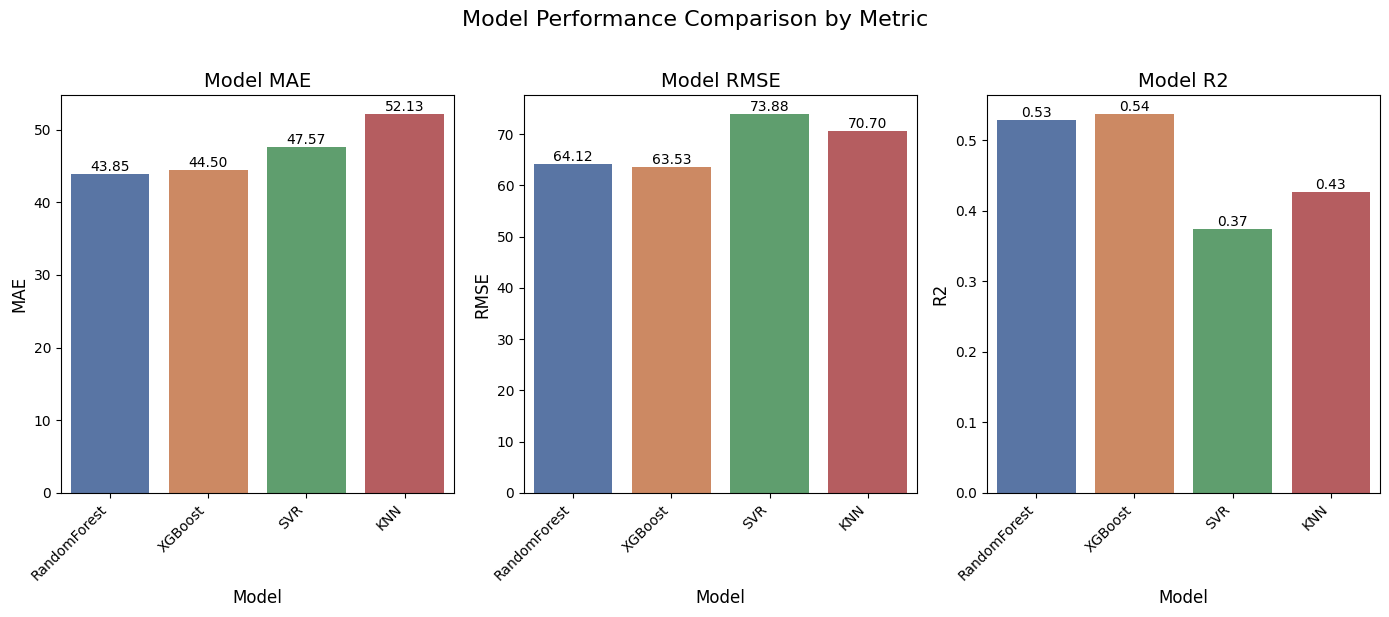

In [ ]:
# Plot evaluation metrics as bar plots in a single chart with distinctive colors for each model
metrics = ['MAE', 'RMSE', 'R2']

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

# Define a color palette with enough colors for all models
model_colors = sns.color_palette("deep", len(results_df_interp.index))

for i, metric in enumerate(metrics):
    # Create a bar plot for the current metric using results_df_interp
    sns.barplot(x=results_df_interp.index, y=results_df_interp[metric], ax=axes[i], palette=model_colors)

    # Format plot
    axes[i].set_title(f'Model {metric}', fontsize=14)
    axes[i].set_xlabel('Model', fontsize=12)
    axes[i].set_ylabel(metric, fontsize=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

    # Add value labels on top of the bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.2f', label_type='edge')

# Title for the entire figure
fig.suptitle('Model Performance Comparison by Metric', fontsize=16, y=1.02)

plt.tight_layout()
plt.show()

---

#### 🔑 **Key Insights:**

* Without the feature engineered lag and rolling features of our target variable, we can see that the R² of the best model is ~0.54 meaning that even the top models explain just over half of the observed PM₂.₅ variation when using only weather and temporal cues.

* As can be seen Random Forest edges out on RMSE and R² which shows us that it is slightly better handling of large errors and overall variance. However, the gap is tiny between XGBoost so the two are effectively neck-and-neck.

* **Suggestion for the future:** To enhance the model's performance metrics, particularly when relying solely on weather and time features, we can consider incorporating additional data. As such traffic volume of Beijing, satellite Aerosol Optical Depth and encoding seasonal and holiday flags can help with improving the models performance.


---
## **4.7 Visualizing predictions for the weather variables' best model**
---
* Figure shows that the weather variables tracks the general PM₂.₅ tendency but overall underestimates severe haze episodes and overestimates moderate pollution in clean periods.

* The `pm2.5_lag`, `pm2.5_roll` and extreme PM₂.₅ values are able to explain the short-term occurances very well; whereas wind and weather features are able to explain the long term effects more systematically.

* The lack of short-term persistence features leads to mild peaks and troughs, raising MAE by ~20 µg m⁻³ relative to the lag-containing model. Incorporating minimal lags or engineered proxies such as 2 hour or 3 hours rolling mean woul improve constancy and interpretability significantly.

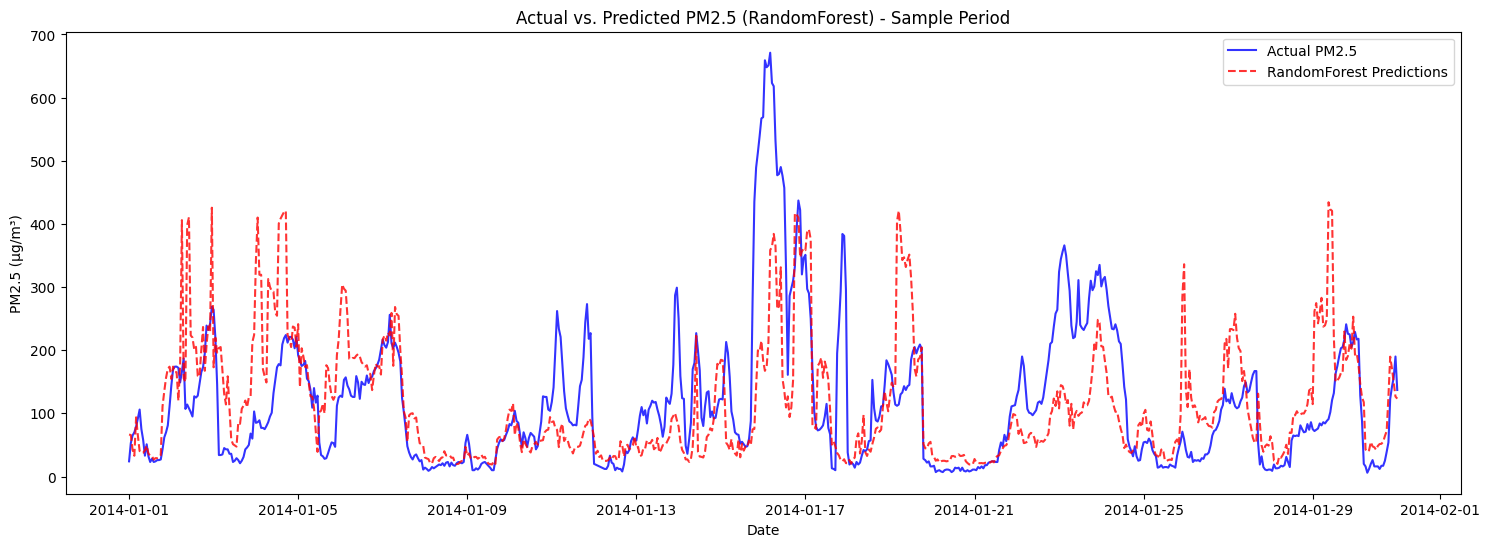

In [ ]:
# Get the name of the best performing model from results dataframe
best_model_name_interp = results_df.index[0]
best_model_name_pipeline_interp = best_models[best_model_name_interp]

# Generate predictions using the best model
y_pred_best = best_model_name_pipeline_interp.predict(X_test_interp)

# Define a 30-day sample period for visualization
sample_start = X_test_interp.index.min()
sample_end = sample_start + pd.Timedelta(days=30)

# Extract test data and predictions for the sample period
y_test_interp_sample = y_test_interp[sample_start:sample_end]
y_pred_sample = pd.Series(y_pred_best, index=X_test_interp.index)[sample_start:sample_end]

# Plot actual vs predicted values for the sample period
plt.figure(figsize=(18, 6))
plt.plot(y_test_interp_sample.index, y_test_interp_sample, label='Actual PM2.5', color='blue', alpha=0.8)
plt.plot(y_pred_sample.index, y_pred_sample, label=f'{best_model_name_interp} Predictions', color='red', linestyle='--', alpha=0.8)

plt.title(f'Actual vs. Predicted PM2.5 ({best_model_name_interp}) - Sample Period')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.show()

---
## **4.8 Features importances**
---
* The horizontal bar chart indicates that without the `pm2.5_lag` and features or event-specific indicators, our model identifies dew point, seasonal indicators, wind direction, and pressure as the most informative predictors of hourly `pm2.5_lag`.

* These weather variables effectively capture the meteorological conditions under which pollution accumulates, although they are less sensitive to short-term fluctuations.

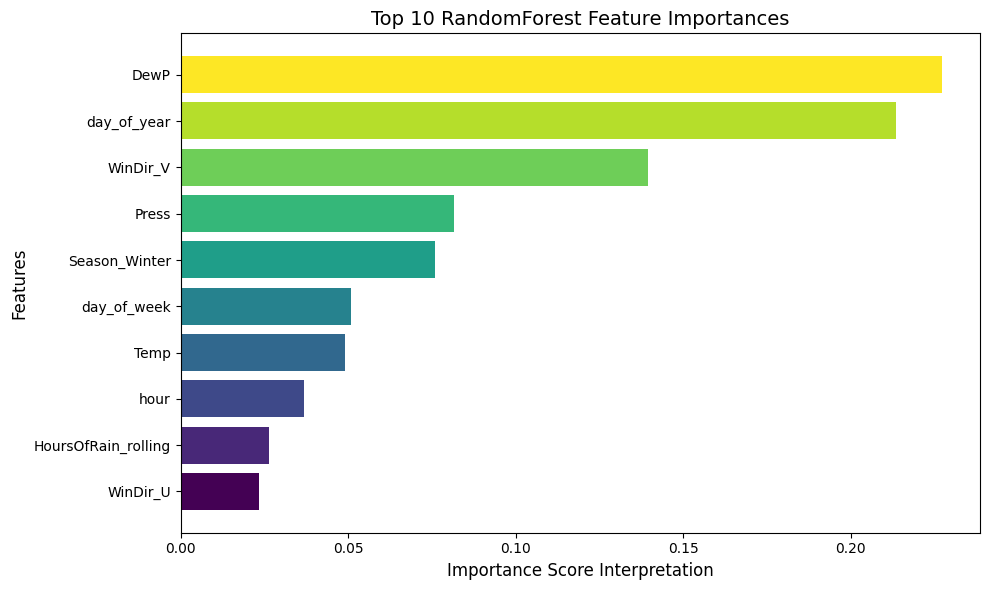

In [ ]:
model_name = 'RandomForest'
top_n_features = 10

# Extract preprocessing and model components from pipeline
preprocessor = best_model_name_pipeline_interp.named_steps['preprocessor']
model = best_model_name_pipeline_interp.named_steps['regressor']

# Get processed feature names and importance scores
feature_names = preprocessor.get_feature_names_out(input_features=X_train_interp.columns)
importances = model.feature_importances_

# Verify matching lengths
if len(feature_names) != len(importances):
    print(f"Dimension mismatch: {len(feature_names)} features vs {len(importances)} importance scores")
else:
    # Clean feature names by removing preprocessing prefixes
    clean_names = [name.split('__')[-1] for name in feature_names]

    # Create sorted importance dataframe
    importance_df_interp = pd.DataFrame({
        'Feature': clean_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False).head(top_n_features)

    # Create horizontal bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df_interp['Feature'][::-1], importance_df_interp['Importance'][::-1],
             color=plt.cm.viridis(np.linspace(0, 1, len(importance_df_interp))))

    plt.title(f'Top {top_n_features} {model_name} Feature Importances', fontsize=14)
    plt.xlabel('Importance Score Interpretation', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.show()

---
## **4.9 Two Feature Importance Comparisons**
---

Two graphs present a comparison of feature importance for two RandomForest models. The "Original" model is evaluated based on the features heavily relies on  `pm2.5_lag` and `pm2.5_roll` features, such as `pm2.5_lag1`, `pm2.5_lag2`, and `pm2.5_lag3`, and the "Interpretable" model relies on weather and time features. Both models are evaluated based on their top 10 most influential features, with importance scores displayed on a logarithmic scale.


In [ ]:
def plot_feature_importance_comparison_log(top_features_df_1, top_features_df_2, model_name, top_n_features):
    # For log scale, we need to handle the minimum value carefully
    min_importance = min(
        top_features_df_1.Importance.min(),
        top_features_df_2.Importance.min()
    )
    # Ensure minimum is positive for log scale (add small epsilon if needed)
    if min_importance <= 0:
        min_importance = 1e-5

    max_importance = max(
        top_features_df_1.Importance.max(),
        top_features_df_2.Importance.max()
    )

    # 2) Set up the figure with shared log-scale x-axis
    fig, (ax1, ax2) = plt.subplots(
        1, 2,
        figsize=(18, 6),
        sharey=False  # We don't want to share y-axis as features might differ
    )

    # 3) Plot panel 1 with log scale
    bars1 = ax1.barh(
        top_features_df_1['Feature'][::-1],
        top_features_df_1['Importance'][::-1],
        color=plt.cm.viridis(np.linspace(0, 1, len(top_features_df_1)))
    )
    ax1.set_title(f'{model_name} – Original\nTop {top_n_features} Features',
                 fontsize=10, fontweight='bold')
    ax1.set_xlabel('Importance Score (log scale)')
    ax1.set_ylabel('Feature')
    ax1.set_xscale('log')  # Set log scale for x-axis

    # 4) Plot panel 2 with log scale
    bars2 = ax2.barh(
        top_features_df_2['Feature'][::-1],  # Changed to [::-1] for consistent ordering
        top_features_df_2['Importance'][::-1],
        color=plt.cm.plasma(np.linspace(0, 1, len(top_features_df_2)))
    )
    ax2.set_title(f'{model_name} – Interpretable\nTop {top_n_features}',
                 fontsize=10, fontweight='bold')
    ax2.set_xlabel('Importance Score (log scale)')
    ax2.set_ylabel('')
    ax2.set_xscale('log')  # Set log scale for x-axis

    # 5) Add grid lines for better readability with log scale
    ax1.grid(axis='x', linestyle='--', alpha=0.7)
    ax2.grid(axis='x', linestyle='--', alpha=0.7)

    # 6) Add value labels to the bars
    for ax, bars in [(ax1, bars1), (ax2, bars2)]:
        for bar in bars:
            width = bar.get_width()
            label_x_pos = width * 1.1  # Position slightly to the right of the bar end
            ax.text(label_x_pos, bar.get_y() + bar.get_height()/2,
                   f'{width:.4f}', va='center', fontsize=8)

    # 7) Polish up
    fig.suptitle('Feature Importance Comparison (Log Scale)', fontsize=16, fontweight='bold', y=1.03)
    plt.tight_layout()

    return fig

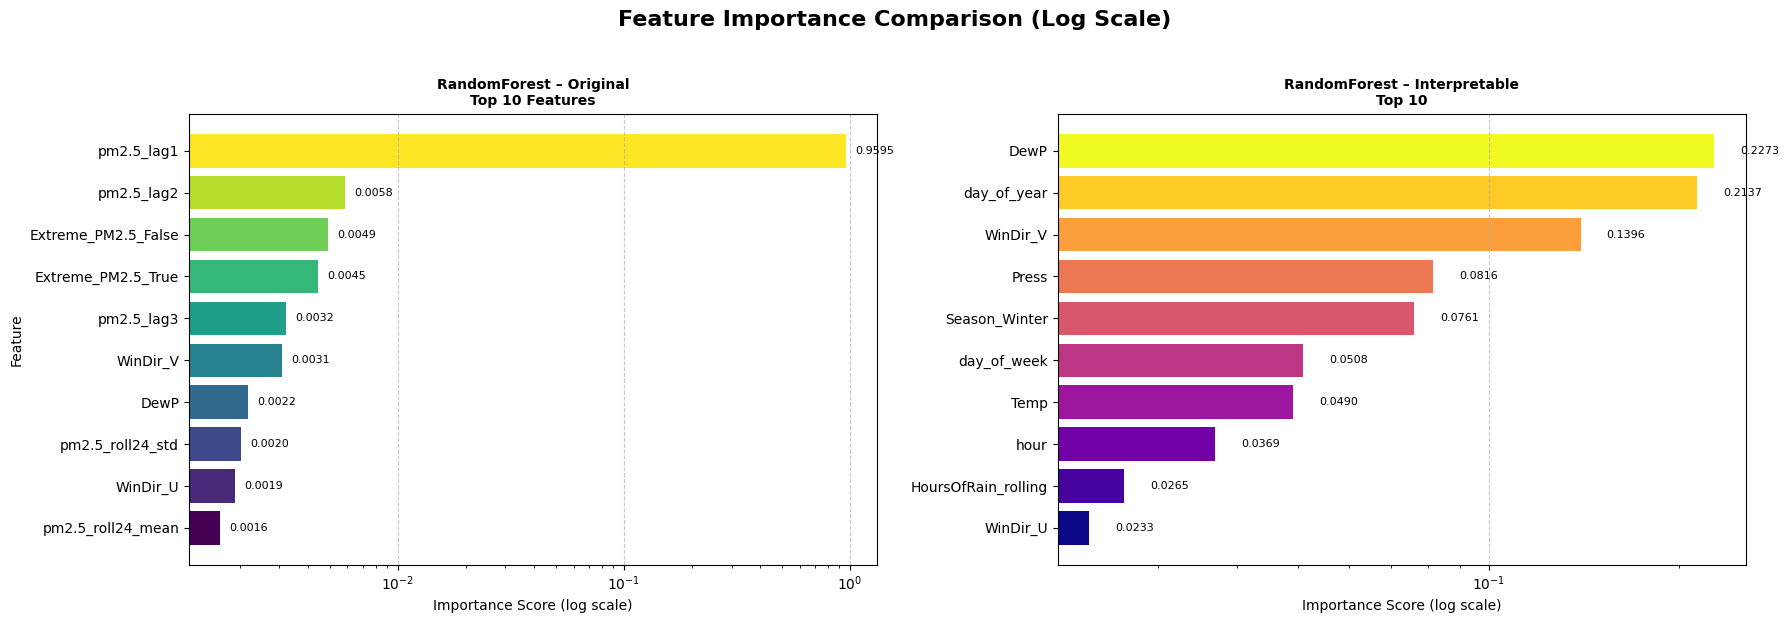

In [ ]:
model_name = 'RandomForest'
top_n_features = 10

fig = plot_feature_importance_comparison_log(
      top_features_df,  # This should be the dataframe for the 'Original' model
      importance_df_interp,  # This is the dataframe for the 'Interpretable' model
      model_name,
      top_n_features
  )
plt.show()

---

#### 🔑 **Key Insights:**

* The dominance of the `pm2.5_lag` and `pm2.5_roll` features in the original model shows that  recent pollution levels are super important to predict future concentrations. However, we can see that the model exploits this relationship and takes a shortcut. The seasonal and meteorological occurrences are being ignored by the model and therefore the the weather and time features importance seems insignificant for the "Original" model.

* Without `pm2.5_lag` and `pm2.5_roll` features or event-specific indicators, the model shifts its reliance to seasonal and meteorological occurances. As such, Dew point, day of year, wind components, and pressure become central to learning the pollution patterns.

* These weather features can explain the long-term trends and background levels of the target variable, particulate matter  `PM2.5_filled`. However, they cannot fully capture rapid pollution increases, which is why our MAE is much higher and the lag1 feature is much more dominant for the full-feature model.

---
# **5. CONCLUSION AND FUTURE WORK**
---





##**5.1 Summary of Findings**
---
- Our results showed that including lagged and rolling hour features as input significantly improved the various models prediction accuracy. However, this implies that due to strong Autocorrelation, the current PM₂.₅ value is strongly correlated with the values from the previous hours (`pm2.5_lag1` and `pm2.5_lag2`) or day. ML model find this relationship very easy and powerful to exploit, specially in a time series analysis.
- While this approach successfully creates a **prediction** model for the particulate matter, **forecasting** remains limited due to the dependency on lagged features.
- Future studies should explore forecasting capabilities by integrating advanced neural network techniques like CNN-LSTM, potentially capturing temporal dependencies and to enable short to midterm air quality prediction.

---
##**5.2 Limitations**
---
- **Potential for Data Leakage:**
We have carefully created lag and rolling features to avoid data leakage. However, due to the preprocessing pipeline's nature, subtle leakage through improperly handled shifted features remains a potential risk, possibly affecting the result of performance metrics.

- **⁠Computational Efficiency:**
Hyperparameter tuning using GridSearchCV and Time Series Splits significantly increased computational demands. Affecting scalability and practical applicability for real-time scenarios.

- ⁠**External Factors:**
Our current model does not explicitly consider additional pollution sources, such as industrial emissions, traffic density, or regional holidays, celebrations, etc. This is a limiting factor for predicting PM₂.₅ levels during unusual pollution events.


---
##**5.3 Next Steps**
---

- **Use More Features:** Future work should integrate additional data sources like satellite-derived Aerosol Optical Depth (AOD), traffic density, industrial activity, and meteorological anomalies to improve model robustness.

- **Try Deep Learning Architectures:** Investigate advanced models like LSTM networks and Transformers to capture temporal dependencies and improve forecast accuracy.

- **Spatial-Temporal Modeling:** Extend the framework to include multiple geographic sites in Beijing to develop models that capture temporal dynamics and regional interdependencies for more granular predictions.

---
# **6. REFRENCE LIST**
---
* AQI scale comparison – AQICN. (2015, March 20). A comparison of worldwide Air Quality Scales – Part 1. AQICN. https://aqicn.org/faq/2015-03-20/a-comparison-of-worldwide-air-quality-scales-part-1/

* Bulut, A. (2022). Predict Pollution of Beijing with Regression Model [Kaggle notebook]. Kaggle. https://www.kaggle.com/code/alibulut1/predict-pollution-of-beijing-with-regression-model

* Chinese AQI standard (HJ 633-2012) – Ministry of Environmental Protection of the People’s Republic of China. (2012). Environmental air quality index (AQI) technical regulation – Trial (HJ 633-2012). China Environmental Science Press.

* CrossValidated (Stack Exchange). (n.d.). *How can I generate a time series with autocorrelation at lags other than 1?* CrossValidated. Retrieved May 25, 2025, from https://stats.stackexchange.com/questions/410534/how-can-i-generate-a-time-series-with-autocorrelation-at-lags-other-than-1

* DataCamp. (n.d.). *Winsorized mean tutorial.* Retrieved May 25, 2025, from [https://www.datacamp.com/tutorial/winsorized-mean](https://www.datacamp.com/tutorial/winsorized-mean)

* DataScience Stack Exchange. (n.d.). Time-series hyper-parameter tuning. DataScience Stack Exchange. Retrieved May 25, 2025, from https://datascience.stackexchange.com/questions/106346/time-series-hyperparameter-tuning

* EPA-style AQI formula discussion – PurpleAir Community. (2019, June 18). How to calculate the EPA PM2.5 AQI [Online forum post]. PurpleAir Community. https://community.purpleair.com/t/how-to-calculate-the-epa-pm2-5-aqi/87

* Esri. (n.d.). Understanding outliers in time-series analysis. In ArcGIS Pro tool reference: Space-time pattern mining. Esri. Retrieved May 25, 2025, from https://pro.arcgis.com/en/pro-app/latest/tool-reference/space-time-pattern-mining/understanding-outliers-in-time-series-analysis.htm

* GeeksforGeeks. (n.d.). *Winsorization.* Retrieved May 25, 2025, from [https://www.geeksforgeeks.org/winsorization/](https://www.geeksforgeeks.org/winsorization/)

* Kotenkov, I. (2022). bcdc_ds_takehome – Blockchain.com Data Scientist take-home (February 2022) [GitHub repository]. GitHub. https://github.com/stalkermustang/bcdc_ds_takehome

* Li, Q., Zhang, H., Cai, X., Song, Y., & Zhu, T. (2021). *The impacts of the atmospheric boundary layer on regional haze in North China.* **NPJ Climate and Atmospheric Science, 4**, Article 9. [https://doi.org/10.1038/s41612-021-00165-y](https://doi.org/10.1038/s41612-021-00165-y)

* Mahmud, S., Ridi, T. B. I., Miah, M. S., Sarower, F., & Elahee, S. (2022). Implementing machine learning algorithms to predict particulate matter (PM 2.5): A case study in the Paso del Norte region. Atmosphere, 13(12), 2100. https://doi.org/10.3390/atmos13122100

* mlcourse.ai. (n.d.). Gradient boosting. Retrieved May 26, 2025, from https://mlcourse.ai/book/topic10/topic10_gradient_boosting.html

* nnjjpp. (2025). Pipelines for preprocessing: A tutorial [Kaggle notebook]. Kaggle. https://www.kaggle.com/code/nnjjpp/pipelines-for-preprocessing-a-tutorial

* Scikit-learn Developers. (n.d.). Grid search and randomized search for hyper-parameter tuning. In scikit-learn: Machine learning in Python (Version 1.x). Retrieved May 25, 2025, from https://scikit-learn.org/stable/modules/grid_search.html

* Scikit-learn Developers. (n.d.). Model evaluation: Quantifying the quality of predictions. In scikit-learn: Machine learning in Python. Retrieved May 26, 2025, from https://scikit-learn.org/stable/getting_started.html#model-evaluation

* Scikit-learn Developers. (n.d.). sklearn.model_selection.TimeSeriesSplit (Version 1.x). In scikit-learn: Machine learning in Python. Retrieved May 25, 2025, from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

* Tan, A. (2022, February 12). Forecasting_Air_Pollution (Version archived) [GitHub repository]. GitHub. https://github.com/at-tan/Forecasting_Air_Pollution

* U.S. EPA break-points – U.S. Environmental Protection Agency. (2025, May 21). AQI breakpoints. Air Quality System. https://aqs.epa.gov/aqsweb/documents/codetables/aqi_breakpoints.html

* Wang, L., Liu, J., Gao, Z., Li, Y., Huang, M., Fan, S., Zhang, X., Yang, Y., Miao, S., Zou, H., Sun, Y., Chen, Y., & Yang, T. (2019). *Vertical observations of the atmospheric boundary layer structure over Beijing urban area during air pollution episodes.* **Atmospheric Chemistry and Physics, 19**, 6949–6967. [https://doi.org/10.5194/acp-19-6949-2019](https://doi.org/10.5194/acp-19-6949-2019)

* Yin, P.-Y. (2025). A review on PM₂.₅ sources, mass prediction, and association analysis: Research opportunities and challenges. Sustainability, 17(3), 1101. https://doi.org/10.3390/su17031101

* Zhang, X. (2019). time_series_forecasting_pytorch [GitHub repository]. GitHub. https://github.com/zhangxu0307/time_series_forecasting_pytorch

* Zhao, X. J., Zhang, X. L., Xu, X. F., Xu, J., Meng, W., & Pu, W. W. (2009). *Seasonal and diurnal variations of ambient PM₂.₅ concentration in urban and rural environments in Beijing.* **Atmospheric Environment, 43**, 2893–2900. [https://doi.org/10.1016/j.atmosenv.2009.03.009](https://doi.org/10.1016/j.atmosenv.2009.03.009)